# Day 5 - Gradient descent for simple linear regression

Extending code from day 3

caution:  this dataset has very few points, so local gradient estimation
using partial gradients in each direction (B0, B1)
has very little gradient to descend on.  

This will make it slow and highly dependent on your starting beta.  
Normally there are other much-better numerical techniques to deal with this...  
Dont use this local gradient descent code on real problems!


In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Code to set up the matrix and make initial guess for Betas

In [2]:
#code to load your matrix here
pretest_scores = np.array([95., 85., 80., 70., 60.]).T  #(5x1 array)
y = np.array([[85.,95.,70.,65.,70.]]).T

#build the design matrix X
X = np.vstack((np.ones(len(pretest_scores)),pretest_scores)).T                         

## Helper Functions and Utilities

In [3]:
#function to generate line points for plotting
def computeline(intercept,slope,start_x,end_x):
    points_x=[start_x,end_x]
    points_y=[intercept,intercept+slope*end_x]
    return points_x, points_y


def plot_regression_results(X, y, t, ythat, beta0,beta1):
    fig = plt.figure()
    plt.axis([0.,100.,0.,100.])
    #add the points in black
    plt.scatter(X[:,1],y,c='k',marker='x')
    #add the predicted final exam score for Aptitude test = 80
    plt.scatter(t[0,1],ythat,c='g',marker='o')
    #add the student line in blue
    points_x,points_y = computeline(beta0,beta1,0,100)
    plt.plot(points_x,points_y,c='r')
    plt.title('Simple Regression')
    plt.ylabel('Final Exam Score')
    plt.xlabel('Aptitude test score')
    #plt.axis('equal')
    plt.grid(True)
    plt.show()


## Code for the student's iterative search for the best coefficients
Complete the code stub below to compute and return the local gradient of the cost (error) surface in the immediate vicinity of the current values of the coefficients

In [24]:
def compute_gradient(X,y,beta,epsilon):
    '''
    Given the training data and the current estimate for beta,
    compute the gradients in each dimension of beta
    Returns gradient
    '''
    
    errorGradient0 = 0   #placeholder - you will write code below to compute this
    errorGradient1 = 0   #placeholder - you will write code below to compute this
    
    #STUDENT CODE HERE 
    #compute the error gradients (slope of the error surface for a tiny change (epsilon) to the beta values)
    #-----------------------------------------------------------
    beta0Mask = np.array([[+epsilon, -epsilon], [0, 0]])
    beta1Mask = np.array([[0, 0], [+epsilon, -epsilon]])
    
    beta0 = beta + beta0Mask
    beta1 = beta + beta1Mask
    
    yhat0 = np.dot(X, beta0)
    yhat1 = np.dot(X, beta1)
    
    error0 = y - yhat0
    error1 = y - yhat1
    
    rss0 = np.diag(np.dot((error0).T, (error0)))
    rss1 = np.diag(np.dot((error1).T, (error1)))
    
    errorGradient0 = np.diff(rss0, axis = 0)
    errorGradient1 = np.diff(rss1, axis = 0)
    #--------------------------
    #END STUDENT CODE
    
    return [errorGradient0,errorGradient1]
    

[[50.01 49.99]
 [ 0.3   0.3 ]]
[[78.51 78.49]
 [75.51 75.49]
 [74.01 73.99]
 [71.01 70.99]
 [68.01 67.99]]
[[ 6.49  6.51]
 [19.49 19.51]
 [-4.01 -3.99]
 [-6.01 -5.99]
 [ 1.99  2.01]]
[478.1405 478.8605]
[0.72]


[array([0.72]), array([66.2])]

## Guess Beta coefficients and evaluate the guess on the test point

Beta 
 [[50. ]
 [ 0.3]] 

Design Matrix X 
 [[ 1. 95.]
 [ 1. 85.]
 [ 1. 80.]
 [ 1. 70.]
 [ 1. 60.]] 

yhat 
 [[78.5]
 [75.5]
 [74. ]
 [71. ]
 [68. ]] 

ydif (prediction errors) 
 [[ -6.5]
 [-19.5]
 [  4. ]
 [  6. ]
 [ -2. ]] 


RSS:  [[478.5]] 

MSE:  [[95.7]] 

RMSE:  [[9.78263768]] 

Prediction at Aptitude 80 [[74.]] 



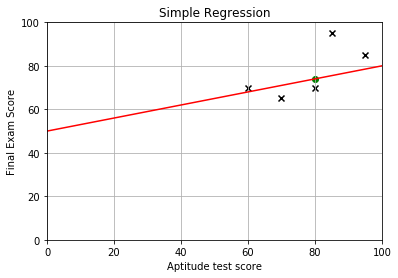

In [21]:
#beta guess here.  Note that later you will find this using gradient decent
#beta = np.array([[26.768,0.644]]).T    #guess the best betas (2 x 1 array)  

#STUDENT CODE HERE.... GUESS YOUR BETA VALUES FOR Beta0 and Beta1
#suggestion:  make the beta guess bad
#--------------
beta0 = 50.0
beta1 = 0.3
#------------
#END STUDENT CODE

beta = np.array([[beta0,beta1]]).T      

#print the Betas and X's
print('Beta','\n', beta, '\n')
print('Design Matrix X', '\n', X, '\n')

#estimate yhat for all datapoints
yhat = np.dot(X,beta)

print('yhat','\n',  yhat,'\n')

#find the difference betwen predicted and truth 
ydiff = yhat-y
print('ydif (prediction errors)', '\n',ydiff, '\n')

#compute RSS
rss = np.dot(ydiff.T,ydiff)
#compute MSE
mse = rss/len(ydiff)
#compute RMSE
rmse =  np.sqrt(mse)
print()
print('RSS: ', rss, '\n')
print('MSE: ', mse, '\n')
print('RMSE: ',rmse, '\n')

#make prediction on aptitude test score of 80
t = np.array([[1, 80]])
ythat = np.dot(t,beta)
print('Prediction at Aptitude 80', ythat, '\n')
plot_regression_results(X, y, t, ythat, beta0, beta1)

## Use gradient descent to find good values for the coefficients

Starting beta search
[478.499964 478.500036]
[478.49669003 478.50331003]
[395.90228215 395.90225087]
[395.90308136 395.90145172]
[390.89528845 390.89528259]
[390.89508486 390.89548624]
[390.59125157 390.59123945]
[390.59129486 390.59119621]
[390.57226607 390.57225549]
[390.57224858 390.57227304]
[390.57055934 390.57054839]
[390.57055682 390.57055097]
[390.56989964 390.56988877]
[390.56989343 390.56989504]
[390.56930347 390.56929258]
[390.56929817 390.56929794]
[390.56871113 390.56870025]
[390.56870561 390.56870584]
[390.56811904 390.56810816]
[390.56811358 390.56811369]
[390.56752697 390.56751609]
[390.56752149 390.56752164]
[390.56693491 390.56692403]
[390.56692943 390.56692957]
[390.56634285 390.56633197]
[390.56633738 390.56633751]
[390.5657508  390.56573992]
[390.56574532 390.56574546]
[390.56515875 390.56514787]
[390.56515328 390.56515341]
[390.56456671 390.56455583]
[390.56456123 390.56456137]
[390.56397468 390.5639638 ]
[390.5639692  390.56396933]
[390.56338265 390.56337177]
[39

[390.39369905 390.39368818]
[390.39369358 390.39369371]
[390.39310861 390.39309775]
[390.39310314 390.39310328]
[390.39251818 390.39250732]
[390.39251272 390.39251285]
[390.39192776 390.3919169 ]
[390.39192229 390.39192243]
[390.39133734 390.39132648]
[390.39133187 390.39133201]
[390.39074693 390.39073607]
[390.39074146 390.3907416 ]
[390.39015652 390.39014566]
[390.39015105 390.39015119]
[390.38956612 390.38955526]
[390.38956065 390.38956079]
[390.38897573 390.38896486]
[390.38897026 390.38897039]
[390.38838534 390.38837447]
[390.38837987 390.38838   ]
[390.38779495 390.38778409]
[390.38778948 390.38778962]
[390.38720457 390.38719371]
[390.3871991  390.38719924]
[390.3866142  390.38660333]
[390.38660873 390.38660887]
[390.38602383 390.38601297]
[390.38601836 390.3860185 ]
[390.38543347 390.3854226 ]
[390.385428   390.38542814]
[390.38484311 390.38483225]
[390.38483764 390.38483778]
[390.38425276 390.3842419 ]
[390.38424729 390.38424743]
[390.38366242 390.38365155]
[390.38365695 390.38

[390.18326521 390.18325437]
[390.18325975 390.18325989]
[390.18267675 390.1826659 ]
[390.18267129 390.18267143]
[390.18208829 390.18207745]
[390.18208283 390.18208297]
[390.18149984 390.181489  ]
[390.18149438 390.18149452]
[390.1809114  390.18090055]
[390.18090594 390.18090607]
[390.18032296 390.18031211]
[390.1803175  390.18031763]
[390.17973452 390.17972368]
[390.17972906 390.1797292 ]
[390.17914609 390.17913525]
[390.17914063 390.17914077]
[390.17855767 390.17854682]
[390.17855221 390.17855235]
[390.17796925 390.1779584 ]
[390.17796379 390.17796393]
[390.17738084 390.17736999]
[390.17737538 390.17737552]
[390.17679243 390.17678159]
[390.17678697 390.17678711]
[390.17620403 390.17619318]
[390.17619857 390.17619871]
[390.17561564 390.17560479]
[390.17561017 390.17561031]
[390.17502724 390.1750164 ]
[390.17502178 390.17502192]
[390.17443886 390.17442801]
[390.1744334  390.17443354]
[390.17385048 390.17383963]
[390.17384502 390.17384516]
[390.17326211 390.17325126]
[390.17325665 390.17

[389.96708315 389.96707233]
[389.9670777  389.96707784]
[389.96649672 389.96648589]
[389.96649127 389.9664914 ]
[389.96591029 389.96589946]
[389.96590484 389.96590497]
[389.96532386 389.96531303]
[389.96531841 389.96531855]
[389.96473744 389.96472661]
[389.96473199 389.96473213]
[389.96415103 389.9641402 ]
[389.96414558 389.96414571]
[389.96356462 389.96355379]
[389.96355917 389.96355931]
[389.96297822 389.96296739]
[389.96297277 389.9629729 ]
[389.96239182 389.96238099]
[389.96238637 389.9623865 ]
[389.96180543 389.9617946 ]
[389.96179998 389.96180011]
[389.96121904 389.96120821]
[389.96121359 389.96121373]
[389.96063266 389.96062183]
[389.96062721 389.96062735]
[389.96004629 389.96003546]
[389.96004083 389.96004097]
[389.95945992 389.95944909]
[389.95945446 389.9594546 ]
[389.95887355 389.95886272]
[389.9588681  389.95886824]
[389.95828719 389.95827636]
[389.95828174 389.95828188]
[389.95770084 389.95769001]
[389.95769539 389.95769552]
[389.95711449 389.95710366]
[389.95710904 389.95

[389.79022907 389.79021825]
[389.79022362 389.79022376]
[389.78964429 389.78963347]
[389.78963884 389.78963898]
[389.78905951 389.7890487 ]
[389.78905407 389.78905421]
[389.78847475 389.78846393]
[389.7884693  389.78846944]
[389.78788999 389.78787917]
[389.78788454 389.78788468]
[389.78730523 389.78729442]
[389.78729979 389.78729992]
[389.78672048 389.78670966]
[389.78671503 389.78671517]
[389.78613573 389.78612492]
[389.78613029 389.78613042]
[389.78555099 389.78554018]
[389.78554555 389.78554568]
[389.78496626 389.78495544]
[389.78496081 389.78496095]
[389.78438153 389.78437072]
[389.78437609 389.78437622]
[389.78379681 389.78378599]
[389.78379136 389.7837915 ]
[389.78321209 389.78320127]
[389.78320664 389.78320678]
[389.78262737 389.78261656]
[389.78262193 389.78262207]
[389.78204267 389.78203185]
[389.78203722 389.78203736]
[389.78145797 389.78144715]
[389.78145252 389.78145266]
[389.78087327 389.78086246]
[389.78086783 389.78086796]
[389.78028858 389.78027777]
[389.78028314 389.78

[389.65470723 389.65469643]
[389.65470179 389.65470193]
[389.65412372 389.65411292]
[389.65411828 389.65411842]
[389.65354022 389.65352942]
[389.65353478 389.65353492]
[389.65295672 389.65294592]
[389.65295128 389.65295142]
[389.65237323 389.65236243]
[389.65236779 389.65236793]
[389.65178974 389.65177894]
[389.65178431 389.65178444]
[389.65120626 389.65119546]
[389.65120083 389.65120096]
[389.65062279 389.65061199]
[389.65061735 389.65061749]
[389.65003932 389.65002852]
[389.65003388 389.65003402]
[389.64945585 389.64944505]
[389.64945042 389.64945055]
[389.64887239 389.64886159]
[389.64886696 389.64886709]
[389.64828894 389.64827814]
[389.6482835  389.64828364]
[389.64770549 389.64769469]
[389.64770006 389.64770019]
[389.64712205 389.64711125]
[389.64711661 389.64711675]
[389.64653861 389.64652781]
[389.64653318 389.64653331]
[389.64595518 389.64594438]
[389.64594974 389.64594988]
[389.64537175 389.64536095]
[389.64536632 389.64536645]
[389.64478833 389.64477753]
[389.6447829  389.64

[389.52122108 389.52122122]
[389.52064426 389.52063346]
[389.52063882 389.52063896]
[389.520062   389.52005121]
[389.52005657 389.52005671]
[389.51947976 389.51946897]
[389.51947433 389.51947446]
[389.51889752 389.51888673]
[389.51889209 389.51889222]
[389.51831528 389.51830449]
[389.51830985 389.51830998]
[389.51773305 389.51772226]
[389.51772762 389.51772775]
[389.51715083 389.51714004]
[389.5171454  389.51714553]
[389.51656861 389.51655782]
[389.51656318 389.51656331]
[389.51598639 389.5159756 ]
[389.51598096 389.5159811 ]
[389.51540419 389.5153934 ]
[389.51539875 389.51539889]
[389.51482198 389.51481119]
[389.51481655 389.51481669]
[389.51423979 389.514229  ]
[389.51423436 389.51423449]
[389.51365759 389.5136468 ]
[389.51365216 389.5136523 ]
[389.51307541 389.51306462]
[389.51306998 389.51307011]
[389.51249323 389.51248244]
[389.5124878  389.51248793]
[389.51191105 389.51190026]
[389.51190562 389.51190576]
[389.51132888 389.51131809]
[389.51132345 389.51132359]
[389.51074672 389.51

[389.31544806 389.31543729]
[389.31544264 389.31544277]
[389.31486773 389.31485696]
[389.31486231 389.31486245]
[389.31428741 389.31427664]
[389.31428199 389.31428212]
[389.31370709 389.31369632]
[389.31370167 389.3137018 ]
[389.31312678 389.31311601]
[389.31312136 389.31312149]
[389.31254647 389.3125357 ]
[389.31254105 389.31254119]
[389.31196617 389.3119554 ]
[389.31196075 389.31196088]
[389.31138588 389.3113751 ]
[389.31138045 389.31138059]
[389.31080559 389.31079481]
[389.31080016 389.3108003 ]
[389.3102253  389.31021453]
[389.31021988 389.31022001]
[389.30964502 389.30963425]
[389.3096396  389.30963973]
[389.30906475 389.30905397]
[389.30905932 389.30905946]
[389.30848448 389.30847371]
[389.30847906 389.30847919]
[389.30790421 389.30789344]
[389.30789879 389.30789893]
[389.30732396 389.30731319]
[389.30731853 389.30731867]
[389.3067437  389.30673293]
[389.30673828 389.30673842]
[389.30616346 389.30615269]
[389.30615804 389.30615817]
[389.30558322 389.30557244]
[389.30557779 389.30

[389.11440022 389.11438947]
[389.11439481 389.11439494]
[389.11382178 389.11381102]
[389.11381637 389.1138165 ]
[389.11324334 389.11323259]
[389.11323793 389.11323806]
[389.11266491 389.11265415]
[389.11265949 389.11265963]
[389.11208648 389.11207572]
[389.11208107 389.1120812 ]
[389.11150806 389.1114973 ]
[389.11150264 389.11150278]
[389.11092964 389.11091888]
[389.11092423 389.11092436]
[389.11035123 389.11034047]
[389.11034581 389.11034595]
[389.10977282 389.10976207]
[389.10976741 389.10976754]
[389.10919442 389.10918367]
[389.10918901 389.10918914]
[389.10861603 389.10860527]
[389.10861061 389.10861075]
[389.10803764 389.10802688]
[389.10803222 389.10803236]
[389.10745925 389.1074485 ]
[389.10745384 389.10745397]
[389.10688087 389.10687012]
[389.10687546 389.10687559]
[389.1063025  389.10629174]
[389.10629708 389.10629722]
[389.10572413 389.10571338]
[389.10571872 389.10571885]
[389.10514577 389.10513501]
[389.10514035 389.10514049]
[389.10456741 389.10455665]
[389.104562   389.10

[388.95784002 388.95782928]
[388.95783461 388.95783475]
[388.95726304 388.9572523 ]
[388.95725763 388.95725777]
[388.95668607 388.95667533]
[388.95668066 388.9566808 ]
[388.9561091  388.95609836]
[388.9561037  388.95610383]
[388.95553214 388.9555214 ]
[388.95552674 388.95552687]
[388.95495519 388.95494445]
[388.95494978 388.95494992]
[388.95437824 388.9543675 ]
[388.95437283 388.95437297]
[388.95380129 388.95379055]
[388.95379589 388.95379602]
[388.95322435 388.95321361]
[388.95321895 388.95321908]
[388.95264742 388.95263668]
[388.95264201 388.95264215]
[388.95207049 388.95205975]
[388.95206509 388.95206522]
[388.95149357 388.95148283]
[388.95148816 388.9514883 ]
[388.95091665 388.95090591]
[388.95091125 388.95091138]
[388.95033974 388.950329  ]
[388.95033433 388.95033447]
[388.94976283 388.94975209]
[388.94975743 388.94975756]
[388.94918593 388.94917519]
[388.94918053 388.94918066]
[388.94860904 388.9485983 ]
[388.94860363 388.94860377]
[388.94803215 388.94802141]
[388.94802674 388.94

[388.77463367 388.77462295]
[388.77462828 388.77462841]
[388.77405841 388.77404769]
[388.77405302 388.77405315]
[388.77348316 388.77347244]
[388.77347776 388.7734779 ]
[388.77290791 388.77289719]
[388.77290251 388.77290265]
[388.77233267 388.77232194]
[388.77232727 388.7723274 ]
[388.77175743 388.7717467 ]
[388.77175203 388.77175217]
[388.7711822  388.77117147]
[388.7711768  388.77117693]
[388.77060697 388.77059624]
[388.77060157 388.77060171]
[388.77003175 388.77002102]
[388.77002635 388.77002648]
[388.76945653 388.76944581]
[388.76945113 388.76945127]
[388.76888132 388.76887059]
[388.76887592 388.76887606]
[388.76830611 388.76829539]
[388.76830072 388.76830085]
[388.76773091 388.76772019]
[388.76772552 388.76772565]
[388.76715572 388.76714499]
[388.76715032 388.76715045]
[388.76658053 388.7665698 ]
[388.76657513 388.76657526]
[388.76600534 388.76599462]
[388.76599995 388.76600008]
[388.76543017 388.76541944]
[388.76542477 388.7654249 ]
[388.76485499 388.76484427]
[388.76484959 388.76

[388.58910487 388.58909416]
[388.58909948 388.58909962]
[388.58853135 388.58852064]
[388.58852596 388.5885261 ]
[388.58795784 388.58794713]
[388.58795245 388.58795258]
[388.58738433 388.58737362]
[388.58737894 388.58737907]
[388.58681082 388.58680011]
[388.58680543 388.58680557]
[388.58623732 388.58622661]
[388.58623193 388.58623207]
[388.58566383 388.58565312]
[388.58565844 388.58565857]
[388.58509034 388.58507963]
[388.58508495 388.58508508]
[388.58451686 388.58450615]
[388.58451147 388.5845116 ]
[388.58394338 388.58393267]
[388.58393799 388.58393812]
[388.58336991 388.5833592 ]
[388.58336452 388.58336465]
[388.58279644 388.58278573]
[388.58279105 388.58279118]
[388.58222298 388.58221227]
[388.58221759 388.58221772]
[388.58164952 388.58163881]
[388.58164413 388.58164427]
[388.58107607 388.58106536]
[388.58107068 388.58107081]
[388.58050263 388.58049192]
[388.58049724 388.58049737]
[388.57992918 388.57991848]
[388.57992379 388.57992393]
[388.57935575 388.57934504]
[388.57935036 388.57

[388.35441143 388.35440074]
[388.35440605 388.35440619]
[388.35384011 388.35382942]
[388.35383473 388.35383486]
[388.3532688  388.35325811]
[388.35326342 388.35326355]
[388.35269748 388.3526868 ]
[388.3526921  388.35269224]
[388.35212618 388.35211549]
[388.3521208  388.35212093]
[388.35155488 388.35154419]
[388.3515495  388.35154963]
[388.35098359 388.3509729 ]
[388.35097821 388.35097834]
[388.3504123  388.35040161]
[388.35040692 388.35040705]
[388.34984101 388.34983032]
[388.34983563 388.34983577]
[388.34926973 388.34925905]
[388.34926435 388.34926449]
[388.34869846 388.34868777]
[388.34869308 388.34869322]
[388.34812719 388.34811651]
[388.34812181 388.34812195]
[388.34755593 388.34754524]
[388.34755055 388.34755069]
[388.34698467 388.34697399]
[388.34697929 388.34697943]
[388.34641342 388.34640273]
[388.34640804 388.34640818]
[388.34584218 388.34583149]
[388.3458368  388.34583693]
[388.34527094 388.34526025]
[388.34526556 388.34526569]
[388.3446997  388.34468901]
[388.34469432 388.34

[388.14224902 388.14223835]
[388.14224365 388.14224378]
[388.14167969 388.14166902]
[388.14167432 388.14167445]
[388.14111036 388.14109969]
[388.14110499 388.14110512]
[388.14054104 388.14053037]
[388.14053567 388.1405358 ]
[388.13997172 388.13996105]
[388.13996635 388.13996648]
[388.13940241 388.13939174]
[388.13939704 388.13939717]
[388.1388331  388.13882243]
[388.13882773 388.13882787]
[388.1382638  388.13825313]
[388.13825843 388.13825857]
[388.13769451 388.13768384]
[388.13768914 388.13768927]
[388.13712522 388.13711455]
[388.13711985 388.13711998]
[388.13655593 388.13654526]
[388.13655056 388.1365507 ]
[388.13598665 388.13597598]
[388.13598128 388.13598142]
[388.13541738 388.13540671]
[388.13541201 388.13541214]
[388.13484811 388.13483744]
[388.13484274 388.13484287]
[388.13427885 388.13426818]
[388.13427348 388.13427361]
[388.13370959 388.13369892]
[388.13370422 388.13370435]
[388.13314034 388.13312967]
[388.13313497 388.1331351 ]
[388.13257109 388.13256042]
[388.13256572 388.13

[387.9716883  387.97167765]
[387.97168294 387.97168307]
[387.97112057 387.97110991]
[387.97111521 387.97111534]
[387.97055284 387.97054218]
[387.97054748 387.97054761]
[387.96998512 387.96997446]
[387.96997975 387.96997989]
[387.9694174  387.96940674]
[387.96941203 387.96941217]
[387.96884969 387.96883903]
[387.96884432 387.96884446]
[387.96828198 387.96827132]
[387.96827661 387.96827675]
[387.96771428 387.96770362]
[387.96770891 387.96770905]
[387.96714658 387.96713592]
[387.96714122 387.96714135]
[387.96657889 387.96656823]
[387.96657352 387.96657366]
[387.9660112  387.96600055]
[387.96600584 387.96600597]
[387.96544352 387.96543287]
[387.96543816 387.96543829]
[387.96487584 387.96486519]
[387.96487048 387.96487061]
[387.96430817 387.96429752]
[387.96430281 387.96430294]
[387.96374051 387.96372985]
[387.96373515 387.96373528]
[387.96317285 387.96316219]
[387.96316749 387.96316762]
[387.96260519 387.96259454]
[387.96259983 387.96259997]
[387.96203755 387.96202689]
[387.96203218 387.96

[387.81406291 387.81405227]
[387.81405756 387.81405769]
[387.81349666 387.81348601]
[387.8134913  387.81349143]
[387.8129304  387.81291976]
[387.81292505 387.81292518]
[387.81236416 387.81235352]
[387.8123588  387.81235893]
[387.81179792 387.81178728]
[387.81179256 387.81179269]
[387.81123168 387.81122104]
[387.81122633 387.81122646]
[387.81066545 387.81065481]
[387.81066009 387.81066023]
[387.81009923 387.81008859]
[387.81009387 387.810094  ]
[387.80953301 387.80952237]
[387.80952765 387.80952778]
[387.80896679 387.80895615]
[387.80896144 387.80896157]
[387.80840058 387.80838994]
[387.80839523 387.80839536]
[387.80783438 387.80782374]
[387.80782902 387.80782916]
[387.80726818 387.80725754]
[387.80726283 387.80726296]
[387.80670199 387.80669135]
[387.80669663 387.80669677]
[387.8061358  387.80612516]
[387.80613044 387.80613058]
[387.80556962 387.80555898]
[387.80556426 387.80556439]
[387.80500344 387.8049928 ]
[387.80499808 387.80499822]
[387.80443727 387.80442663]
[387.80443191 387.80

[387.62409901 387.62408838]
[387.62409366 387.62409379]
[387.62353453 387.62352391]
[387.62352918 387.62352932]
[387.62297006 387.62295944]
[387.62296471 387.62296485]
[387.62240559 387.62239497]
[387.62240025 387.62240038]
[387.62184113 387.62183051]
[387.62183579 387.62183592]
[387.62127668 387.62126606]
[387.62127133 387.62127146]
[387.62071223 387.62070161]
[387.62070688 387.62070701]
[387.62014778 387.62013716]
[387.62014244 387.62014257]
[387.61958335 387.61957272]
[387.619578   387.61957813]
[387.61901891 387.61900829]
[387.61901356 387.6190137 ]
[387.61845448 387.61844386]
[387.61844914 387.61844927]
[387.61789006 387.61787944]
[387.61788471 387.61788484]
[387.61732564 387.61731502]
[387.61732029 387.61732043]
[387.61676123 387.6167506 ]
[387.61675588 387.61675601]
[387.61619682 387.6161862 ]
[387.61619147 387.61619161]
[387.61563242 387.61562179]
[387.61562707 387.6156272 ]
[387.61506802 387.6150574 ]
[387.61506267 387.61506281]
[387.61450363 387.61449301]
[387.61449828 387.61

[387.40716622 387.40715561]
[387.40716088 387.40716101]
[387.40660378 387.40659317]
[387.40659844 387.40659857]
[387.40604134 387.40603073]
[387.406036   387.40603613]
[387.40547891 387.4054683 ]
[387.40547357 387.4054737 ]
[387.40491648 387.40490587]
[387.40491114 387.40491127]
[387.40435406 387.40434345]
[387.40434872 387.40434885]
[387.40379164 387.40378103]
[387.4037863  387.40378643]
[387.40322923 387.40321862]
[387.40322389 387.40322402]
[387.40266682 387.40265622]
[387.40266148 387.40266162]
[387.40210442 387.40209382]
[387.40209908 387.40209922]
[387.40154203 387.40153142]
[387.40153669 387.40153682]
[387.40097963 387.40096903]
[387.4009743  387.40097443]
[387.40041725 387.40040665]
[387.40041191 387.40041204]
[387.39985487 387.39984427]
[387.39984953 387.39984967]
[387.3992925  387.39928189]
[387.39928716 387.39928729]
[387.39873013 387.39871952]
[387.39872479 387.39872492]
[387.39816776 387.39815716]
[387.39816242 387.39816256]
[387.3976054 387.3975948]
[387.39760007 387.3976

[387.26110835 387.26109776]
[387.26110302 387.26110315]
[387.26054727 387.26053668]
[387.26054194 387.26054207]
[387.2599862  387.25997561]
[387.25998087 387.25998101]
[387.25942514 387.25941455]
[387.25941981 387.25941994]
[387.25886408 387.25885349]
[387.25885875 387.25885888]
[387.25830303 387.25829244]
[387.2582977  387.25829783]
[387.25774198 387.25773139]
[387.25773665 387.25773678]
[387.25718094 387.25717035]
[387.25717561 387.25717574]
[387.2566199  387.25660931]
[387.25661457 387.2566147 ]
[387.25605887 387.25604828]
[387.25605354 387.25605367]
[387.25549784 387.25548725]
[387.25549251 387.25549264]
[387.25493682 387.25492623]
[387.25493149 387.25493162]
[387.2543758  387.25436521]
[387.25437047 387.25437061]
[387.25381479 387.2538042 ]
[387.25380946 387.25380959]
[387.25325379 387.2532432 ]
[387.25324846 387.25324859]
[387.25269279 387.25268219]
[387.25268746 387.25268759]
[387.25213179 387.2521212 ]
[387.25212646 387.25212659]
[387.2515708  387.25156021]
[387.25156547 387.25

[387.10701089 387.10700031]
[387.10700556 387.10700569]
[387.10645126 387.10644068]
[387.10644593 387.10644606]
[387.10589163 387.10588105]
[387.10588631 387.10588644]
[387.10533201 387.10532143]
[387.10532669 387.10532682]
[387.1047724  387.10476182]
[387.10476707 387.10476721]
[387.10421279 387.10420221]
[387.10420746 387.1042076 ]
[387.10365318 387.10364261]
[387.10364786 387.10364799]
[387.10309359 387.10308301]
[387.10308826 387.10308839]
[387.10253399 387.10252341]
[387.10252867 387.1025288 ]
[387.10197441 387.10196383]
[387.10196908 387.10196921]
[387.10141482 387.10140424]
[387.1014095  387.10140963]
[387.10085524 387.10084467]
[387.10084992 387.10085005]
[387.10029567 387.10028509]
[387.10029035 387.10029048]
[387.09973611 387.09972553]
[387.09973078 387.09973091]
[387.09917654 387.09916597]
[387.09917122 387.09917135]
[387.09861699 387.09860641]
[387.09861166 387.0986118 ]
[387.09805744 387.09804686]
[387.09805211 387.09805224]
[387.09749789 387.09748731]
[387.09749257 387.09

[386.92150164 386.92149108]
[386.92149633 386.92149646]
[386.92094375 386.92093319]
[386.92093844 386.92093857]
[386.92038587 386.92037531]
[386.92038055 386.92038068]
[386.91982799 386.91981742]
[386.91982267 386.9198228 ]
[386.91927011 386.91925955]
[386.9192648  386.91926493]
[386.91871224 386.91870168]
[386.91870692 386.91870706]
[386.91815438 386.91814381]
[386.91814906 386.91814919]
[386.91759652 386.91758595]
[386.9175912  386.91759133]
[386.91703866 386.9170281 ]
[386.91703335 386.91703348]
[386.91648081 386.91647025]
[386.9164755  386.91647563]
[386.91592297 386.91591241]
[386.91591765 386.91591778]
[386.91536513 386.91535457]
[386.91535981 386.91535995]
[386.91480729 386.91479673]
[386.91480198 386.91480211]
[386.91424947 386.9142389 ]
[386.91424415 386.91424428]
[386.91369164 386.91368108]
[386.91368633 386.91368646]
[386.91313383 386.91312326]
[386.91312851 386.91312864]
[386.91257601 386.91256545]
[386.9125707  386.91257083]
[386.9120182  386.91200764]
[386.91201289 386.91

[386.73267576 386.73266521]
[386.73267045 386.73267058]
[386.73211964 386.73210909]
[386.73211433 386.73211446]
[386.73156352 386.73155297]
[386.73155821 386.73155834]
[386.73100741 386.73099686]
[386.7310021  386.73100223]
[386.7304513  386.73044076]
[386.73044599 386.73044613]
[386.7298952  386.72988466]
[386.72988989 386.72989003]
[386.72933911 386.72932856]
[386.7293338  386.72933393]
[386.72878302 386.72877247]
[386.72877771 386.72877784]
[386.72822693 386.72821639]
[386.72822162 386.72822176]
[386.72767085 386.72766031]
[386.72766554 386.72766568]
[386.72711478 386.72710423]
[386.72710947 386.7271096 ]
[386.72655871 386.72654816]
[386.7265534  386.72655353]
[386.72600264 386.7259921 ]
[386.72599734 386.72599747]
[386.72544658 386.72543604]
[386.72544128 386.72544141]
[386.72489053 386.72487999]
[386.72488522 386.72488536]
[386.72433448 386.72432394]
[386.72432917 386.72432931]
[386.72377844 386.72376789]
[386.72377313 386.72377326]
[386.7232224  386.72321186]
[386.72321709 386.72

[386.56829115 386.56828062]
[386.56828585 386.56828599]
[386.56773657 386.56772604]
[386.56773127 386.5677314 ]
[386.567182   386.56717147]
[386.5671767  386.56717683]
[386.56662743 386.5666169 ]
[386.56662213 386.56662226]
[386.56607286 386.56606233]
[386.56606756 386.56606769]
[386.5655183  386.56550777]
[386.565513   386.56551313]
[386.56496375 386.56495322]
[386.56495845 386.56495858]
[386.5644092  386.56439867]
[386.5644039  386.56440403]
[386.56385465 386.56384412]
[386.56384935 386.56384948]
[386.56330011 386.56328958]
[386.56329481 386.56329495]
[386.56274558 386.56273505]
[386.56274028 386.56274041]
[386.56219105 386.56218052]
[386.56218575 386.56218588]
[386.56163653 386.561626  ]
[386.56163123 386.56163136]
[386.56108201 386.56107148]
[386.56107671 386.56107684]
[386.5605275  386.56051697]
[386.5605222  386.56052233]
[386.55997299 386.55996246]
[386.55996769 386.55996782]
[386.55941848 386.55940795]
[386.55941318 386.55941332]
[386.55886399 386.55885346]
[386.55885869 386.55

[386.40049076 386.40048025]
[386.40048547 386.4004856 ]
[386.39993776 386.39992724]
[386.39993246 386.3999326 ]
[386.39938475 386.39937424]
[386.39937946 386.39937959]
[386.39883176 386.39882124]
[386.39882646 386.39882659]
[386.39827876 386.39826825]
[386.39827347 386.3982736 ]
[386.39772578 386.39771526]
[386.39772048 386.39772061]
[386.39717279 386.39716228]
[386.3971675  386.39716763]
[386.39661982 386.3966093 ]
[386.39661452 386.39661466]
[386.39606684 386.39605633]
[386.39606155 386.39606168]
[386.39551388 386.39550336]
[386.39550859 386.39550872]
[386.39496092 386.3949504 ]
[386.39495562 386.39495576]
[386.39440796 386.39439745]
[386.39440267 386.3944028 ]
[386.39385501 386.39384449]
[386.39384972 386.39384985]
[386.39330206 386.39329155]
[386.39329677 386.3932969 ]
[386.39274912 386.39273861]
[386.39274383 386.39274396]
[386.39219619 386.39218567]
[386.39219089 386.39219103]
[386.39164326 386.39163274]
[386.39163796 386.3916381 ]
[386.39109033 386.39107982]
[386.39108504 386.39

[386.24585078 386.24584027]
[386.24584549 386.24584562]
[386.24529922 386.24528871]
[386.24529393 386.24529406]
[386.24474766 386.24473716]
[386.24474238 386.24474251]
[386.24419611 386.24418561]
[386.24419083 386.24419096]
[386.24364457 386.24363407]
[386.24363929 386.24363942]
[386.24309303 386.24308253]
[386.24308775 386.24308788]
[386.2425415 386.242531 ]
[386.24253622 386.24253635]
[386.24198997 386.24197947]
[386.24198469 386.24198482]
[386.24143845 386.24142795]
[386.24143316 386.2414333 ]
[386.24088693 386.24087643]
[386.24088165 386.24088178]
[386.24033542 386.24032492]
[386.24033014 386.24033027]
[386.23978391 386.23977341]
[386.23977863 386.23977876]
[386.23923241 386.23922191]
[386.23922713 386.23922726]
[386.23868092 386.23867041]
[386.23867563 386.23867576]
[386.23812942 386.23811892]
[386.23812414 386.23812427]
[386.23757794 386.23756744]
[386.23757265 386.23757278]
[386.23702646 386.23701595]
[386.23702117 386.2370213 ]
[386.23647498 386.23646448]
[386.23646969 386.2364

[386.07016549 386.070155  ]
[386.07016021 386.07016034]
[386.06961557 386.06960509]
[386.0696103  386.06961043]
[386.06906567 386.06905518]
[386.06906039 386.06906052]
[386.06851576 386.06850528]
[386.06851049 386.06851062]
[386.06796587 386.06795538]
[386.06796059 386.06796072]
[386.06741598 386.06740549]
[386.0674107  386.06741083]
[386.06686609 386.0668556 ]
[386.06686081 386.06686094]
[386.06631621 386.06630572]
[386.06631093 386.06631106]
[386.06576633 386.06575585]
[386.06576106 386.06576119]
[386.06521646 386.06520598]
[386.06521118 386.06521132]
[386.0646666  386.06465611]
[386.06466132 386.06466145]
[386.06411674 386.06410625]
[386.06411146 386.06411159]
[386.06356688 386.06355639]
[386.0635616  386.06356173]
[386.06301703 386.06300654]
[386.06301175 386.06301188]
[386.06246718 386.0624567 ]
[386.06246191 386.06246204]
[386.06191734 386.06190686]
[386.06191207 386.0619122 ]
[386.06136751 386.06135702]
[386.06136223 386.06136236]
[386.06081768 386.06080719]
[386.0608124  386.06

[385.87636637 385.8763559 ]
[385.8763611  385.87636123]
[385.87581827 385.87580781]
[385.87581301 385.87581314]
[385.87527018 385.87525972]
[385.87526492 385.87526505]
[385.8747221  385.87471163]
[385.87471683 385.87471696]
[385.87417402 385.87416355]
[385.87416875 385.87416888]
[385.87362594 385.87361547]
[385.87362067 385.87362081]
[385.87307787 385.8730674 ]
[385.8730726  385.87307274]
[385.87252981 385.87251934]
[385.87252454 385.87252467]
[385.87198175 385.87197128]
[385.87197648 385.87197661]
[385.87143369 385.87142323]
[385.87142843 385.87142856]
[385.87088564 385.87087518]
[385.87088038 385.87088051]
[385.8703376  385.87032713]
[385.87033233 385.87033246]
[385.86978956 385.86977909]
[385.86978429 385.86978442]
[385.86924153 385.86923106]
[385.86923626 385.86923639]
[385.8686935  385.86868303]
[385.86868823 385.86868836]
[385.86814547 385.86813501]
[385.86814021 385.86814034]
[385.86759746 385.86758699]
[385.86759219 385.86759232]
[385.86704944 385.86703897]
[385.86704417 385.86

[385.70451651 385.70450605]
[385.70451124 385.70451137]
[385.70397002 385.70395957]
[385.70396476 385.70396489]
[385.70342354 385.70341309]
[385.70341828 385.70341841]
[385.70287707 385.70286661]
[385.7028718  385.70287194]
[385.7023306  385.70232014]
[385.70232533 385.70232547]
[385.70178413 385.70177368]
[385.70177887 385.701779  ]
[385.70123767 385.70122722]
[385.70123241 385.70123254]
[385.70069122 385.70068076]
[385.70068596 385.70068609]
[385.70014477 385.70013431]
[385.70013951 385.70013964]
[385.69959832 385.69958787]
[385.69959306 385.69959319]
[385.69905188 385.69904143]
[385.69904662 385.69904675]
[385.69850545 385.698495  ]
[385.69850019 385.69850032]
[385.69795902 385.69794857]
[385.69795376 385.69795389]
[385.6974126  385.69740215]
[385.69740734 385.69740747]
[385.69686618 385.69685573]
[385.69686092 385.69686105]
[385.69631977 385.69630931]
[385.69631451 385.69631464]
[385.69577336 385.69576291]
[385.6957681  385.69576823]
[385.69522696 385.6952165 ]
[385.69522169 385.69

[385.51573805 385.51572761]
[385.51573279 385.51573293]
[385.51519333 385.5151829 ]
[385.51518808 385.51518821]
[385.51464862 385.51463818]
[385.51464337 385.5146435 ]
[385.51410392 385.51409348]
[385.51409866 385.51409879]
[385.51355922 385.51354878]
[385.51355396 385.51355409]
[385.51301452 385.51300408]
[385.51300927 385.5130094 ]
[385.51246983 385.51245939]
[385.51246458 385.51246471]
[385.51192514 385.51191471]
[385.51191989 385.51192002]
[385.51138046 385.51137003]
[385.51137521 385.51137534]
[385.51083579 385.51082535]
[385.51083054 385.51083067]
[385.51029112 385.51028068]
[385.51028587 385.510286  ]
[385.50974646 385.50973602]
[385.5097412  385.50974133]
[385.5092018  385.50919136]
[385.50919654 385.50919667]
[385.50865714 385.50864671]
[385.50865189 385.50865202]
[385.50811249 385.50810206]
[385.50810724 385.50810737]
[385.50756785 385.50755741]
[385.5075626  385.50756273]
[385.50702321 385.50701277]
[385.50701796 385.50701809]
[385.50647857 385.50646814]
[385.50647332 385.50

[385.31834129 385.31833088]
[385.31833605 385.31833618]
[385.31779843 385.31778801]
[385.31779318 385.31779332]
[385.31725557 385.31724515]
[385.31725032 385.31725045]
[385.31671271 385.31670229]
[385.31670747 385.3167076 ]
[385.31616986 385.31615944]
[385.31616462 385.31616475]
[385.31562702 385.3156166 ]
[385.31562177 385.3156219 ]
[385.31508418 385.31507376]
[385.31507893 385.31507906]
[385.31454134 385.31453092]
[385.3145361  385.31453623]
[385.31399851 385.31398809]
[385.31399327 385.3139934 ]
[385.31345569 385.31344527]
[385.31345044 385.31345057]
[385.31291287 385.31290245]
[385.31290762 385.31290775]
[385.31237005 385.31235963]
[385.31236481 385.31236494]
[385.31182724 385.31181682]
[385.311822   385.31182213]
[385.31128444 385.31127402]
[385.31127919 385.31127932]
[385.31074164 385.31073122]
[385.3107364  385.31073653]
[385.31019884 385.31018843]
[385.3101936  385.31019373]
[385.30965605 385.30964564]
[385.30965081 385.30965094]
[385.30911327 385.30910285]
[385.30910803 385.30

[385.14109515 385.14108475]
[385.14108992 385.14109005]
[385.14055395 385.14054355]
[385.14054871 385.14054884]
[385.14001275 385.14000235]
[385.14000751 385.14000764]
[385.13947155 385.13946115]
[385.13946632 385.13946645]
[385.13893037 385.13891996]
[385.13892513 385.13892526]
[385.13838918 385.13837878]
[385.13838395 385.13838408]
[385.137848  385.1378376]
[385.13784277 385.1378429 ]
[385.13730683 385.13729643]
[385.13730159 385.13730172]
[385.13676566 385.13675526]
[385.13676042 385.13676055]
[385.1362245  385.13621409]
[385.13621926 385.13621939]
[385.13568334 385.13567293]
[385.1356781  385.13567823]
[385.13514218 385.13513178]
[385.13513695 385.13513708]
[385.13460103 385.13459063]
[385.1345958  385.13459593]
[385.13405989 385.13404949]
[385.13405466 385.13405479]
[385.13351875 385.13350835]
[385.13351352 385.13351365]
[385.13297762 385.13296722]
[385.13297238 385.13297251]
[385.13243649 385.13242609]
[385.13243126 385.13243139]
[385.13189537 385.13188497]
[385.13189013 385.1318

[384.9536014  384.95359102]
[384.95359618 384.95359631]
[384.95306196 384.95305157]
[384.95305673 384.95305686]
[384.95252251 384.95251213]
[384.95251729 384.95251742]
[384.95198308 384.95197269]
[384.95197785 384.95197798]
[384.95144365 384.95143326]
[384.95143842 384.95143855]
[384.95090422 384.95089383]
[384.95089899 384.95089912]
[384.9503648  384.95035441]
[384.95035957 384.9503597 ]
[384.94982538 384.94981499]
[384.94982015 384.94982028]
[384.94928597 384.94927558]
[384.94928074 384.94928087]
[384.94874656 384.94873618]
[384.94874134 384.94874147]
[384.94820716 384.94819677]
[384.94820193 384.94820206]
[384.94766776 384.94765738]
[384.94766254 384.94766267]
[384.94712837 384.94711799]
[384.94712315 384.94712328]
[384.94658899 384.9465786 ]
[384.94658376 384.94658389]
[384.9460496  384.94603922]
[384.94604438 384.94604451]
[384.94551023 384.94549984]
[384.945505   384.94550513]
[384.94497086 384.94496047]
[384.94496563 384.94496576]
[384.94443149 384.94442111]
[384.94442626 384.94

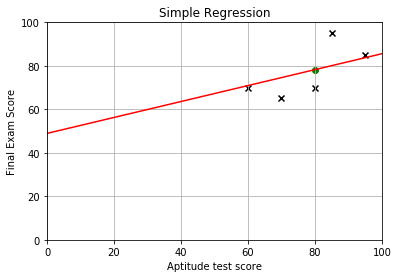

*** Iteration  10000  improvement 0.0005391488626855789  updatedRss:  384.9212383332291 
  B0:  48.9376225095657  B1:  0.3664300071088064 



[384.92124352 384.92123314]
[384.9212383  384.92123843]
[384.92070438 384.920694  ]
[384.92069916 384.92069929]
[384.92016524 384.92015486]
[384.92016002 384.92016015]
[384.91962611 384.91961573]
[384.91962088 384.91962101]
[384.91908698 384.9190766 ]
[384.91908175 384.91908188]
[384.91854786 384.91853747]
[384.91854263 384.91854276]
[384.91800874 384.91799835]
[384.91800351 384.91800364]
[384.91746962 384.91745924]
[384.9174644  384.91746453]
[384.91693052 384.91692013]
[384.91692529 384.91692542]
[384.91639141 384.91638103]
[384.91638619 384.91638632]
[384.91585231 384.91584193]
[384.91584709 384.91584722]
[384.91531322 384.91530284]
[384.915308   384.91530813]
[384.91477413 384.91476375]
[384.91476891 384.91476904]
[384.91423505 384.91422467]
[384.91422982 384.91422995]
[384.91369597 384.91368559]
[384.91369075 384.91369088]
[384.9131569  384.

[384.7414502  384.74143984]
[384.74144499 384.74144512]
[384.74091274 384.74090238]
[384.74090753 384.74090766]
[384.74037529 384.74036492]
[384.74037007 384.7403702 ]
[384.73983784 384.73982747]
[384.73983262 384.73983275]
[384.7393004  384.73929003]
[384.73929518 384.73929531]
[384.73876296 384.73875259]
[384.73875774 384.73875787]
[384.73822553 384.73821516]
[384.73822031 384.73822044]
[384.7376881  384.73767773]
[384.73768288 384.73768301]
[384.73715067 384.73714031]
[384.73714546 384.73714559]
[384.73661326 384.73660289]
[384.73660804 384.73660817]
[384.73607584 384.73606548]
[384.73607063 384.73607076]
[384.73553843 384.73552807]
[384.73553322 384.73553335]
[384.73500103 384.73499066]
[384.73499581 384.73499594]
[384.73446363 384.73445327]
[384.73445842 384.73445855]
[384.73392624 384.73391587]
[384.73392102 384.73392115]
[384.73338885 384.73337848]
[384.73338363 384.73338376]
[384.73285147 384.7328411 ]
[384.73284625 384.73284638]
[384.73231409 384.73230372]
[384.73230887 384.73

[384.55364697 384.55363662]
[384.55364176 384.55364189]
[384.55311127 384.55310092]
[384.55310606 384.55310619]
[384.55257558 384.55256523]
[384.55257037 384.5525705 ]
[384.55203989 384.55202954]
[384.55203468 384.55203481]
[384.55150421 384.55149386]
[384.551499   384.55149913]
[384.55096853 384.55095818]
[384.55096332 384.55096345]
[384.55043286 384.55042251]
[384.55042765 384.55042778]
[384.54989719 384.54988684]
[384.54989198 384.54989211]
[384.54936152 384.54935117]
[384.54935632 384.54935645]
[384.54882587 384.54881552]
[384.54882066 384.54882079]
[384.54829021 384.54827986]
[384.548285   384.54828513]
[384.54775456 384.54774421]
[384.54774936 384.54774949]
[384.54721892 384.54720857]
[384.54721371 384.54721384]
[384.54668328 384.54667293]
[384.54667807 384.5466782 ]
[384.54614765 384.5461373 ]
[384.54614244 384.54614257]
[384.54561202 384.54560167]
[384.54560681 384.54560694]
[384.5450764  384.54506605]
[384.54507119 384.54507132]
[384.54454078 384.54453043]
[384.54453557 384.54

[384.36111958 384.36110925]
[384.36111438 384.36111451]
[384.36058569 384.36057536]
[384.36058049 384.36058062]
[384.3600518  384.36004147]
[384.3600466  384.36004673]
[384.35951792 384.35950758]
[384.35951272 384.35951285]
[384.35898404 384.35897371]
[384.35897884 384.35897897]
[384.35845016 384.35843983]
[384.35844496 384.35844509]
[384.3579163  384.35790596]
[384.3579111  384.35791122]
[384.35738243 384.3573721 ]
[384.35737723 384.35737736]
[384.35684857 384.35683824]
[384.35684337 384.3568435 ]
[384.35631472 384.35630439]
[384.35630952 384.35630965]
[384.35578087 384.35577054]
[384.35577567 384.3557758 ]
[384.35524702 384.35523669]
[384.35524183 384.35524195]
[384.35471319 384.35470285]
[384.35470799 384.35470812]
[384.35417935 384.35416902]
[384.35417415 384.35417428]
[384.35364552 384.35363519]
[384.35364032 384.35364045]
[384.3531117  384.35310137]
[384.3531065  384.35310663]
[384.35257788 384.35256755]
[384.35257268 384.35257281]
[384.35204407 384.35203373]
[384.35203887 384.35

[384.19106093 384.19105061]
[384.19105574 384.19105587]
[384.19052863 384.19051831]
[384.19052344 384.19052357]
[384.18999633 384.18998602]
[384.18999114 384.18999127]
[384.18946404 384.18945373]
[384.18945885 384.18945898]
[384.18893176 384.18892144]
[384.18892657 384.1889267 ]
[384.18839948 384.18838916]
[384.18839429 384.18839442]
[384.1878672  384.18785689]
[384.18786201 384.18786214]
[384.18733493 384.18732462]
[384.18732974 384.18732987]
[384.18680267 384.18679235]
[384.18679748 384.18679761]
[384.18627041 384.18626009]
[384.18626522 384.18626534]
[384.18573815 384.18572784]
[384.18573296 384.18573309]
[384.1852059  384.18519559]
[384.18520071 384.18520084]
[384.18467366 384.18466334]
[384.18466846 384.18466859]
[384.18414142 384.1841311 ]
[384.18413622 384.18413635]
[384.18360918 384.18359886]
[384.18360399 384.18360412]
[384.18307695 384.18306663]
[384.18307176 384.18307189]
[384.18254473 384.18253441]
[384.18253953 384.18253966]
[384.1820125  384.18200219]
[384.18200731 384.18

[384.04433525 384.04432494]
[384.04433006 384.04433019]
[384.04380432 384.04379402]
[384.04379914 384.04379927]
[384.0432734 384.0432631]
[384.04326822 384.04326835]
[384.04274249 384.04273218]
[384.0427373  384.04273743]
[384.04221158 384.04220127]
[384.04220639 384.04220652]
[384.04168067 384.04167037]
[384.04167549 384.04167561]
[384.04114977 384.04113947]
[384.04114459 384.04114471]
[384.04061888 384.04060857]
[384.04061369 384.04061382]
[384.04008799 384.04007768]
[384.0400828  384.04008293]
[384.0395571 384.0395468]
[384.03955192 384.03955204]
[384.03902622 384.03901592]
[384.03902104 384.03902116]
[384.03849535 384.03848504]
[384.03849016 384.03849029]
[384.03796447 384.03795417]
[384.03795929 384.03795942]
[384.03743361 384.03742331]
[384.03742842 384.03742855]
[384.03690275 384.03689245]
[384.03689756 384.03689769]
[384.03637189 384.03636159]
[384.03636671 384.03636684]
[384.03584104 384.03583074]
[384.03583586 384.03583599]
[384.0353102 384.0352999]
[384.03530501 384.03530514

[383.8683361  383.86833623]
[383.867812   383.86780172]
[383.86780683 383.86780696]
[383.86728273 383.86727245]
[383.86727756 383.86727769]
[383.86675347 383.86674318]
[383.86674829 383.86674842]
[383.86622421 383.86621392]
[383.86621903 383.86621916]
[383.86569495 383.86568466]
[383.86568977 383.8656899 ]
[383.8651657  383.86515541]
[383.86516052 383.86516065]
[383.86463646 383.86462617]
[383.86463128 383.86463141]
[383.86410721 383.86409693]
[383.86410204 383.86410217]
[383.86357798 383.86356769]
[383.8635728  383.86357293]
[383.86304875 383.86303846]
[383.86304357 383.8630437 ]
[383.86251952 383.86250923]
[383.86251434 383.86251447]
[383.8619903  383.86198001]
[383.86198512 383.86198525]
[383.86146108 383.8614508 ]
[383.86145591 383.86145604]
[383.86093187 383.86092159]
[383.8609267  383.86092683]
[383.86040267 383.86039238]
[383.86039749 383.86039762]
[383.85987347 383.85986318]
[383.85986829 383.85986842]
[383.85934427 383.85933398]
[383.85933909 383.85933922]
[383.85881508 383.85

[383.66335437 383.6633441 ]
[383.6633492  383.66334933]
[383.66282702 383.66281675]
[383.66282185 383.66282198]
[383.66229967 383.6622894 ]
[383.6622945  383.66229463]
[383.66177232 383.66176205]
[383.66176716 383.66176728]
[383.66124498 383.66123471]
[383.66123982 383.66123994]
[383.66071765 383.66070738]
[383.66071248 383.66071261]
[383.66019032 383.66018005]
[383.66018515 383.66018528]
[383.659663   383.65965273]
[383.65965783 383.65965796]
[383.65913568 383.65912541]
[383.65913051 383.65913064]
[383.65860836 383.65859809]
[383.65860319 383.65860332]
[383.65808105 383.65807078]
[383.65807588 383.65807601]
[383.65755375 383.65754348]
[383.65754858 383.65754871]
[383.65702645 383.65701618]
[383.65702128 383.65702141]
[383.65649915 383.65648888]
[383.65649398 383.65649411]
[383.65597186 383.65596159]
[383.65596669 383.65596682]
[383.65544458 383.65543431]
[383.65543941 383.65543954]
[383.6549173  383.65490703]
[383.65491213 383.65491226]
[383.65439002 383.65437975]
[383.65438485 383.65

[383.48223579 383.48222554]
[383.48223063 383.48223076]
[383.48171013 383.48169988]
[383.48170497 383.4817051 ]
[383.48118448 383.48117423]
[383.48117932 383.48117945]
[383.48065883 383.48064858]
[383.48065368 383.4806538 ]
[383.48013319 383.48012294]
[383.48012803 383.48012816]
[383.47960756 383.4795973 ]
[383.4796024  383.47960252]
[383.47908192 383.47907167]
[383.47907676 383.47907689]
[383.4785563  383.47854604]
[383.47855114 383.47855127]
[383.47803067 383.47802042]
[383.47802551 383.47802564]
[383.47750506 383.4774948 ]
[383.4774999  383.47750003]
[383.47697944 383.47696919]
[383.47697429 383.47697441]
[383.47645384 383.47644358]
[383.47644868 383.47644881]
[383.47592823 383.47591798]
[383.47592308 383.4759232 ]
[383.47540264 383.47539238]
[383.47539748 383.47539761]
[383.47487704 383.47486679]
[383.47487188 383.47487201]
[383.47435146 383.4743412 ]
[383.4743463  383.47434643]
[383.47382587 383.47381562]
[383.47382071 383.47382084]
[383.4733003  383.47329004]
[383.47329514 383.47

[383.30746416 383.30745392]
[383.30745901 383.30745913]
[383.30694014 383.3069299 ]
[383.30693499 383.30693512]
[383.30641613 383.30640589]
[383.30641097 383.3064111 ]
[383.30589212 383.30588188]
[383.30588697 383.30588709]
[383.30536811 383.30535788]
[383.30536296 383.30536309]
[383.30484411 383.30483388]
[383.30483896 383.30483909]
[383.30432012 383.30430988]
[383.30431497 383.3043151 ]
[383.30379613 383.30378589]
[383.30379098 383.30379111]
[383.30327215 383.30326191]
[383.303267   383.30326712]
[383.30274817 383.30273793]
[383.30274302 383.30274314]
[383.30222419 383.30221396]
[383.30221904 383.30221917]
[383.30170022 383.30168999]
[383.30169507 383.3016952 ]
[383.30117626 383.30116602]
[383.30117111 383.30117124]
[383.3006523  383.30064206]
[383.30064715 383.30064728]
[383.30012834 383.30011811]
[383.30012319 383.30012332]
[383.29960439 383.29959416]
[383.29959924 383.29959937]
[383.29908045 383.29907021]
[383.2990753  383.29907543]
[383.29855651 383.29854627]
[383.29855136 383.29

[383.12279036 383.12278014]
[383.12278522 383.12278535]
[383.12226808 383.12225786]
[383.12226293 383.12226306]
[383.12174579 383.12173557]
[383.12174065 383.12174078]
[383.12122352 383.1212133 ]
[383.12121837 383.1212185 ]
[383.12070124 383.12069102]
[383.1206961  383.12069623]
[383.12017897 383.12016875]
[383.12017383 383.12017396]
[383.11965671 383.11964649]
[383.11965157 383.1196517 ]
[383.11913445 383.11912423]
[383.11912931 383.11912944]
[383.1186122  383.11860198]
[383.11860706 383.11860718]
[383.11808995 383.11807973]
[383.11808481 383.11808494]
[383.11756771 383.11755749]
[383.11756256 383.11756269]
[383.11704547 383.11703525]
[383.11704033 383.11704045]
[383.11652323 383.11651301]
[383.11651809 383.11651822]
[383.116001   383.11599079]
[383.11599586 383.11599599]
[383.11547878 383.11546856]
[383.11547364 383.11547377]
[383.11495656 383.11494634]
[383.11495142 383.11495155]
[383.11443435 383.11442413]
[383.1144292  383.11442933]
[383.11391214 383.11390192]
[383.11390699 383.11

[382.93091863 382.93090843]
[382.93091349 382.93091362]
[382.93039814 382.93038794]
[382.930393   382.93039313]
[382.92987765 382.92986745]
[382.92987252 382.92987265]
[382.92935717 382.92934697]
[382.92935204 382.92935217]
[382.9288367 382.9288265]
[382.92883157 382.92883169]
[382.92831623 382.92830603]
[382.9283111  382.92831122]
[382.92779576 382.92778556]
[382.92779063 382.92779076]
[382.9272753 382.9272651]
[382.92727017 382.9272703 ]
[382.92675485 382.92674465]
[382.92674971 382.92674984]
[382.9262344 382.9262242]
[382.92622926 382.92622939]
[382.92571395 382.92570375]
[382.92570882 382.92570895]
[382.92519351 382.92518331]
[382.92518838 382.92518851]
[382.92467308 382.92466287]
[382.92466794 382.92466807]
[382.92415264 382.92414244]
[382.92414751 382.92414764]
[382.92363222 382.92362202]
[382.92362709 382.92362721]
[382.9231118 382.9231016]
[382.92310666 382.92310679]
[382.92259138 382.92258118]
[382.92258625 382.92258638]
[382.92207097 382.92206077]
[382.92206584 382.92206596]


[382.76097831 382.76096813]
[382.76097319 382.76097332]
[382.76045942 382.76044923]
[382.76045429 382.76045442]
[382.75994053 382.75993034]
[382.7599354  382.75993553]
[382.75942164 382.75941145]
[382.75941651 382.75941664]
[382.75890276 382.75889257]
[382.75889763 382.75889776]
[382.75838388 382.75837369]
[382.75837875 382.75837888]
[382.75786501 382.75785482]
[382.75785988 382.75786001]
[382.75734614 382.75733595]
[382.75734101 382.75734114]
[382.75682728 382.75681709]
[382.75682215 382.75682228]
[382.75630842 382.75629823]
[382.75630329 382.75630342]
[382.75578957 382.75577938]
[382.75578444 382.75578457]
[382.75527072 382.75526053]
[382.75526559 382.75526572]
[382.75475187 382.75474169]
[382.75474675 382.75474688]
[382.75423304 382.75422285]
[382.75422791 382.75422804]
[382.7537142  382.75370402]
[382.75370908 382.7537092 ]
[382.75319537 382.75318519]
[382.75319025 382.75319038]
[382.75267655 382.75266636]
[382.75267142 382.75267155]
[382.75215773 382.75214755]
[382.75215261 382.75

[382.57448429 382.57448442]
[382.57397226 382.57396209]
[382.57396714 382.57396727]
[382.57345512 382.57344495]
[382.57345    382.57345013]
[382.57293798 382.57292781]
[382.57293286 382.57293299]
[382.57242084 382.57241067]
[382.57241573 382.57241585]
[382.57190371 382.57189354]
[382.5718986  382.57189872]
[382.57138659 382.57137642]
[382.57138147 382.5713816 ]
[382.57086947 382.5708593 ]
[382.57086435 382.57086448]
[382.57035235 382.57034218]
[382.57034724 382.57034736]
[382.56983524 382.56982507]
[382.56983013 382.56983025]
[382.56931814 382.56930797]
[382.56931302 382.56931315]
[382.56880104 382.56879087]
[382.56879592 382.56879605]
[382.56828394 382.56827377]
[382.56827883 382.56827895]
[382.56776685 382.56775668]
[382.56776173 382.56776186]
[382.56724977 382.5672396 ]
[382.56724465 382.56724478]
[382.56673268 382.56672252]
[382.56672757 382.5667277 ]
[382.56621561 382.56620544]
[382.56621049 382.56621062]
[382.56569854 382.56568837]
[382.56569342 382.56569355]
[382.56518147 382.56

[382.39790683 382.39789668]
[382.39790172 382.39790185]
[382.39739133 382.39738118]
[382.39738623 382.39738635]
[382.39687585 382.39686569]
[382.39687074 382.39687086]
[382.39636036 382.39635021]
[382.39635525 382.39635538]
[382.39584488 382.39583473]
[382.39583977 382.3958399 ]
[382.39532941 382.39531925]
[382.3953243  382.39532443]
[382.39481394 382.39480379]
[382.39480883 382.39480896]
[382.39429847 382.39428832]
[382.39429336 382.39429349]
[382.39378301 382.39377286]
[382.3937779  382.39377803]
[382.39326756 382.39325741]
[382.39326245 382.39326258]
[382.39275211 382.39274195]
[382.392747   382.39274713]
[382.39223666 382.39222651]
[382.39223155 382.39223168]
[382.39172122 382.39171107]
[382.39171611 382.39171624]
[382.39120579 382.39119563]
[382.39120068 382.3912008 ]
[382.39069035 382.3906802 ]
[382.39068525 382.39068537]
[382.39017493 382.39016478]
[382.39016982 382.39016995]
[382.38965951 382.38964935]
[382.3896544  382.38965453]
[382.38914409 382.38913394]
[382.38913898 382.38

[382.22548641 382.22547627]
[382.2254813  382.22548143]
[382.22497253 382.22496239]
[382.22496743 382.22496755]
[382.22445865 382.22444852]
[382.22445355 382.22445368]
[382.22394479 382.22393465]
[382.22393969 382.22393981]
[382.22343092 382.22342079]
[382.22342582 382.22342595]
[382.22291706 382.22290693]
[382.22291196 382.22291209]
[382.22240321 382.22239307]
[382.22239811 382.22239824]
[382.22188936 382.22187923]
[382.22188426 382.22188439]
[382.22137552 382.22136538]
[382.22137042 382.22137054]
[382.22086168 382.22085154]
[382.22085658 382.2208567 ]
[382.22034784 382.22033771]
[382.22034274 382.22034287]
[382.21983401 382.21982388]
[382.21982891 382.21982904]
[382.21932019 382.21931005]
[382.21931509 382.21931522]
[382.21880637 382.21879623]
[382.21880127 382.2188014 ]
[382.21829255 382.21828242]
[382.21828745 382.21828758]
[382.21777874 382.21776861]
[382.21777364 382.21777377]
[382.21726494 382.2172548 ]
[382.21725984 382.21725996]
[382.21675114 382.216741  ]
[382.21674604 382.21

[382.03926484 382.03925472]
[382.03925975 382.03925988]
[382.03875271 382.03874259]
[382.03874762 382.03874774]
[382.03824058 382.03823046]
[382.03823549 382.03823562]
[382.03772846 382.03771834]
[382.03772337 382.03772349]
[382.03721634 382.03720622]
[382.03721125 382.03721138]
[382.03670423 382.03669411]
[382.03669914 382.03669926]
[382.03619212 382.036182  ]
[382.03618703 382.03618715]
[382.03568002 382.0356699 ]
[382.03567492 382.03567505]
[382.03516792 382.0351578 ]
[382.03516282 382.03516295]
[382.03465582 382.0346457 ]
[382.03465073 382.03465086]
[382.03414373 382.03413361]
[382.03413864 382.03413877]
[382.03363165 382.03362153]
[382.03362656 382.03362668]
[382.03311957 382.03310945]
[382.03311448 382.0331146 ]
[382.03260749 382.03259737]
[382.0326024  382.03260253]
[382.03209542 382.0320853 ]
[382.03209033 382.03209046]
[382.03158336 382.03157324]
[382.03157827 382.03157839]
[382.0310713  382.03106118]
[382.03106621 382.03106633]
[382.03055924 382.03054912]
[382.03055415 382.03

[381.86183763 381.86183775]
[381.86133224 381.86132214]
[381.86132716 381.86132728]
[381.86082178 381.86081167]
[381.86081669 381.86081682]
[381.86031132 381.86030121]
[381.86030623 381.86030636]
[381.85980086 381.85979076]
[381.85979578 381.8597959 ]
[381.85929041 381.85928031]
[381.85928533 381.85928545]
[381.85877996 381.85876986]
[381.85877488 381.85877501]
[381.85826952 381.85825942]
[381.85826444 381.85826457]
[381.85775909 381.85774898]
[381.857754   381.85775413]
[381.85724866 381.85723855]
[381.85724357 381.8572437 ]
[381.85673823 381.85672813]
[381.85673315 381.85673327]
[381.85622781 381.85621771]
[381.85622272 381.85622285]
[381.85571739 381.85570729]
[381.85571231 381.85571243]
[381.85520698 381.85519688]
[381.8552019  381.85520202]
[381.85469657 381.85468647]
[381.85469149 381.85469161]
[381.85418617 381.85417607]
[381.85418109 381.85418121]
[381.85367577 381.85366567]
[381.85367069 381.85367081]
[381.85316538 381.85315528]
[381.85316029 381.85316042]
[381.85265499 381.85

[381.68143508 381.681425  ]
[381.68143001 381.68143013]
[381.6809263  381.68091622]
[381.68092123 381.68092135]
[381.68041753 381.68040744]
[381.68041245 381.68041258]
[381.67990876 381.67989867]
[381.67990369 381.67990381]
[381.6794     381.67938991]
[381.67939492 381.67939505]
[381.67889124 381.67888115]
[381.67888616 381.67888629]
[381.67838248 381.6783724 ]
[381.67837741 381.67837753]
[381.67787373 381.67786365]
[381.67786866 381.67786878]
[381.67736499 381.6773549 ]
[381.67735991 381.67736004]
[381.67685625 381.67684616]
[381.67685117 381.6768513 ]
[381.67634751 381.67633742]
[381.67634243 381.67634256]
[381.67583878 381.67582869]
[381.6758337  381.67583383]
[381.67533005 381.67531997]
[381.67532498 381.6753251 ]
[381.67482133 381.67481125]
[381.67481626 381.67481638]
[381.67431261 381.67430253]
[381.67430754 381.67430767]
[381.6738039  381.67379382]
[381.67379883 381.67379895]
[381.6732952  381.67328511]
[381.67329012 381.67329025]
[381.67278649 381.67277641]
[381.67278142 381.67

[381.50466769 381.50465762]
[381.50466263 381.50466275]
[381.50416057 381.5041505 ]
[381.50415551 381.50415563]
[381.50365346 381.50364339]
[381.50364839 381.50364851]
[381.50314634 381.50313627]
[381.50314128 381.5031414 ]
[381.50263924 381.50262917]
[381.50263417 381.50263429]
[381.50213213 381.50212206]
[381.50212707 381.50212719]
[381.50162503 381.50161496]
[381.50161997 381.50162009]
[381.50111794 381.50110787]
[381.50111287 381.501113  ]
[381.50061085 381.50060078]
[381.50060579 381.50060591]
[381.50010377 381.5000937 ]
[381.5000987  381.50009883]
[381.49959669 381.49958662]
[381.49959162 381.49959175]
[381.49908961 381.49907954]
[381.49908455 381.49908467]
[381.49858254 381.49857247]
[381.49857748 381.4985776 ]
[381.49807548 381.49806541]
[381.49807041 381.49807054]
[381.49756842 381.49755835]
[381.49756335 381.49756348]
[381.49706136 381.49705129]
[381.4970563  381.49705642]
[381.49655431 381.49654424]
[381.49654925 381.49654937]
[381.49604727 381.4960372 ]
[381.4960422  381.49

[381.34414786 381.3441378 ]
[381.3441428  381.34414293]
[381.34364224 381.34363219]
[381.34363718 381.34363731]
[381.34313663 381.34312657]
[381.34313157 381.34313169]
[381.34263102 381.34262097]
[381.34262596 381.34262609]
[381.34212542 381.34211536]
[381.34212036 381.34212048]
[381.34161982 381.34160976]
[381.34161476 381.34161489]
[381.34111422 381.34110417]
[381.34110917 381.34110929]
[381.34060864 381.34059858]
[381.34060358 381.3406037 ]
[381.34010305 381.340093  ]
[381.34009799 381.34009812]
[381.33959747 381.33958742]
[381.33959241 381.33959254]
[381.3390919  381.33908184]
[381.33908684 381.33908696]
[381.33858633 381.33857627]
[381.33858127 381.33858139]
[381.33808076 381.33807071]
[381.3380757  381.33807583]
[381.3375752  381.33756515]
[381.33757014 381.33757027]
[381.33706965 381.33705959]
[381.33706459 381.33706471]
[381.33656409 381.33655404]
[381.33655903 381.33655916]
[381.33605855 381.33604849]
[381.33605349 381.33605361]
[381.33555301 381.33554295]
[381.33554795 381.33

[381.17755108 381.17754104]
[381.17754602 381.17754615]
[381.17704702 381.17703698]
[381.17704197 381.17704209]
[381.17654297 381.17653293]
[381.17653792 381.17653804]
[381.17603892 381.17602888]
[381.17603387 381.176034  ]
[381.17553488 381.17552484]
[381.17552983 381.17552995]
[381.17503084 381.1750208 ]
[381.17502579 381.17502592]
[381.17452681 381.17451677]
[381.17452176 381.17452189]
[381.17402278 381.17401274]
[381.17401773 381.17401786]
[381.17351876 381.17350872]
[381.17351371 381.17351383]
[381.17301474 381.1730047 ]
[381.17300969 381.17300982]
[381.17251073 381.17250069]
[381.17250568 381.1725058 ]
[381.17200672 381.17199668]
[381.17200167 381.17200179]
[381.17150272 381.17149268]
[381.17149766 381.17149779]
[381.17099872 381.17098868]
[381.17099367 381.17099379]
[381.17049472 381.17048468]
[381.17048967 381.1704898 ]
[381.16999073 381.16998069]
[381.16998568 381.16998581]
[381.16948675 381.16947671]
[381.1694817  381.16948182]
[381.16898277 381.16897273]
[381.16897771 381.16

[380.9838383  380.98382827]
[380.98383325 380.98383338]
[380.98333606 380.98332603]
[380.98333101 380.98333114]
[380.98283382 380.9828238 ]
[380.98282878 380.9828289 ]
[380.98233159 380.98232157]
[380.98232655 380.98232667]
[380.98182936 380.98181934]
[380.98182432 380.98182445]
[380.98132714 380.98131712]
[380.9813221  380.98132222]
[380.98082492 380.9808149 ]
[380.98081988 380.98082001]
[380.98032271 380.98031269]
[380.98031767 380.98031779]
[380.9798205  380.97981048]
[380.97981546 380.97981559]
[380.9793183  380.97930828]
[380.97931326 380.97931338]
[380.9788161  380.97880608]
[380.97881106 380.97881119]
[380.97831391 380.97830389]
[380.97830887 380.97830899]
[380.97781172 380.9778017 ]
[380.97780668 380.9778068 ]
[380.97730954 380.97729952]
[380.97730449 380.97730462]
[380.97680736 380.97679734]
[380.97680232 380.97680244]
[380.97630518 380.97629516]
[380.97630014 380.97630027]
[380.97580301 380.97579299]
[380.97579797 380.9757981 ]
[380.97530085 380.97529083]
[380.97529581 380.97

[380.8188549 380.8188449]
[380.81884987 380.81884999]
[380.81835421 380.8183442 ]
[380.81834917 380.8183493 ]
[380.81785352 380.81784351]
[380.81784848 380.81784861]
[380.81735283 380.81734283]
[380.8173478  380.81734792]
[380.81685215 380.81684215]
[380.81684712 380.81684724]
[380.81635148 380.81634147]
[380.81634644 380.81634657]
[380.81585081 380.8158408 ]
[380.81584577 380.8158459 ]
[380.81535014 380.81534014]
[380.81534511 380.81534523]
[380.81484948 380.81483947]
[380.81484445 380.81484457]
[380.81434882 380.81433882]
[380.81434379 380.81434391]
[380.81384817 380.81383817]
[380.81384314 380.81384326]
[380.81334752 380.81333752]
[380.81334249 380.81334262]
[380.81284688 380.81283688]
[380.81284185 380.81284197]
[380.81234624 380.81233624]
[380.81234121 380.81234134]
[380.81184561 380.81183561]
[380.81184058 380.8118407 ]
[380.81134498 380.81133498]
[380.81133995 380.81134007]
[380.81084436 380.81083435]
[380.81083932 380.81083945]
[380.81034374 380.81033373]
[380.81033871 380.8103

[380.64938815 380.64937816]
[380.64938312 380.64938325]
[380.64888904 380.64887905]
[380.64888402 380.64888414]
[380.64838994 380.64837995]
[380.64838491 380.64838504]
[380.64789084 380.64788085]
[380.64788582 380.64788594]
[380.64739175 380.64738176]
[380.64738673 380.64738685]
[380.64689267 380.64688268]
[380.64688764 380.64688776]
[380.64639358 380.64638359]
[380.64638856 380.64638868]
[380.64589451 380.64588452]
[380.64588948 380.6458896 ]
[380.64539543 380.64538544]
[380.64539041 380.64539053]
[380.64489636 380.64488637]
[380.64489134 380.64489146]
[380.6443973  380.64438731]
[380.64439227 380.6443924 ]
[380.64389824 380.64388825]
[380.64389321 380.64389334]
[380.64339919 380.6433892 ]
[380.64339416 380.64339429]
[380.64290014 380.64289015]
[380.64289511 380.64289524]
[380.64240109 380.6423911 ]
[380.64239607 380.64239619]
[380.64190205 380.64189206]
[380.64189702 380.64189715]
[380.64140302 380.64139303]
[380.64139799 380.64139811]
[380.64090398 380.64089399]
[380.64089896 380.64

[380.4779664  380.47796652]
[380.47747392 380.47746394]
[380.4774689  380.47746903]
[380.47697642 380.47696645]
[380.47697141 380.47697153]
[380.47647893 380.47646896]
[380.47647392 380.47647404]
[380.47598145 380.47597148]
[380.47597643 380.47597656]
[380.47548397 380.47547399]
[380.47547895 380.47547908]
[380.47498649 380.47497652]
[380.47498147 380.4749816 ]
[380.47448902 380.47447905]
[380.474484   380.47448413]
[380.47399155 380.47398158]
[380.47398654 380.47398666]
[380.47349409 380.47348412]
[380.47348907 380.4734892 ]
[380.47299664 380.47298666]
[380.47299162 380.47299174]
[380.47249918 380.47248921]
[380.47249416 380.47249429]
[380.47200173 380.47199176]
[380.47199672 380.47199684]
[380.47150429 380.47149432]
[380.47149927 380.4714994 ]
[380.47100685 380.47099688]
[380.47100183 380.47100196]
[380.47050942 380.47049945]
[380.4705044  380.47050453]
[380.47001199 380.47000202]
[380.47000697 380.4700071 ]
[380.46951457 380.46950459]
[380.46950955 380.46950967]
[380.46901715 380.46

[380.30760238 380.30759242]
[380.30759736 380.30759749]
[380.30710647 380.30709651]
[380.30710146 380.30710159]
[380.30661057 380.30660062]
[380.30660556 380.30660569]
[380.30611468 380.30610472]
[380.30610967 380.3061098 ]
[380.30561879 380.30560884]
[380.30561378 380.30561391]
[380.30512291 380.30511295]
[380.3051179  380.30511802]
[380.30462703 380.30461707]
[380.30462202 380.30462214]
[380.30413116 380.3041212 ]
[380.30412615 380.30412627]
[380.30363529 380.30362533]
[380.30363028 380.3036304 ]
[380.30313942 380.30312946]
[380.30313441 380.30313453]
[380.30264356 380.3026336 ]
[380.30263855 380.30263867]
[380.3021477  380.30213775]
[380.30214269 380.30214282]
[380.30165185 380.30164189]
[380.30164684 380.30164697]
[380.30115601 380.30114605]
[380.301151   380.30115112]
[380.30066016 380.30065021]
[380.30065515 380.30065528]
[380.30016433 380.30015437]
[380.30015932 380.30015944]
[380.29966849 380.29965854]
[380.29966348 380.29966361]
[380.29917267 380.29916271]
[380.29916766 380.29

[380.13086022 380.13085028]
[380.13085522 380.13085535]
[380.13036598 380.13035604]
[380.13036098 380.1303611 ]
[380.12987174 380.12986179]
[380.12986673 380.12986686]
[380.1293775  380.12936756]
[380.1293725  380.12937262]
[380.12888327 380.12887333]
[380.12887827 380.12887839]
[380.12838904 380.1283791 ]
[380.12838404 380.12838416]
[380.12789482 380.12788488]
[380.12788982 380.12788994]
[380.1274006  380.12739066]
[380.1273956  380.12739572]
[380.12690639 380.12689644]
[380.12690138 380.12690151]
[380.12641218 380.12640224]
[380.12640717 380.1264073 ]
[380.12591797 380.12590803]
[380.12591297 380.12591309]
[380.12542377 380.12541383]
[380.12541877 380.1254189 ]
[380.12492958 380.12491964]
[380.12492458 380.1249247 ]
[380.12443539 380.12442545]
[380.12443039 380.12443051]
[380.1239412  380.12393126]
[380.1239362  380.12393632]
[380.12344702 380.12343708]
[380.12344202 380.12344214]
[380.12295284 380.1229429 ]
[380.12294784 380.12294797]
[380.12245867 380.12244873]
[380.12245367 380.12

[379.96012731 379.96011739]
[379.96012232 379.96012244]
[379.95963467 379.95962474]
[379.95962967 379.9596298 ]
[379.95914202 379.9591321 ]
[379.95913703 379.95913715]
[379.95864939 379.95863946]
[379.95864439 379.95864452]
[379.95815676 379.95814683]
[379.95815176 379.95815189]
[379.95766413 379.9576542 ]
[379.95765914 379.95765926]
[379.95717151 379.95716158]
[379.95716651 379.95716664]
[379.95667889 379.95666896]
[379.95667389 379.95667402]
[379.95618627 379.95617635]
[379.95618128 379.95618141]
[379.95569367 379.95568374]
[379.95568867 379.9556888 ]
[379.95520106 379.95519114]
[379.95519607 379.95519619]
[379.95470846 379.95469854]
[379.95470347 379.95470359]
[379.95421587 379.95420594]
[379.95421087 379.954211  ]
[379.95372328 379.95371335]
[379.95371828 379.95371841]
[379.95323069 379.95322077]
[379.9532257  379.95322582]
[379.95273811 379.95272819]
[379.95273312 379.95273324]
[379.95224553 379.95223561]
[379.95224054 379.95224066]
[379.95175296 379.95174304]
[379.95174797 379.95

[379.8425162  379.84250629]
[379.84251121 379.84251134]
[379.84202466 379.84201474]
[379.84201967 379.8420198 ]
[379.84153312 379.84152321]
[379.84152813 379.84152826]
[379.84104159 379.84103167]
[379.8410366  379.84103672]
[379.84055006 379.84054014]
[379.84054507 379.84054519]
[379.84005853 379.84004862]
[379.84005354 379.84005367]
[379.83956701 379.8395571 ]
[379.83956202 379.83956215]
[379.8390755  379.83906558]
[379.83907051 379.83907063]
[379.83858398 379.83857407]
[379.838579   379.83857912]
[379.83809248 379.83808256]
[379.83808749 379.83808761]
[379.83760098 379.83759106]
[379.83759599 379.83759611]
[379.83710948 379.83709956]
[379.83710449 379.83710461]
[379.83661799 379.83660807]
[379.836613   379.83661312]
[379.8361265  379.83611658]
[379.83612151 379.83612163]
[379.83563501 379.8356251 ]
[379.83563003 379.83563015]
[379.83514353 379.83513362]
[379.83513855 379.83513867]
[379.83465206 379.83464215]
[379.83464707 379.8346472 ]
[379.83416059 379.83415068]
[379.8341556  379.83

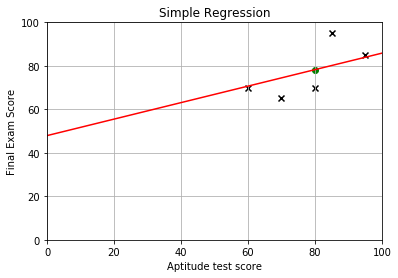

*** Iteration  20000  improvement 0.0004909126587335777  updatedRss:  379.7747217860829 
  B0:  47.923247778417704  B1:  0.37913009163644346 



[379.77472674 379.77471683]
[379.77472176 379.77472188]
[379.77423583 379.77422592]
[379.77423085 379.77423097]
[379.77374493 379.77373502]
[379.77373994 379.77374007]
[379.77325403 379.77324412]
[379.77324904 379.77324917]
[379.77276314 379.77275323]
[379.77275815 379.77275827]
[379.77227225 379.77226234]
[379.77226726 379.77226739]
[379.77178136 379.77177145]
[379.77177638 379.7717765 ]
[379.77129048 379.77128057]
[379.7712855  379.77128562]
[379.7707996 379.7707897]
[379.77079462 379.77079474]
[379.77030873 379.77029883]
[379.77030375 379.77030387]
[379.76981787 379.76980796]
[379.76981288 379.76981301]
[379.769327  379.7693171]
[379.76932202 379.76932214]
[379.76883615 379.76882624]
[379.76883116 379.76883129]
[379.76834529 379.76833539]
[379.76834031 379.76834043]
[379.76785445 379.76784454]
[379.76784946 379.76784959]
[379.7673636  379.7

[379.58557769 379.5855678 ]
[379.58557272 379.58557284]
[379.58508856 379.58507867]
[379.58508358 379.58508371]
[379.58459943 379.58458954]
[379.58459445 379.58459457]
[379.5841103  379.58410041]
[379.58410533 379.58410545]
[379.58362118 379.58361129]
[379.5836162  379.58361633]
[379.58313206 379.58312217]
[379.58312709 379.58312721]
[379.58264295 379.58263306]
[379.58263797 379.5826381 ]
[379.58215384 379.58214395]
[379.58214887 379.58214899]
[379.58166474 379.58165485]
[379.58165976 379.58165989]
[379.58117564 379.58116575]
[379.58117066 379.58117079]
[379.58068655 379.58067666]
[379.58068157 379.58068169]
[379.58019746 379.58018757]
[379.58019248 379.58019261]
[379.57970837 379.57969848]
[379.5797034  379.57970352]
[379.57921929 379.5792094 ]
[379.57921432 379.57921444]
[379.57873022 379.57872033]
[379.57872524 379.57872536]
[379.57824115 379.57823126]
[379.57823617 379.57823629]
[379.57775208 379.57774219]
[379.5777471  379.57774723]
[379.57726302 379.57725313]
[379.57725804 379.57

[379.37566684 379.37566696]
[379.37518464 379.37517477]
[379.37517967 379.37517979]
[379.37469747 379.3746876 ]
[379.37469251 379.37469263]
[379.37421031 379.37420044]
[379.37420535 379.37420547]
[379.37372316 379.37371329]
[379.37371819 379.37371832]
[379.37323601 379.37322614]
[379.37323104 379.37323117]
[379.37274886 379.37273899]
[379.3727439  379.37274402]
[379.37226172 379.37225185]
[379.37225676 379.37225688]
[379.37177459 379.37176472]
[379.37176962 379.37176975]
[379.37128746 379.37127759]
[379.37128249 379.37128261]
[379.37080033 379.37079046]
[379.37079536 379.37079549]
[379.37031321 379.37030334]
[379.37030824 379.37030837]
[379.36982609 379.36981622]
[379.36982112 379.36982125]
[379.36933898 379.36932911]
[379.36933401 379.36933413]
[379.36885187 379.368842  ]
[379.3688469  379.36884703]
[379.36836476 379.36835489]
[379.3683598  379.36835992]
[379.36787766 379.3678678 ]
[379.3678727  379.36787282]
[379.36739057 379.3673807 ]
[379.3673856  379.36738573]
[379.36690348 379.36

[379.16272863 379.16271878]
[379.16272368 379.1627238 ]
[379.16224346 379.16223361]
[379.16223851 379.16223863]
[379.16175829 379.16174844]
[379.16175334 379.16175346]
[379.16127313 379.16126328]
[379.16126817 379.1612683 ]
[379.16078797 379.16077812]
[379.16078302 379.16078314]
[379.16030282 379.16029297]
[379.16029786 379.16029799]
[379.15981767 379.15980782]
[379.15981271 379.15981284]
[379.15933252 379.15932267]
[379.15932757 379.15932769]
[379.15884738 379.15883753]
[379.15884243 379.15884255]
[379.15836225 379.1583524 ]
[379.15835729 379.15835742]
[379.15787712 379.15786727]
[379.15787216 379.15787228]
[379.15739199 379.15738214]
[379.15738703 379.15738716]
[379.15690687 379.15689702]
[379.15690191 379.15690204]
[379.15642175 379.1564119 ]
[379.15641679 379.15641692]
[379.15593664 379.15592679]
[379.15593168 379.15593181]
[379.15545153 379.15544168]
[379.15544657 379.1554467 ]
[379.15496642 379.15495658]
[379.15496147 379.15496159]
[379.15448133 379.15447148]
[379.15447637 379.15

[378.96612213 378.9661123 ]
[378.96611719 378.96611731]
[378.96563881 378.96562897]
[378.96563386 378.96563398]
[378.96515548 378.96514565]
[378.96515053 378.96515066]
[378.96467216 378.96466233]
[378.96466721 378.96466734]
[378.96418884 378.96417901]
[378.9641839  378.96418402]
[378.96370553 378.9636957 ]
[378.96370059 378.96370071]
[378.96322223 378.9632124 ]
[378.96321728 378.9632174 ]
[378.96273892 378.96272909]
[378.96273398 378.9627341 ]
[378.96225563 378.9622458 ]
[378.96225068 378.9622508 ]
[378.96177233 378.9617625 ]
[378.96176739 378.96176751]
[378.96128904 378.96127921]
[378.9612841  378.96128422]
[378.96080576 378.96079593]
[378.96080081 378.96080094]
[378.96032248 378.96031265]
[378.96031754 378.96031766]
[378.95983921 378.95982938]
[378.95983426 378.95983438]
[378.95935594 378.9593461 ]
[378.95935099 378.95935111]
[378.95887267 378.95886284]
[378.95886772 378.95886785]
[378.95838941 378.95837958]
[378.95838446 378.95838459]
[378.95790615 378.95789632]
[378.95790121 378.95

[378.77026235 378.77025254]
[378.77025742 378.77025754]
[378.76978086 378.76977105]
[378.76977592 378.76977605]
[378.76929937 378.76928956]
[378.76929443 378.76929456]
[378.76881789 378.76880807]
[378.76881295 378.76881307]
[378.76833641 378.76832659]
[378.76833147 378.76833159]
[378.76785493 378.76784512]
[378.76784999 378.76785012]
[378.76737346 378.76736365]
[378.76736852 378.76736864]
[378.76689199 378.76688218]
[378.76688706 378.76688718]
[378.76641053 378.76640072]
[378.76640559 378.76640572]
[378.76592907 378.76591926]
[378.76592414 378.76592426]
[378.76544762 378.76543781]
[378.76544268 378.76544281]
[378.76496617 378.76495636]
[378.76496123 378.76496136]
[378.76448473 378.76447491]
[378.76447979 378.76447991]
[378.76400329 378.76399347]
[378.76399835 378.76399847]
[378.76352185 378.76351204]
[378.76351692 378.76351704]
[378.76304042 378.76303061]
[378.76303548 378.76303561]
[378.76255899 378.76254918]
[378.76255406 378.76255418]
[378.76207757 378.76206776]
[378.76207264 378.76

[378.54637451 378.54636472]
[378.54636958 378.5463697 ]
[378.54589511 378.54588532]
[378.54589019 378.54589031]
[378.54541572 378.54540593]
[378.5454108  378.54541092]
[378.54493633 378.54492654]
[378.54493141 378.54493153]
[378.54445695 378.54444716]
[378.54445203 378.54445215]
[378.54397758 378.54396778]
[378.54397265 378.54397277]
[378.5434982  378.54348841]
[378.54349328 378.5434934 ]
[378.54301883 378.54300904]
[378.54301391 378.54301403]
[378.54253947 378.54252968]
[378.54253454 378.54253467]
[378.54206011 378.54205032]
[378.54205519 378.54205531]
[378.54158076 378.54157097]
[378.54157583 378.54157595]
[378.54110141 378.54109161]
[378.54109648 378.5410966 ]
[378.54062206 378.54061227]
[378.54061713 378.54061726]
[378.54014272 378.54013293]
[378.54013779 378.54013792]
[378.53966338 378.53965359]
[378.53965846 378.53965858]
[378.53918405 378.53917426]
[378.53917912 378.53917925]
[378.53870472 378.53869493]
[378.5386998  378.53869992]
[378.5382254  378.53821561]
[378.53822047 378.53

[378.34112585 378.34111608]
[378.34112094 378.34112106]
[378.34064838 378.34063861]
[378.34064347 378.34064359]
[378.34017092 378.34016114]
[378.340166   378.34016612]
[378.33969345 378.33968368]
[378.33968854 378.33968866]
[378.33921599 378.33920622]
[378.33921108 378.3392112 ]
[378.33873854 378.33872877]
[378.33873362 378.33873375]
[378.33826109 378.33825132]
[378.33825618 378.3382563 ]
[378.33778365 378.33777388]
[378.33777873 378.33777885]
[378.33730621 378.33729643]
[378.33730129 378.33730141]
[378.33682877 378.336819  ]
[378.33682385 378.33682398]
[378.33635134 378.33634157]
[378.33634642 378.33634655]
[378.33587391 378.33586414]
[378.335869   378.33586912]
[378.33539649 378.33538672]
[378.33539157 378.3353917 ]
[378.33491907 378.3349093 ]
[378.33491416 378.33491428]
[378.33444166 378.33443189]
[378.33443674 378.33443686]
[378.33396425 378.33395448]
[378.33395933 378.33395946]
[378.33348684 378.33347707]
[378.33348193 378.33348205]
[378.33300944 378.33299967]
[378.33300453 378.33

[378.12671508 378.12670533]
[378.12671017 378.1267103 ]
[378.12623962 378.12622987]
[378.12623471 378.12623483]
[378.12576416 378.12575441]
[378.12575925 378.12575938]
[378.12528871 378.12527896]
[378.1252838  378.12528392]
[378.12481326 378.12480351]
[378.12480835 378.12480847]
[378.12433781 378.12432806]
[378.12433291 378.12433303]
[378.12386237 378.12385262]
[378.12385747 378.12385759]
[378.12338694 378.12337719]
[378.12338203 378.12338216]
[378.12291151 378.12290176]
[378.1229066  378.12290672]
[378.12243608 378.12242633]
[378.12243118 378.1224313 ]
[378.12196066 378.12195091]
[378.12195575 378.12195588]
[378.12148524 378.12147549]
[378.12148034 378.12148046]
[378.12100983 378.12100008]
[378.12100492 378.12100505]
[378.12053442 378.12052467]
[378.12052951 378.12052964]
[378.12005902 378.12004927]
[378.12005411 378.12005423]
[378.11958362 378.11957387]
[378.11957871 378.11957883]
[378.11910822 378.11909847]
[378.11910332 378.11910344]
[378.11863283 378.11862308]
[378.11862793 378.11

[377.93499071 377.93498098]
[377.93498582 377.93498594]
[377.93451705 377.93450731]
[377.93451215 377.93451227]
[377.93404339 377.93403365]
[377.93403849 377.93403861]
[377.93356973 377.93356   ]
[377.93356483 377.93356496]
[377.93309608 377.93308635]
[377.93309118 377.9330913 ]
[377.93262243 377.9326127 ]
[377.93261753 377.93261766]
[377.93214879 377.93213906]
[377.93214389 377.93214401]
[377.93167515 377.93166542]
[377.93167025 377.93167037]
[377.93120151 377.93119178]
[377.93119662 377.93119674]
[377.93072789 377.93071815]
[377.93072299 377.93072311]
[377.93025426 377.93024453]
[377.93024936 377.93024949]
[377.92978064 377.92977091]
[377.92977574 377.92977587]
[377.92930702 377.92929729]
[377.92930213 377.92930225]
[377.92883341 377.92882368]
[377.92882852 377.92882864]
[377.9283598  377.92835007]
[377.92835491 377.92835503]
[377.9278862  377.92787647]
[377.9278813  377.92788143]
[377.9274126  377.92740287]
[377.92740771 377.92740783]
[377.92693901 377.92692928]
[377.92693411 377.92

[377.78741747 377.7874176 ]
[377.78695008 377.78694036]
[377.78694519 377.78694531]
[377.7864778  377.78646808]
[377.78647291 377.78647304]
[377.78600553 377.78599581]
[377.78600064 377.78600076]
[377.78553326 377.78552354]
[377.78552837 377.78552849]
[377.785061   377.78505128]
[377.78505611 377.78505623]
[377.78458874 377.78457902]
[377.78458385 377.78458397]
[377.78411648 377.78410676]
[377.78411159 377.78411171]
[377.78364423 377.78363451]
[377.78363934 377.78363946]
[377.78317198 377.78316227]
[377.78316709 377.78316722]
[377.78269974 377.78269002]
[377.78269485 377.78269497]
[377.7822275  377.78221779]
[377.78222261 377.78222274]
[377.78175527 377.78174555]
[377.78175038 377.7817505 ]
[377.78128304 377.78127332]
[377.78127815 377.78127827]
[377.78081082 377.7808011 ]
[377.78080593 377.78080605]
[377.7803386  377.78032888]
[377.78033371 377.78033383]
[377.77986638 377.77985666]
[377.77986149 377.77986161]
[377.77939417 377.77938445]
[377.77938928 377.7793894 ]
[377.77892196 377.77

[377.59274599 377.59273629]
[377.59274111 377.59274123]
[377.59227553 377.59226583]
[377.59227065 377.59227077]
[377.59180507 377.59179538]
[377.5918002  377.59180032]
[377.59133463 377.59132493]
[377.59132975 377.59132987]
[377.59086418 377.59085448]
[377.5908593  377.59085942]
[377.59039374 377.59038404]
[377.59038886 377.59038898]
[377.58992331 377.58991361]
[377.58991843 377.58991855]
[377.58945288 377.58944318]
[377.589448   377.58944812]
[377.58898245 377.58897275]
[377.58897757 377.58897769]
[377.58851203 377.58850233]
[377.58850715 377.58850727]
[377.58804161 377.58803191]
[377.58803673 377.58803685]
[377.5875712 377.5875615]
[377.58756632 377.58756644]
[377.58710079 377.58709109]
[377.58709591 377.58709603]
[377.58663038 377.58662068]
[377.5866255  377.58662562]
[377.58615998 377.58615028]
[377.5861551  377.58615522]
[377.58568959 377.58567989]
[377.58568471 377.58568483]
[377.5852192 377.5852095]
[377.58521432 377.58521444]
[377.58474881 377.58473911]
[377.58474393 377.584744

[377.40772671 377.40771703]
[377.40772184 377.40772196]
[377.40725799 377.40724831]
[377.40725312 377.40725324]
[377.40678927 377.40677959]
[377.4067844  377.40678452]
[377.40632055 377.40631087]
[377.40631568 377.4063158 ]
[377.40585184 377.40584216]
[377.40584697 377.40584709]
[377.40538314 377.40537346]
[377.40537827 377.40537839]
[377.40491444 377.40490475]
[377.40490957 377.40490969]
[377.40444574 377.40443606]
[377.40444087 377.40444099]
[377.40397705 377.40396736]
[377.40397218 377.4039723 ]
[377.40350836 377.40349868]
[377.40350349 377.40350361]
[377.40303967 377.40302999]
[377.4030348  377.40303493]
[377.40257099 377.40256131]
[377.40256612 377.40256625]
[377.40210232 377.40209264]
[377.40209745 377.40209757]
[377.40163365 377.40162397]
[377.40162878 377.4016289 ]
[377.40116498 377.4011553 ]
[377.40116011 377.40116023]
[377.40069632 377.40068664]
[377.40069145 377.40069157]
[377.40022766 377.40021798]
[377.40022279 377.40022291]
[377.39975901 377.39974933]
[377.39975414 377.39

[377.23880272 377.23879306]
[377.23879786 377.23879798]
[377.23833558 377.23832592]
[377.23833072 377.23833084]
[377.23786845 377.23785878]
[377.23786359 377.23786371]
[377.23740132 377.23739165]
[377.23739645 377.23739657]
[377.23693419 377.23692452]
[377.23692933 377.23692945]
[377.23646707 377.2364574 ]
[377.2364622  377.23646233]
[377.23599995 377.23599028]
[377.23599509 377.23599521]
[377.23553283 377.23552317]
[377.23552797 377.23552809]
[377.23506572 377.23505606]
[377.23506086 377.23506098]
[377.23459862 377.23458895]
[377.23459376 377.23459388]
[377.23413152 377.23412185]
[377.23412666 377.23412678]
[377.23366442 377.23365476]
[377.23365956 377.23365968]
[377.23319733 377.23318767]
[377.23319247 377.23319259]
[377.23273024 377.23272058]
[377.23272538 377.2327255 ]
[377.23226316 377.2322535 ]
[377.2322583  377.23225842]
[377.23179608 377.23178642]
[377.23179122 377.23179134]
[377.23132901 377.23131934]
[377.23132414 377.23132427]
[377.23086194 377.23085227]
[377.23085707 377.23

[377.06020796 377.06019831]
[377.06020311 377.06020323]
[377.0597425  377.05973285]
[377.05973764 377.05973776]
[377.05927703 377.05926739]
[377.05927218 377.0592723 ]
[377.05881158 377.05880193]
[377.05880672 377.05880684]
[377.05834612 377.05833648]
[377.05834127 377.05834139]
[377.05788067 377.05787103]
[377.05787582 377.05787594]
[377.05741523 377.05740558]
[377.05741038 377.0574105 ]
[377.05694979 377.05694014]
[377.05694494 377.05694506]
[377.05648435 377.05647471]
[377.0564795  377.05647962]
[377.05601892 377.05600928]
[377.05601407 377.05601419]
[377.0555535  377.05554385]
[377.05554864 377.05554876]
[377.05508807 377.05507843]
[377.05508322 377.05508334]
[377.05462265 377.05461301]
[377.0546178  377.05461792]
[377.05415724 377.05414759]
[377.05415239 377.05415251]
[377.05369183 377.05368218]
[377.05368698 377.0536871 ]
[377.05322643 377.05321678]
[377.05322157 377.05322169]
[377.05276103 377.05275138]
[377.05275617 377.05275629]
[377.05229563 377.05228598]
[377.05229078 377.05

[376.89709699 376.89708736]
[376.89709215 376.89709227]
[376.89663306 376.89662342]
[376.89662821 376.89662833]
[376.89616912 376.89615949]
[376.89616428 376.8961644 ]
[376.89570519 376.89569556]
[376.89570035 376.89570047]
[376.89524127 376.89523164]
[376.89523642 376.89523654]
[376.89477735 376.89476772]
[376.8947725  376.89477262]
[376.89431343 376.8943038 ]
[376.89430859 376.89430871]
[376.89384952 376.89383989]
[376.89384468 376.8938448 ]
[376.89338562 376.89337598]
[376.89338077 376.89338089]
[376.89292171 376.89291208]
[376.89291687 376.89291699]
[376.89245781 376.89244818]
[376.89245297 376.89245309]
[376.89199392 376.89198429]
[376.89198908 376.8919892 ]
[376.89153003 376.8915204 ]
[376.89152519 376.89152531]
[376.89106615 376.89105651]
[376.8910613  376.89106142]
[376.89060226 376.89059263]
[376.89059742 376.89059754]
[376.89013839 376.89012876]
[376.89013354 376.89013366]
[376.88967452 376.88966488]
[376.88966967 376.88966979]
[376.88921065 376.88920102]
[376.8892058  376.88

[376.76828965 376.76828003]
[376.76828481 376.76828493]
[376.76782692 376.7678173 ]
[376.76782208 376.7678222 ]
[376.7673642  376.76735458]
[376.76735936 376.76735948]
[376.76690147 376.76689185]
[376.76689664 376.76689676]
[376.76643876 376.76642914]
[376.76643392 376.76643404]
[376.76597604 376.76596642]
[376.76597121 376.76597133]
[376.76551334 376.76550372]
[376.7655085  376.76550862]
[376.76505063 376.76504101]
[376.76504579 376.76504591]
[376.76458793 376.76457831]
[376.76458309 376.76458321]
[376.76412524 376.76411562]
[376.7641204  376.76412052]
[376.76366254 376.76365293]
[376.76365771 376.76365783]
[376.76319986 376.76319024]
[376.76319502 376.76319514]
[376.76273717 376.76272756]
[376.76273234 376.76273246]
[376.7622745  376.76226488]
[376.76226966 376.76226978]
[376.76181182 376.7618022 ]
[376.76180698 376.7618071 ]
[376.76134915 376.76133953]
[376.76134431 376.76134444]
[376.76088649 376.76087687]
[376.76088165 376.76088177]
[376.76042383 376.76041421]
[376.76041899 376.76

[376.6361254  376.63611579]
[376.63612057 376.63612069]
[376.63566391 376.6356543 ]
[376.63565908 376.6356592 ]
[376.63520242 376.63519282]
[376.63519759 376.63519771]
[376.63474094 376.63473133]
[376.63473611 376.63473623]
[376.63427946 376.63426985]
[376.63427463 376.63427475]
[376.63381799 376.63380838]
[376.63381315 376.63381328]
[376.63335652 376.63334691]
[376.63335168 376.63335181]
[376.63289505 376.63288545]
[376.63289022 376.63289034]
[376.63243359 376.63242398]
[376.63242876 376.63242888]
[376.63197213 376.63196253]
[376.6319673  376.63196742]
[376.63151068 376.63150107]
[376.63150585 376.63150597]
[376.63104923 376.63103963]
[376.6310444  376.63104452]
[376.63058779 376.63057818]
[376.63058296 376.63058308]
[376.63012635 376.63011674]
[376.63012152 376.63012164]
[376.62966491 376.62965531]
[376.62966008 376.6296602 ]
[376.62920348 376.62919388]
[376.62919865 376.62919877]
[376.62874206 376.62873245]
[376.62873722 376.62873734]
[376.62828063 376.62827103]
[376.6282758  376.62

[376.42015505 376.42015517]
[376.41970041 376.41969082]
[376.41969559 376.41969571]
[376.41924094 376.41923136]
[376.41923612 376.41923624]
[376.41878149 376.4187719 ]
[376.41877666 376.41877678]
[376.41832203 376.41831245]
[376.41831721 376.41831733]
[376.41786258 376.417853  ]
[376.41785776 376.41785788]
[376.41740314 376.41739355]
[376.41739831 376.41739843]
[376.41694369 376.41693411]
[376.41693887 376.41693899]
[376.41648426 376.41647467]
[376.41647944 376.41647956]
[376.41602482 376.41601524]
[376.41602    376.41602012]
[376.4155654  376.41555581]
[376.41556057 376.41556069]
[376.41510597 376.41509639]
[376.41510115 376.41510127]
[376.41464655 376.41463697]
[376.41464173 376.41464185]
[376.41418714 376.41417755]
[376.41418231 376.41418243]
[376.41372772 376.41371814]
[376.4137229  376.41372302]
[376.41326832 376.41325873]
[376.4132635  376.41326362]
[376.41280891 376.41279933]
[376.41280409 376.41280421]
[376.41234952 376.41233993]
[376.41234469 376.41234481]
[376.41189012 376.41

[376.20102468 376.20101511]
[376.20101987 376.20101999]
[376.20056726 376.2005577 ]
[376.20056245 376.20056257]
[376.20010985 376.20010029]
[376.20010504 376.20010516]
[376.19965245 376.19964288]
[376.19964764 376.19964776]
[376.19919505 376.19918548]
[376.19919024 376.19919036]
[376.19873765 376.19872809]
[376.19873284 376.19873296]
[376.19828026 376.1982707 ]
[376.19827545 376.19827557]
[376.19782287 376.19781331]
[376.19781806 376.19781818]
[376.19736549 376.19735592]
[376.19736068 376.1973608 ]
[376.19690811 376.19689854]
[376.1969033  376.19690342]
[376.19645073 376.19644117]
[376.19644592 376.19644604]
[376.19599336 376.1959838 ]
[376.19598855 376.19598867]
[376.195536   376.19552643]
[376.19553119 376.19553131]
[376.19507863 376.19506907]
[376.19507382 376.19507394]
[376.19462128 376.19461171]
[376.19461647 376.19461659]
[376.19416392 376.19415436]
[376.19415911 376.19415923]
[376.19370657 376.19369701]
[376.19370176 376.19370188]
[376.19324923 376.19323967]
[376.19324442 376.19

[376.00518733 376.00517778]
[376.00518253 376.00518265]
[376.00473175 376.0047222 ]
[376.00472695 376.00472707]
[376.00427618 376.00426663]
[376.00427137 376.00427149]
[376.00382061 376.00381106]
[376.00381581 376.00381592]
[376.00336504 376.0033555 ]
[376.00336024 376.00336036]
[376.00290948 376.00289994]
[376.00290468 376.0029048 ]
[376.00245392 376.00244438]
[376.00244912 376.00244924]
[376.00199837 376.00198883]
[376.00199357 376.00199369]
[376.00154282 376.00153328]
[376.00153802 376.00153814]
[376.00108728 376.00107773]
[376.00108248 376.0010826 ]
[376.00063174 376.00062219]
[376.00062694 376.00062706]
[376.0001762  376.00016666]
[376.0001714  376.00017152]
[375.99972067 375.99971113]
[375.99971587 375.99971599]
[375.99926515 375.9992556 ]
[375.99926035 375.99926046]
[375.99880962 375.99880008]
[375.99880482 375.99880494]
[375.99835411 375.99834456]
[375.9983493  375.99834942]
[375.99789859 375.99788905]
[375.99789379 375.99789391]
[375.99744308 375.99743354]
[375.99743828 375.99

[375.77929052 375.77928099]
[375.77928573 375.77928585]
[375.77883706 375.77882753]
[375.77883227 375.77883239]
[375.7783836  375.77837408]
[375.77837881 375.77837893]
[375.77793015 375.77792062]
[375.77792536 375.77792548]
[375.7774767  375.77746718]
[375.77747191 375.77747203]
[375.77702325 375.77701373]
[375.77701847 375.77701858]
[375.77656982 375.77656029]
[375.77656503 375.77656514]
[375.77611638 375.77610686]
[375.77611159 375.77611171]
[375.77566295 375.77565343]
[375.77565816 375.77565828]
[375.77520952 375.7752    ]
[375.77520473 375.77520485]
[375.7747561  375.77474658]
[375.77475131 375.77475143]
[375.77430268 375.77429316]
[375.77429789 375.77429801]
[375.77384927 375.77383975]
[375.77384448 375.7738446 ]
[375.77339586 375.77338634]
[375.77339107 375.77339119]
[375.77294245 375.77293293]
[375.77293766 375.77293778]
[375.77248905 375.77247953]
[375.77248426 375.77248438]
[375.77203565 375.77202613]
[375.77203086 375.77203098]
[375.77158226 375.77157274]
[375.77157747 375.77

[375.60366642 375.60365691]
[375.60366164 375.60366175]
[375.6032146 375.6032051]
[375.60320982 375.60320994]
[375.60276279 375.60275329]
[375.60275801 375.60275813]
[375.60231099 375.60230148]
[375.6023062  375.60230632]
[375.60185918 375.60184968]
[375.6018544  375.60185452]
[375.60140739 375.60139788]
[375.6014026  375.60140272]
[375.60095559 375.60094609]
[375.60095081 375.60095093]
[375.6005038 375.6004943]
[375.60049902 375.60049914]
[375.60005202 375.60004251]
[375.60004724 375.60004736]
[375.59960024 375.59959073]
[375.59959546 375.59959557]
[375.59914846 375.59913895]
[375.59914368 375.5991438 ]
[375.59869669 375.59868718]
[375.59869191 375.59869203]
[375.59824492 375.59823541]
[375.59824014 375.59824026]
[375.59779315 375.59778365]
[375.59778837 375.59778849]
[375.59734139 375.59733189]
[375.59733661 375.59733673]
[375.59688964 375.59688013]
[375.59688486 375.59688498]
[375.59643789 375.59642838]
[375.59643311 375.59643323]
[375.59598614 375.59597664]
[375.59598136 375.595981

[375.42417827 375.42416878]
[375.42417349 375.42417361]
[375.42372813 375.42371865]
[375.42372336 375.42372348]
[375.423278   375.42326852]
[375.42327323 375.42327335]
[375.42282788 375.42281839]
[375.42282311 375.42282323]
[375.42237776 375.42236827]
[375.42237299 375.42237311]
[375.42192764 375.42191816]
[375.42192287 375.42192299]
[375.42147753 375.42146805]
[375.42147276 375.42147288]
[375.42102743 375.42101794]
[375.42102265 375.42102277]
[375.42057732 375.42056784]
[375.42057255 375.42057267]
[375.42012722 375.42011774]
[375.42012245 375.42012257]
[375.41967713 375.41966764]
[375.41967236 375.41967248]
[375.41922704 375.41921755]
[375.41922227 375.41922239]
[375.41877695 375.41876747]
[375.41877218 375.4187723 ]
[375.41832687 375.41831738]
[375.4183221  375.41832222]
[375.41787679 375.41786731]
[375.41787202 375.41787214]
[375.41742672 375.41741723]
[375.41742195 375.41742207]
[375.41697665 375.41696716]
[375.41697188 375.416972  ]
[375.41652659 375.4165171 ]
[375.41652181 375.41

[375.23728683 375.23727736]
[375.23728207 375.23728219]
[375.23683845 375.23682898]
[375.23683369 375.23683381]
[375.23639007 375.23638061]
[375.23638531 375.23638543]
[375.2359417  375.23593223]
[375.23593694 375.23593706]
[375.23549333 375.23548386]
[375.23548857 375.23548869]
[375.23504497 375.2350355 ]
[375.23504021 375.23504033]
[375.23459661 375.23458714]
[375.23459185 375.23459197]
[375.23414825 375.23413879]
[375.23414349 375.23414361]
[375.2336999  375.23369043]
[375.23369514 375.23369526]
[375.23325156 375.23324209]
[375.23324679 375.23324691]
[375.23280321 375.23279374]
[375.23279845 375.23279857]
[375.23235487 375.2323454 ]
[375.23235011 375.23235023]
[375.23190654 375.23189707]
[375.23190178 375.23190189]
[375.23145821 375.23144874]
[375.23145345 375.23145356]
[375.23100988 375.23100041]
[375.23100512 375.23100524]
[375.23056156 375.23055209]
[375.2305568  375.23055692]
[375.23011324 375.23010377]
[375.23010848 375.2301086 ]
[375.22966493 375.22965546]
[375.22966017 375.22

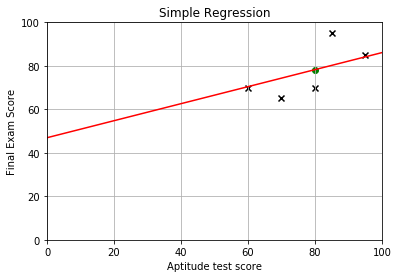

*** Iteration  30000  improvement 0.0004469920094720692  updatedRss:  375.0886503171732 
  B0:  46.95531278894521  B1:  0.391248745430903 



[375.08865504 375.08864559]
[375.08865029 375.08865041]
[375.08820806 375.0881986 ]
[375.0882033  375.08820342]
[375.08776107 375.08775162]
[375.08775632 375.08775644]
[375.08731409 375.08730464]
[375.08730934 375.08730946]
[375.08686712 375.08685766]
[375.08686236 375.08686248]
[375.08642015 375.08641069]
[375.08641539 375.08641551]
[375.08597318 375.08596373]
[375.08596843 375.08596854]
[375.08552622 375.08551676]
[375.08552146 375.08552158]
[375.08507926 375.0850698 ]
[375.0850745  375.08507462]
[375.0846323  375.08462285]
[375.08462755 375.08462767]
[375.08418535 375.0841759 ]
[375.0841806  375.08418072]
[375.08373841 375.08372895]
[375.08373365 375.08373377]
[375.08329147 375.08328201]
[375.08328671 375.08328683]
[375.08284453 375.08283508]
[375.08283977 375.08283989]
[375.0823976  375.08238814]
[375.08239284 375.08239296]
[375.08195067 375.

[374.89550061 374.89549117]
[374.89549586 374.89549598]
[374.89505543 374.89504599]
[374.89505068 374.8950508 ]
[374.89461026 374.89460082]
[374.89460551 374.89460563]
[374.89416509 374.89415565]
[374.89416034 374.89416046]
[374.89371992 374.89371049]
[374.89371518 374.89371529]
[374.89327476 374.89326533]
[374.89327002 374.89327013]
[374.8928296  374.89282017]
[374.89282486 374.89282498]
[374.89238445 374.89237502]
[374.89237971 374.89237982]
[374.8919393  374.89192987]
[374.89193456 374.89193468]
[374.89149416 374.89148472]
[374.89148941 374.89148953]
[374.89104902 374.89103958]
[374.89104427 374.89104439]
[374.89060388 374.89059445]
[374.89059914 374.89059926]
[374.89015875 374.89014932]
[374.89015401 374.89015412]
[374.88971362 374.88970419]
[374.88970888 374.889709  ]
[374.8892685  374.88925907]
[374.88926376 374.88926387]
[374.88882338 374.88881395]
[374.88881864 374.88881875]
[374.88837827 374.88836883]
[374.88837352 374.88837364]
[374.88793316 374.88792372]
[374.88792841 374.88

[374.73106943 374.73106002]
[374.7310647  374.73106481]
[374.7306258  374.73061638]
[374.73062106 374.73062118]
[374.73018217 374.73017275]
[374.73017743 374.73017755]
[374.72973854 374.72972912]
[374.7297338  374.72973392]
[374.72929491 374.72928549]
[374.72929018 374.72929029]
[374.72885129 374.72884188]
[374.72884656 374.72884667]
[374.72840768 374.72839826]
[374.72840294 374.72840306]
[374.72796407 374.72795465]
[374.72795933 374.72795945]
[374.72752046 374.72751104]
[374.72751572 374.72751584]
[374.72707686 374.72706744]
[374.72707212 374.72707224]
[374.72663326 374.72662384]
[374.72662852 374.72662864]
[374.72618966 374.72618024]
[374.72618493 374.72618504]
[374.72574607 374.72573665]
[374.72574133 374.72574145]
[374.72530249 374.72529307]
[374.72529775 374.72529787]
[374.7248589  374.72484948]
[374.72485417 374.72485428]
[374.72441532 374.72440591]
[374.72441059 374.72441071]
[374.72397175 374.72396233]
[374.72396701 374.72396713]
[374.72352818 374.72351876]
[374.72352344 374.72

[374.54245624 374.54244684]
[374.54245152 374.54245163]
[374.54201437 374.54200497]
[374.54200965 374.54200976]
[374.54157251 374.54156311]
[374.54156778 374.5415679 ]
[374.54113065 374.54112125]
[374.54112592 374.54112604]
[374.54068879 374.54067939]
[374.54068407 374.54068418]
[374.54024694 374.54023754]
[374.54024221 374.54024233]
[374.53980509 374.53979569]
[374.53980037 374.53980048]
[374.53936325 374.53935385]
[374.53935852 374.53935864]
[374.53892141 374.53891201]
[374.53891668 374.5389168 ]
[374.53847957 374.53847018]
[374.53847485 374.53847497]
[374.53803774 374.53802834]
[374.53803302 374.53803313]
[374.53759592 374.53758652]
[374.53759119 374.53759131]
[374.53715409 374.53714469]
[374.53714937 374.53714948]
[374.53671227 374.53670288]
[374.53670755 374.53670766]
[374.53627046 374.53626106]
[374.53626573 374.53626585]
[374.53582865 374.53581925]
[374.53582392 374.53582404]
[374.53538684 374.53537744]
[374.53538212 374.53538223]
[374.53494504 374.53493564]
[374.53494031 374.53

[374.36427804 374.36426866]
[374.36427333 374.36427344]
[374.36383785 374.36382846]
[374.36383313 374.36383324]
[374.36339765 374.36338827]
[374.36339293 374.36339305]
[374.36295746 374.36294808]
[374.36295274 374.36295286]
[374.36251727 374.36250789]
[374.36251256 374.36251267]
[374.36207709 374.36206771]
[374.36207237 374.36207249]
[374.36163691 374.36162753]
[374.3616322  374.36163231]
[374.36119674 374.36118736]
[374.36119202 374.36119214]
[374.36075657 374.36074719]
[374.36075185 374.36075197]
[374.36031641 374.36030702]
[374.36031169 374.3603118 ]
[374.35987624 374.35986686]
[374.35987153 374.35987164]
[374.35943609 374.35942671]
[374.35943137 374.35943149]
[374.35899593 374.35898655]
[374.35899122 374.35899133]
[374.35855578 374.3585464 ]
[374.35855107 374.35855118]
[374.35811564 374.35810626]
[374.35811092 374.35811104]
[374.3576755  374.35766612]
[374.35767078 374.3576709 ]
[374.35723536 374.35722598]
[374.35723064 374.35723076]
[374.35679523 374.35678585]
[374.35679051 374.35

[374.18019094 374.18019106]
[374.17975718 374.17974781]
[374.17975247 374.17975259]
[374.17931871 374.17930934]
[374.179314   374.17931412]
[374.17888024 374.17887088]
[374.17887553 374.17887565]
[374.17844178 374.17843242]
[374.17843707 374.17843719]
[374.17800333 374.17799396]
[374.17799862 374.17799873]
[374.17756487 374.17755551]
[374.17756016 374.17756028]
[374.17712642 374.17711706]
[374.17712172 374.17712183]
[374.17668798 374.17667862]
[374.17668327 374.17668339]
[374.17624954 374.17624018]
[374.17624483 374.17624495]
[374.1758111  374.17580174]
[374.17580639 374.17580651]
[374.17537267 374.17536331]
[374.17536796 374.17536808]
[374.17493424 374.17492488]
[374.17492953 374.17492965]
[374.17449582 374.17448646]
[374.17449111 374.17449123]
[374.1740574  374.17404804]
[374.17405269 374.17405281]
[374.17361898 374.17360962]
[374.17361427 374.17361439]
[374.17318057 374.17317121]
[374.17317586 374.17317598]
[374.17274216 374.1727328 ]
[374.17273745 374.17273757]
[374.17230376 374.17

[373.98111416 373.98110481]
[373.98110946 373.98110957]
[373.98067755 373.98066821]
[373.98067285 373.98067297]
[373.98024095 373.9802316 ]
[373.98023625 373.98023636]
[373.97980435 373.979795  ]
[373.97979965 373.97979976]
[373.97936775 373.97935841]
[373.97936305 373.97936317]
[373.97893116 373.97892182]
[373.97892646 373.97892658]
[373.97849457 373.97848523]
[373.97848987 373.97848999]
[373.97805799 373.97804865]
[373.97805329 373.97805341]
[373.97762141 373.97761207]
[373.97761671 373.97761683]
[373.97718484 373.97717549]
[373.97718014 373.97718026]
[373.97674827 373.97673892]
[373.97674357 373.97674369]
[373.9763117  373.97630236]
[373.976307   373.97630712]
[373.97587514 373.97586579]
[373.97587044 373.97587056]
[373.97543858 373.97542924]
[373.97543388 373.975434  ]
[373.97500203 373.97499268]
[373.97499733 373.97499744]
[373.97456548 373.97455613]
[373.97456078 373.97456089]
[373.97412893 373.97411959]
[373.97412423 373.97412435]
[373.97369239 373.97368304]
[373.97368769 373.97

[373.80375261 373.80374328]
[373.80374792 373.80374803]
[373.80331766 373.80330834]
[373.80331297 373.80331309]
[373.80288272 373.8028734 ]
[373.80287803 373.80287815]
[373.80244778 373.80243846]
[373.80244309 373.80244321]
[373.80201285 373.80200353]
[373.80200816 373.80200828]
[373.80157792 373.8015686 ]
[373.80157323 373.80157335]
[373.801143   373.80113367]
[373.80113831 373.80113842]
[373.80070808 373.80069875]
[373.80070339 373.8007035 ]
[373.80027316 373.80026383]
[373.80026847 373.80026859]
[373.79983825 373.79982892]
[373.79983356 373.79983367]
[373.79940334 373.79939401]
[373.79939865 373.79939877]
[373.79896844 373.79895911]
[373.79896375 373.79896386]
[373.79853354 373.79852421]
[373.79852885 373.79852896]
[373.79809864 373.79808931]
[373.79809395 373.79809407]
[373.79766375 373.79765442]
[373.79765906 373.79765917]
[373.79722886 373.79721953]
[373.79722417 373.79722429]
[373.79679397 373.79678465]
[373.79678928 373.7967894 ]
[373.7963591  373.79634977]
[373.79635441 373.79

[373.63572829 373.63572841]
[373.6352996  373.63529029]
[373.63529492 373.63529504]
[373.63486623 373.63485693]
[373.63486155 373.63486167]
[373.63443287 373.63442356]
[373.63442819 373.63442831]
[373.63399951 373.63399021]
[373.63399483 373.63399495]
[373.63356616 373.63355685]
[373.63356148 373.6335616 ]
[373.63313281 373.6331235 ]
[373.63312813 373.63312825]
[373.63269946 373.63269016]
[373.63269478 373.6326949 ]
[373.63226612 373.63225681]
[373.63226144 373.63226156]
[373.63183278 373.63182348]
[373.6318281  373.63182822]
[373.63139945 373.63139014]
[373.63139477 373.63139489]
[373.63096612 373.63095681]
[373.63096144 373.63096156]
[373.6305328  373.63052349]
[373.63052811 373.63052823]
[373.63009947 373.63009017]
[373.63009479 373.63009491]
[373.62966616 373.62965685]
[373.62966148 373.62966159]
[373.62923284 373.62922353]
[373.62922816 373.62922828]
[373.62879953 373.62879023]
[373.62879485 373.62879497]
[373.62836623 373.62835692]
[373.62836155 373.62836166]
[373.62793293 373.62

[373.43680614 373.43680625]
[373.4363793  373.43637002]
[373.43637463 373.43637475]
[373.4359478  373.43593851]
[373.43594313 373.43594325]
[373.4355163  373.43550702]
[373.43551163 373.43551175]
[373.43508481 373.43507552]
[373.43508014 373.43508026]
[373.43465332 373.43464403]
[373.43464865 373.43464877]
[373.43422184 373.43421255]
[373.43421716 373.43421728]
[373.43379035 373.43378106]
[373.43378568 373.4337858 ]
[373.43335888 373.43334959]
[373.4333542  373.43335432]
[373.4329274  373.43291811]
[373.43292273 373.43292285]
[373.43249593 373.43248664]
[373.43249126 373.43249138]
[373.43206447 373.43205518]
[373.4320598  373.43205991]
[373.43163301 373.43162372]
[373.43162833 373.43162845]
[373.43120155 373.43119226]
[373.43119688 373.43119699]
[373.4307701  373.43076081]
[373.43076542 373.43076554]
[373.43033865 373.43032936]
[373.43033397 373.43033409]
[373.4299072  373.42989791]
[373.42990253 373.42990265]
[373.42947576 373.42946647]
[373.42947109 373.4294712 ]
[373.42904432 373.42

[373.24991673 373.24990746]
[373.24991207 373.24991219]
[373.24948698 373.24947771]
[373.24948232 373.24948243]
[373.24905723 373.24904796]
[373.24905257 373.24905268]
[373.24862748 373.24861821]
[373.24862282 373.24862294]
[373.24819774 373.24818847]
[373.24819308 373.24819319]
[373.247768   373.24775873]
[373.24776334 373.24776346]
[373.24733827 373.247329  ]
[373.2473336  373.24733372]
[373.24690854 373.24689927]
[373.24690387 373.24690399]
[373.24647881 373.24646954]
[373.24647415 373.24647426]
[373.24604909 373.24603982]
[373.24604443 373.24604454]
[373.24561937 373.2456101 ]
[373.24561471 373.24561482]
[373.24518966 373.24518039]
[373.24518499 373.24518511]
[373.24475995 373.24475068]
[373.24475528 373.2447554 ]
[373.24433024 373.24432097]
[373.24432558 373.24432569]
[373.24390054 373.24389127]
[373.24389588 373.24389599]
[373.24347084 373.24346157]
[373.24346618 373.2434663 ]
[373.24304115 373.24303188]
[373.24303649 373.2430366 ]
[373.24261146 373.24260219]
[373.2426068  373.24

[373.07191428 373.07190503]
[373.07190963 373.07190975]
[373.0714862  373.07147694]
[373.07148154 373.07148166]
[373.07105811 373.07104886]
[373.07105346 373.07105358]
[373.07063004 373.07062078]
[373.07062538 373.0706255 ]
[373.07020196 373.07019271]
[373.07019731 373.07019743]
[373.06977389 373.06976464]
[373.06976924 373.06976936]
[373.06934583 373.06933658]
[373.06934117 373.06934129]
[373.06891777 373.06890851]
[373.06891311 373.06891323]
[373.06848971 373.06848046]
[373.06848505 373.06848517]
[373.06806165 373.0680524 ]
[373.068057   373.06805712]
[373.0676336  373.06762435]
[373.06762895 373.06762907]
[373.06720556 373.06719631]
[373.06720091 373.06720102]
[373.06677752 373.06676826]
[373.06677286 373.06677298]
[373.06634948 373.06634023]
[373.06634483 373.06634494]
[373.06592144 373.06591219]
[373.06591679 373.06591691]
[373.06549341 373.06548416]
[373.06548876 373.06548888]
[373.06506539 373.06505614]
[373.06506074 373.06506085]
[373.06463737 373.06462812]
[373.06463271 373.06

[372.8839388  372.88393892]
[372.88351712 372.88350789]
[372.88351248 372.88351259]
[372.8830908  372.88308157]
[372.88308616 372.88308627]
[372.88266448 372.88265525]
[372.88265984 372.88265996]
[372.88223817 372.88222894]
[372.88223353 372.88223365]
[372.88181186 372.88180263]
[372.88180722 372.88180734]
[372.88138556 372.88137633]
[372.88138092 372.88138103]
[372.88095926 372.88095003]
[372.88095462 372.88095473]
[372.88053296 372.88052373]
[372.88052832 372.88052844]
[372.88010667 372.88009744]
[372.88010203 372.88010214]
[372.87968038 372.87967115]
[372.87967574 372.87967586]
[372.8792541  372.87924487]
[372.87924946 372.87924957]
[372.87882782 372.87881859]
[372.87882318 372.87882329]
[372.87840154 372.87839231]
[372.8783969  372.87839702]
[372.87797527 372.87796604]
[372.87797063 372.87797074]
[372.877549   372.87753977]
[372.87754436 372.87754447]
[372.87712274 372.87711351]
[372.8771181  372.87711821]
[372.87669648 372.87668725]
[372.87669183 372.87669195]
[372.87627022 372.87

[372.69080258 372.69079336]
[372.69079794 372.69079806]
[372.69037806 372.69036885]
[372.69037343 372.69037354]
[372.68995355 372.68994434]
[372.68994892 372.68994903]
[372.68952905 372.68951983]
[372.68952441 372.68952453]
[372.68910454 372.68909533]
[372.68909991 372.68910003]
[372.68868005 372.68867083]
[372.68867541 372.68867553]
[372.68825555 372.68824634]
[372.68825092 372.68825103]
[372.68783106 372.68782185]
[372.68782643 372.68782654]
[372.68740658 372.68739736]
[372.68740194 372.68740206]
[372.68698209 372.68697288]
[372.68697746 372.68697758]
[372.68655762 372.6865484 ]
[372.68655298 372.6865531 ]
[372.68613314 372.68612393]
[372.68612851 372.68612862]
[372.68570867 372.68569946]
[372.68570404 372.68570415]
[372.6852842  372.68527499]
[372.68527957 372.68527969]
[372.68485974 372.68485053]
[372.68485511 372.68485522]
[372.68443528 372.68442607]
[372.68443065 372.68443077]
[372.68401083 372.68400162]
[372.6840062  372.68400631]
[372.68358638 372.68357717]
[372.68358175 372.68

[372.50101815 372.50100896]
[372.50101353 372.50101364]
[372.50059542 372.50058622]
[372.50059079 372.50059091]
[372.50017269 372.50016349]
[372.50016806 372.50016818]
[372.49974996 372.49974077]
[372.49974534 372.49974545]
[372.49932724 372.49931804]
[372.49932261 372.49932273]
[372.49890452 372.49889532]
[372.49889989 372.49890001]
[372.4984818  372.49847261]
[372.49847718 372.49847729]
[372.49805909 372.4980499 ]
[372.49805447 372.49805458]
[372.49763638 372.49762719]
[372.49763176 372.49763187]
[372.49721368 372.49720448]
[372.49720906 372.49720917]
[372.49679098 372.49678179]
[372.49678636 372.49678647]
[372.49636828 372.49635909]
[372.49636366 372.49636378]
[372.49594559 372.4959364 ]
[372.49594097 372.49594108]
[372.4955229  372.49551371]
[372.49551828 372.4955184 ]
[372.49510022 372.49509103]
[372.4950956  372.49509571]
[372.49467754 372.49466835]
[372.49467292 372.49467303]
[372.49425487 372.49424567]
[372.49425024 372.49425036]
[372.49383219 372.493823  ]
[372.49382757 372.49

[372.3528812  372.35287202]
[372.35287659 372.3528767 ]
[372.35245986 372.35245068]
[372.35245524 372.35245535]
[372.35203851 372.35202933]
[372.3520339  372.35203401]
[372.35161717 372.351608  ]
[372.35161256 372.35161267]
[372.35119584 372.35118666]
[372.35119122 372.35119134]
[372.35077451 372.35076533]
[372.35076989 372.35077001]
[372.35035318 372.350344  ]
[372.35034857 372.35034868]
[372.34993186 372.34992268]
[372.34992724 372.34992736]
[372.34951054 372.34950136]
[372.34950592 372.34950604]
[372.34908922 372.34908004]
[372.34908461 372.34908472]
[372.34866791 372.34865873]
[372.3486633  372.34866341]
[372.34824661 372.34823743]
[372.34824199 372.3482421 ]
[372.3478253  372.34781612]
[372.34782069 372.3478208 ]
[372.347404   372.34739482]
[372.34739939 372.3473995 ]
[372.34698271 372.34697353]
[372.34697809 372.34697821]
[372.34656142 372.34655224]
[372.3465568  372.34655691]
[372.34614013 372.34613095]
[372.34613551 372.34613563]
[372.34571884 372.34570967]
[372.34571423 372.34

[372.23043577 372.2304266 ]
[372.23043116 372.23043127]
[372.23001557 372.2300064 ]
[372.23001096 372.23001107]
[372.22959537 372.22958621]
[372.22959076 372.22959088]
[372.22917518 372.22916602]
[372.22917057 372.22917069]
[372.22875499 372.22874583]
[372.22875039 372.2287505 ]
[372.22833481 372.22832564]
[372.2283302  372.22833032]
[372.22791463 372.22790547]
[372.22791002 372.22791014]
[372.22749446 372.22748529]
[372.22748985 372.22748996]
[372.22707428 372.22706512]
[372.22706968 372.22706979]
[372.22665412 372.22664495]
[372.22664951 372.22664962]
[372.22623395 372.22622479]
[372.22622934 372.22622946]
[372.22581379 372.22580463]
[372.22580918 372.2258093 ]
[372.22539364 372.22538447]
[372.22538903 372.22538914]
[372.22497349 372.22496432]
[372.22496888 372.22496899]
[372.22455334 372.22454417]
[372.22454873 372.22454884]
[372.22413319 372.22412403]
[372.22412858 372.2241287 ]
[372.22371305 372.22370389]
[372.22370844 372.22370856]
[372.22329292 372.22328375]
[372.22328831 372.22

[372.09156471 372.09155556]
[372.09156011 372.09156023]
[372.09114582 372.09113666]
[372.09114121 372.09114133]
[372.09072692 372.09071777]
[372.09072232 372.09072243]
[372.09030803 372.09029888]
[372.09030343 372.09030354]
[372.08988915 372.08987999]
[372.08988454 372.08988466]
[372.08947026 372.08946111]
[372.08946566 372.08946578]
[372.08905139 372.08904223]
[372.08904678 372.0890469 ]
[372.08863251 372.08862336]
[372.08862791 372.08862802]
[372.08821364 372.08820449]
[372.08820904 372.08820915]
[372.08779478 372.08778562]
[372.08779017 372.08779029]
[372.08737591 372.08736676]
[372.08737131 372.08737143]
[372.08695706 372.0869479 ]
[372.08695245 372.08695257]
[372.0865382  372.08652905]
[372.0865336  372.08653371]
[372.08611935 372.0861102 ]
[372.08611475 372.08611486]
[372.0857005  372.08569135]
[372.0856959  372.08569602]
[372.08528166 372.08527251]
[372.08527706 372.08527717]
[372.08486282 372.08485367]
[372.08485822 372.08485834]
[372.08444399 372.08443484]
[372.08443939 372.08

[371.9284921  371.92848297]
[371.92848751 371.92848763]
[371.92807474 371.9280656 ]
[371.92807014 371.92807026]
[371.92765737 371.92764823]
[371.92765278 371.92765289]
[371.92724001 371.92723087]
[371.92723542 371.92723553]
[371.92682265 371.92681352]
[371.92681806 371.92681817]
[371.9264053  371.92639616]
[371.9264007  371.92640082]
[371.92598795 371.92597881]
[371.92598335 371.92598347]
[371.9255706  371.92556147]
[371.92556601 371.92556612]
[371.92515326 371.92514413]
[371.92514867 371.92514878]
[371.92473592 371.92472679]
[371.92473133 371.92473144]
[371.92431859 371.92430945]
[371.924314   371.92431411]
[371.92390126 371.92389212]
[371.92389667 371.92389678]
[371.92348393 371.9234748 ]
[371.92347934 371.92347945]
[371.92306661 371.92305748]
[371.92306202 371.92306213]
[371.92264929 371.92264016]
[371.9226447  371.92264481]
[371.92223198 371.92222284]
[371.92222738 371.9222275 ]
[371.92181467 371.92180553]
[371.92181007 371.92181019]
[371.92139736 371.92138823]
[371.92139277 371.92

[371.74605826 371.74604914]
[371.74605367 371.74605379]
[371.7456426  371.74563348]
[371.74563801 371.74563813]
[371.74522694 371.74521782]
[371.74522236 371.74522247]
[371.74481129 371.74480217]
[371.74480671 371.74480682]
[371.74439564 371.74438653]
[371.74439106 371.74439117]
[371.74398    371.74397088]
[371.74397541 371.74397553]
[371.74356436 371.74355524]
[371.74355977 371.74355989]
[371.74314872 371.74313961]
[371.74314414 371.74314425]
[371.74273309 371.74272397]
[371.74272851 371.74272862]
[371.74231746 371.74230835]
[371.74231288 371.74231299]
[371.74190184 371.74189272]
[371.74189725 371.74189737]
[371.74148622 371.7414771 ]
[371.74148163 371.74148175]
[371.7410706  371.74106148]
[371.74106602 371.74106613]
[371.74065499 371.74064587]
[371.7406504  371.74065052]
[371.74023938 371.74023026]
[371.7402348  371.74023491]
[371.73982378 371.73981466]
[371.73981919 371.73981931]
[371.73940817 371.73939906]
[371.73940359 371.7394037 ]
[371.73899258 371.73898346]
[371.73898799 371.73

[371.56519972 371.56519062]
[371.56519515 371.56519526]
[371.56478576 371.56477666]
[371.56478118 371.5647813 ]
[371.5643718 371.5643627]
[371.56436722 371.56436733]
[371.56395784 371.56394874]
[371.56395326 371.56395338]
[371.56354389 371.56353479]
[371.56353931 371.56353943]
[371.56312994 371.56312084]
[371.56312536 371.56312548]
[371.56271599 371.5627069 ]
[371.56271142 371.56271153]
[371.56230205 371.56229295]
[371.56229748 371.56229759]
[371.56188812 371.56187902]
[371.56188354 371.56188365]
[371.56147418 371.56146508]
[371.56146961 371.56146972]
[371.56106025 371.56105115]
[371.56105568 371.56105579]
[371.56064633 371.56063723]
[371.56064175 371.56064187]
[371.56023241 371.56022331]
[371.56022783 371.56022794]
[371.55981849 371.55980939]
[371.55981391 371.55981403]
[371.55940457 371.55939548]
[371.5594     371.55940011]
[371.55899066 371.55898157]
[371.55898609 371.5589862 ]
[371.55857676 371.55856766]
[371.55857218 371.5585723 ]
[371.55816286 371.55815376]
[371.55815828 371.5581

[371.41559333 371.41559344]
[371.41518533 371.41517625]
[371.41518077 371.41518088]
[371.41477278 371.41476369]
[371.41476821 371.41476832]
[371.41436022 371.41435114]
[371.41435565 371.41435577]
[371.41394767 371.41393859]
[371.4139431  371.41394322]
[371.41353512 371.41352604]
[371.41353056 371.41353067]
[371.41312258 371.4131135 ]
[371.41311801 371.41311813]
[371.41271004 371.41270096]
[371.41270548 371.41270559]
[371.41229751 371.41228842]
[371.41229294 371.41229305]
[371.41188498 371.41187589]
[371.41188041 371.41188052]
[371.41147245 371.41146337]
[371.41146788 371.411468  ]
[371.41105993 371.41105084]
[371.41105536 371.41105547]
[371.41064741 371.41063832]
[371.41064284 371.41064295]
[371.41023489 371.41022581]
[371.41023032 371.41023044]
[371.40982238 371.4098133 ]
[371.40981781 371.40981793]
[371.40940987 371.40940079]
[371.4094053  371.40940542]
[371.40899737 371.40898828]
[371.4089928  371.40899291]
[371.40858487 371.40857578]
[371.4085803  371.40858041]
[371.40817237 371.40

[371.22869176 371.2286827 ]
[371.22868721 371.22868732]
[371.22828095 371.22827189]
[371.2282764  371.22827651]
[371.22787015 371.22786108]
[371.22786559 371.2278657 ]
[371.22745934 371.22745028]
[371.22745479 371.2274549 ]
[371.22704855 371.22703948]
[371.22704399 371.2270441 ]
[371.22663775 371.22662869]
[371.22663319 371.22663331]
[371.22622696 371.2262179 ]
[371.2262224  371.22622252]
[371.22581617 371.22580711]
[371.22581162 371.22581173]
[371.22540539 371.22539633]
[371.22540083 371.22540095]
[371.22499461 371.22498555]
[371.22499005 371.22499017]
[371.22458383 371.22457477]
[371.22457928 371.22457939]
[371.22417306 371.224164  ]
[371.22416851 371.22416862]
[371.22376229 371.22375323]
[371.22375774 371.22375785]
[371.22335153 371.22334247]
[371.22334697 371.22334709]
[371.22294077 371.22293171]
[371.22293621 371.22293633]
[371.22253001 371.22252095]
[371.22252546 371.22252557]
[371.22211926 371.2221102 ]
[371.2221147  371.22211482]
[371.22170851 371.22169945]
[371.22170396 371.22

[371.09538093 371.09537188]
[371.09537638 371.09537649]
[371.09497136 371.09496232]
[371.09496681 371.09496693]
[371.09456181 371.09455276]
[371.09455726 371.09455737]
[371.09415225 371.09414321]
[371.0941477  371.09414782]
[371.09374271 371.09373366]
[371.09373816 371.09373827]
[371.09333316 371.09332411]
[371.09332861 371.09332872]
[371.09292362 371.09291457]
[371.09291907 371.09291918]
[371.09251408 371.09250503]
[371.09250953 371.09250964]
[371.09210455 371.0920955 ]
[371.0921     371.09210011]
[371.09169502 371.09168597]
[371.09169047 371.09169058]
[371.09128549 371.09127644]
[371.09128094 371.09128105]
[371.09087597 371.09086692]
[371.09087142 371.09087153]
[371.09046645 371.0904574 ]
[371.0904619  371.09046201]
[371.09005693 371.09004788]
[371.09005238 371.0900525 ]
[371.08964742 371.08963837]
[371.08964287 371.08964299]
[371.08923792 371.08922887]
[371.08923337 371.08923348]
[371.08882841 371.08881936]
[371.08882386 371.08882398]
[371.08841891 371.08840986]
[371.08841436 371.08

[370.93063845 370.93062942]
[370.93063391 370.93063402]
[370.93023043 370.9302214 ]
[370.93022589 370.930226  ]
[370.92982242 370.92981339]
[370.92981788 370.92981799]
[370.92941441 370.92940538]
[370.92940987 370.92940998]
[370.9290064  370.92899737]
[370.92900186 370.92900198]
[370.9285984  370.92858937]
[370.92859386 370.92859397]
[370.92819041 370.92818137]
[370.92818586 370.92818598]
[370.92778241 370.92777338]
[370.92777787 370.92777798]
[370.92737442 370.92736539]
[370.92736988 370.92736999]
[370.92696644 370.9269574 ]
[370.92696189 370.92696201]
[370.92655845 370.92654942]
[370.92655391 370.92655402]
[370.92615047 370.92614144]
[370.92614593 370.92614605]
[370.9257425  370.92573347]
[370.92573796 370.92573807]
[370.92533453 370.9253255 ]
[370.92532999 370.9253301 ]
[370.92492656 370.92491753]
[370.92492202 370.92492213]
[370.9245186  370.92450957]
[370.92451406 370.92451417]
[370.92411064 370.92410161]
[370.9241061  370.92410621]
[370.92370268 370.92369365]
[370.92369814 370.92

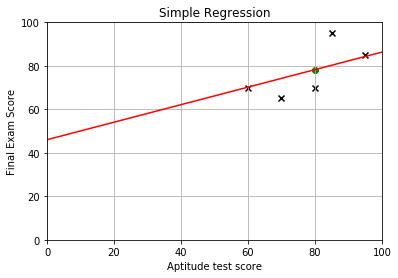

*** Iteration  40000  improvement 0.0004070008344569942  updatedRss:  370.82182913603026 
  B0:  46.03169145344964  B1:  0.40281258734437414 



[370.82183365 370.82182463]
[370.82182911 370.82182922]
[370.82142665 370.82141763]
[370.82142211 370.82142223]
[370.82101966 370.82101064]
[370.82101512 370.82101523]
[370.82061267 370.82060365]
[370.82060813 370.82060824]
[370.82020568 370.82019666]
[370.82020115 370.82020126]
[370.8197987  370.81978968]
[370.81979416 370.81979428]
[370.81939172 370.8193827 ]
[370.81938719 370.8193873 ]
[370.81898475 370.81897573]
[370.81898021 370.81898032]
[370.81857778 370.81856876]
[370.81857324 370.81857335]
[370.81817081 370.81816179]
[370.81816627 370.81816639]
[370.81776385 370.81775483]
[370.81775931 370.81775943]
[370.81735689 370.81734787]
[370.81735235 370.81735247]
[370.81694993 370.81694091]
[370.8169454  370.81694551]
[370.81654298 370.81653396]
[370.81653845 370.81653856]
[370.81613604 370.81612701]
[370.8161315  370.81613161]
[370.81572909 3

[370.63258572 370.63257672]
[370.63258119 370.63258131]
[370.6321805  370.63217149]
[370.63217597 370.63217608]
[370.63177528 370.63176628]
[370.63177075 370.63177086]
[370.63137006 370.63136106]
[370.63136554 370.63136565]
[370.63096485 370.63095585]
[370.63096032 370.63096044]
[370.63055964 370.63055064]
[370.63055512 370.63055523]
[370.63015444 370.63014544]
[370.63014991 370.63015002]
[370.62974924 370.62974023]
[370.62974471 370.62974482]
[370.62934404 370.62933504]
[370.62933951 370.62933963]
[370.62893885 370.62892985]
[370.62893432 370.62893443]
[370.62853366 370.62852466]
[370.62852913 370.62852924]
[370.62812847 370.62811947]
[370.62812395 370.62812406]
[370.62772329 370.62771429]
[370.62771876 370.62771888]
[370.62731811 370.62730911]
[370.62731359 370.6273137 ]
[370.62691294 370.62690394]
[370.62690841 370.62690853]
[370.62650777 370.62649877]
[370.62650324 370.62650336]
[370.6261026 370.6260936]
[370.62609808 370.62609819]
[370.62569744 370.62568844]
[370.62569291 370.6256

[370.46999169 370.4699827 ]
[370.46998717 370.46998728]
[370.46958799 370.469579  ]
[370.46958347 370.46958358]
[370.46918429 370.46917531]
[370.46917977 370.46917989]
[370.4687806  370.46877161]
[370.46877608 370.46877619]
[370.46837691 370.46836793]
[370.46837239 370.46837251]
[370.46797323 370.46796424]
[370.46796871 370.46796882]
[370.46756955 370.46756056]
[370.46756503 370.46756514]
[370.46716587 370.46715688]
[370.46716135 370.46716146]
[370.4667622  370.46675321]
[370.46675768 370.46675779]
[370.46635853 370.46634954]
[370.46635401 370.46635412]
[370.46595486 370.46594588]
[370.46595034 370.46595046]
[370.4655512  370.46554222]
[370.46554668 370.4655468 ]
[370.46514754 370.46513856]
[370.46514303 370.46514314]
[370.46474389 370.4647349 ]
[370.46473937 370.46473948]
[370.46434024 370.46433125]
[370.46433572 370.46433583]
[370.46393659 370.46392761]
[370.46393207 370.46393219]
[370.46353295 370.46352397]
[370.46352843 370.46352854]
[370.46312931 370.46312033]
[370.46312479 370.46

[370.3703928  370.37038382]
[370.37038829 370.3703884 ]
[370.36999003 370.36998106]
[370.36998552 370.36998563]
[370.36958727 370.3695783 ]
[370.36958276 370.36958287]
[370.36918451 370.36917554]
[370.36918    370.36918011]
[370.36878176 370.36877278]
[370.36877725 370.36877736]
[370.36837901 370.36837003]
[370.36837449 370.36837461]
[370.36797626 370.36796729]
[370.36797175 370.36797186]
[370.36757352 370.36756454]
[370.367569   370.36756912]
[370.36717078 370.3671618 ]
[370.36716626 370.36716638]
[370.36676804 370.36675907]
[370.36676353 370.36676364]
[370.36636531 370.36635634]
[370.3663608  370.36636091]
[370.36596258 370.36595361]
[370.36595807 370.36595818]
[370.36555986 370.36555088]
[370.36555534 370.36555546]
[370.36515714 370.36514816]
[370.36515262 370.36515274]
[370.36475442 370.36474545]
[370.36474991 370.36475002]
[370.36435171 370.36434273]
[370.36434719 370.36434731]
[370.363949   370.36394002]
[370.36394449 370.3639446 ]
[370.36354629 370.36353732]
[370.36354178 370.36

[370.19995813 370.19994917]
[370.19995363 370.19995374]
[370.19955696 370.199548  ]
[370.19955246 370.19955257]
[370.1991558  370.19914684]
[370.19915129 370.1991514 ]
[370.19875463 370.19874568]
[370.19875013 370.19875024]
[370.19835348 370.19834452]
[370.19834897 370.19834909]
[370.19795232 370.19794337]
[370.19794782 370.19794793]
[370.19755117 370.19754222]
[370.19754667 370.19754678]
[370.19715003 370.19714107]
[370.19714553 370.19714564]
[370.19674889 370.19673993]
[370.19674438 370.1967445 ]
[370.19634775 370.19633879]
[370.19634324 370.19634336]
[370.19594661 370.19593766]
[370.19594211 370.19594222]
[370.19554548 370.19553653]
[370.19554098 370.19554109]
[370.19514435 370.1951354 ]
[370.19513985 370.19513996]
[370.19474323 370.19473428]
[370.19473873 370.19473884]
[370.19434211 370.19433316]
[370.19433761 370.19433772]
[370.193941   370.19393204]
[370.19393649 370.19393661]
[370.19353988 370.19353093]
[370.19353538 370.19353549]
[370.19313878 370.19312982]
[370.19313427 370.19

[370.00703011 370.00702118]
[370.00702562 370.00702573]
[370.00663075 370.00662182]
[370.00662626 370.00662637]
[370.0062314  370.00622246]
[370.0062269  370.00622702]
[370.00583204 370.00582311]
[370.00582755 370.00582766]
[370.00543269 370.00542376]
[370.0054282  370.00542831]
[370.00503335 370.00502441]
[370.00502886 370.00502897]
[370.00463401 370.00462507]
[370.00462952 370.00462963]
[370.00423467 370.00422573]
[370.00423018 370.00423029]
[370.00383534 370.0038264 ]
[370.00383084 370.00383096]
[370.00343601 370.00342707]
[370.00343151 370.00343162]
[370.00303668 370.00302774]
[370.00303219 370.0030323 ]
[370.00263736 370.00262842]
[370.00263286 370.00263298]
[370.00223804 370.0022291 ]
[370.00223354 370.00223366]
[370.00183872 370.00182979]
[370.00183423 370.00183434]
[370.00143941 370.00143047]
[370.00143492 370.00143503]
[370.0010401  370.00103117]
[370.00103561 370.00103572]
[370.0006408  370.00063186]
[370.00063631 370.00063642]
[370.0002415  370.00023256]
[370.00023701 370.00

[369.83008175 369.83007283]
[369.83007726 369.83007738]
[369.82968405 369.82967513]
[369.82967956 369.82967967]
[369.82928635 369.82927743]
[369.82928186 369.82928198]
[369.82888865 369.82887974]
[369.82888417 369.82888428]
[369.82849096 369.82848205]
[369.82848648 369.82848659]
[369.82809328 369.82808436]
[369.82808879 369.8280889 ]
[369.82769559 369.82768668]
[369.82769111 369.82769122]
[369.82729791 369.827289  ]
[369.82729343 369.82729354]
[369.82690024 369.82689132]
[369.82689575 369.82689587]
[369.82650257 369.82649365]
[369.82649808 369.82649819]
[369.8261049  369.82609598]
[369.82610041 369.82610053]
[369.82570723 369.82569832]
[369.82570275 369.82570286]
[369.82530957 369.82530065]
[369.82530509 369.8253052 ]
[369.82491191 369.824903  ]
[369.82490743 369.82490754]
[369.82451426 369.82450534]
[369.82450978 369.82450989]
[369.82411661 369.82410769]
[369.82411213 369.82411224]
[369.82371897 369.82371005]
[369.82371448 369.82371459]
[369.82332132 369.82331241]
[369.82331684 369.82

[369.73077222 369.73076331]
[369.73076774 369.73076785]
[369.73037544 369.73036654]
[369.73037097 369.73037108]
[369.72997868 369.72996977]
[369.7299742  369.72997431]
[369.72958191 369.72957301]
[369.72957744 369.72957755]
[369.72918515 369.72917625]
[369.72918068 369.72918079]
[369.7287884  369.72877949]
[369.72878392 369.72878403]
[369.72839165 369.72838274]
[369.72838717 369.72838728]
[369.7279949  369.72798599]
[369.72799042 369.72799053]
[369.72759815 369.72758924]
[369.72759367 369.72759379]
[369.72720141 369.7271925 ]
[369.72719693 369.72719704]
[369.72680467 369.72679577]
[369.72680019 369.72680031]
[369.72640794 369.72639903]
[369.72640346 369.72640357]
[369.72601121 369.7260023 ]
[369.72600673 369.72600684]
[369.72561448 369.72560558]
[369.72561    369.72561012]
[369.72521776 369.72520885]
[369.72521328 369.72521339]
[369.72482104 369.72481213]
[369.72481656 369.72481667]
[369.72442433 369.72441542]
[369.72441985 369.72441996]
[369.72402761 369.72401871]
[369.72402314 369.72

[369.59885281 369.59884391]
[369.59884833 369.59884845]
[369.59845727 369.59844838]
[369.5984528  369.59845291]
[369.59806174 369.59805285]
[369.59805727 369.59805738]
[369.59766621 369.59765732]
[369.59766174 369.59766185]
[369.59727069 369.5972618 ]
[369.59726622 369.59726633]
[369.59687517 369.59686628]
[369.5968707  369.59687081]
[369.59647965 369.59647076]
[369.59647518 369.59647529]
[369.59608414 369.59607525]
[369.59607967 369.59607978]
[369.59568863 369.59567974]
[369.59568416 369.59568427]
[369.59529313 369.59528423]
[369.59528866 369.59528877]
[369.59489763 369.59488873]
[369.59489315 369.59489327]
[369.59450213 369.59449324]
[369.59449766 369.59449777]
[369.59410663 369.59409774]
[369.59410216 369.59410227]
[369.59371114 369.59370225]
[369.59370667 369.59370678]
[369.59331566 369.59330676]
[369.59331119 369.5933113 ]
[369.59292018 369.59291128]
[369.5929157  369.59291582]
[369.5925247 369.5925158]
[369.59252023 369.59252034]
[369.59212922 369.59212033]
[369.59212475 369.5921

[369.40548429 369.40547542]
[369.40547983 369.40547994]
[369.40509057 369.40508169]
[369.40508611 369.40508622]
[369.40469685 369.40468798]
[369.40469239 369.4046925 ]
[369.40430313 369.40429426]
[369.40429867 369.40429878]
[369.40390942 369.40390055]
[369.40390496 369.40390507]
[369.40351571 369.40350684]
[369.40351125 369.40351136]
[369.40312201 369.40311314]
[369.40311755 369.40311766]
[369.40272831 369.40271944]
[369.40272385 369.40272396]
[369.40233461 369.40232574]
[369.40233015 369.40233026]
[369.40194092 369.40193205]
[369.40193646 369.40193657]
[369.40154723 369.40153836]
[369.40154277 369.40154288]
[369.40115355 369.40114467]
[369.40114909 369.4011492 ]
[369.40075987 369.40075099]
[369.4007554  369.40075552]
[369.40036619 369.40035731]
[369.40036173 369.40036184]
[369.39997251 369.39996364]
[369.39996805 369.39996816]
[369.39957884 369.39956997]
[369.39957438 369.39957449]
[369.39918518 369.3991763 ]
[369.39918071 369.39918083]
[369.39879151 369.39878264]
[369.39878705 369.39

[369.26084339 369.26083453]
[369.26083894 369.26083905]
[369.26045102 369.26044216]
[369.26044657 369.26044668]
[369.26005866 369.2600498 ]
[369.26005421 369.26005432]
[369.2596663  369.25965744]
[369.25966185 369.25966196]
[369.25927394 369.25926509]
[369.25926949 369.2592696 ]
[369.25888159 369.25887273]
[369.25887714 369.25887725]
[369.25848924 369.25848039]
[369.25848479 369.2584849 ]
[369.2580969  369.25808804]
[369.25809245 369.25809256]
[369.25770456 369.2576957 ]
[369.25770011 369.25770022]
[369.25731222 369.25730336]
[369.25730777 369.25730788]
[369.25691989 369.25691103]
[369.25691544 369.25691555]
[369.25652756 369.2565187 ]
[369.25652311 369.25652322]
[369.25613523 369.25612637]
[369.25613078 369.25613089]
[369.25574291 369.25573405]
[369.25573846 369.25573857]
[369.25535059 369.25534173]
[369.25534614 369.25534625]
[369.25495828 369.25494942]
[369.25495382 369.25495393]
[369.25456596 369.25455711]
[369.25456151 369.25456162]
[369.25417366 369.2541648 ]
[369.2541692  369.25

[369.12021982 369.12021097]
[369.12021537 369.12021548]
[369.11982877 369.11981992]
[369.11982432 369.11982443]
[369.11943772 369.11942888]
[369.11943328 369.11943339]
[369.11904668 369.11903784]
[369.11904224 369.11904235]
[369.11865564 369.1186468 ]
[369.1186512  369.11865131]
[369.11826461 369.11825577]
[369.11826016 369.11826027]
[369.11787358 369.11786474]
[369.11786913 369.11786924]
[369.11748255 369.11747371]
[369.11747811 369.11747822]
[369.11709153 369.11708269]
[369.11708708 369.11708719]
[369.11670051 369.11669167]
[369.11669606 369.11669618]
[369.11630949 369.11630065]
[369.11630505 369.11630516]
[369.11591848 369.11590964]
[369.11591404 369.11591415]
[369.11552747 369.11551863]
[369.11552303 369.11552314]
[369.11513647 369.11512763]
[369.11513202 369.11513213]
[369.11474547 369.11473663]
[369.11474102 369.11474113]
[369.11435447 369.11434563]
[369.11435003 369.11435014]
[369.11396348 369.11395464]
[369.11395903 369.11395914]
[369.11357249 369.11356365]
[369.11356804 369.11

[368.94500708 368.94499825]
[368.94500264 368.94500275]
[368.94461767 368.94460885]
[368.94461324 368.94461335]
[368.94422827 368.94421944]
[368.94422383 368.94422394]
[368.94383887 368.94383005]
[368.94383443 368.94383454]
[368.94344947 368.94344065]
[368.94344504 368.94344515]
[368.94306008 368.94305126]
[368.94305565 368.94305576]
[368.94267069 368.94266187]
[368.94266626 368.94266637]
[368.94228131 368.94227249]
[368.94227687 368.94227698]
[368.94189193 368.9418831 ]
[368.94188749 368.9418876 ]
[368.94150255 368.94149373]
[368.94149812 368.94149823]
[368.94111318 368.94110435]
[368.94110874 368.94110885]
[368.94072381 368.94071498]
[368.94071937 368.94071948]
[368.94033444 368.94032562]
[368.94033001 368.94033012]
[368.93994508 368.93993626]
[368.93994064 368.93994075]
[368.93955572 368.9395469 ]
[368.93955128 368.93955139]
[368.93916636 368.93915754]
[368.93916193 368.93916204]
[368.93877701 368.93876819]
[368.93877258 368.93877269]
[368.93838766 368.93837884]
[368.93838323 368.93

[368.75191679 368.7519169 ]
[368.75153362 368.75152482]
[368.75152919 368.7515293 ]
[368.75114603 368.75113722]
[368.7511416  368.75114171]
[368.75075844 368.75074963]
[368.75075401 368.75075412]
[368.75037085 368.75036205]
[368.75036643 368.75036654]
[368.74998327 368.74997447]
[368.74997884 368.74997895]
[368.74959569 368.74958689]
[368.74959126 368.74959138]
[368.74920812 368.74919931]
[368.74920369 368.7492038 ]
[368.74882054 368.74881174]
[368.74881612 368.74881623]
[368.74843298 368.74842417]
[368.74842855 368.74842866]
[368.74804541 368.74803661]
[368.74804099 368.7480411 ]
[368.74765785 368.74764905]
[368.74765343 368.74765354]
[368.7472703  368.74726149]
[368.74726587 368.74726598]
[368.74688274 368.74687394]
[368.74687832 368.74687843]
[368.74649519 368.74648639]
[368.74649077 368.74649088]
[368.74610765 368.74609884]
[368.74610322 368.74610333]
[368.7457201 368.7457113]
[368.74571568 368.74571579]
[368.74533257 368.74532376]
[368.74532814 368.74532825]
[368.74494503 368.7449

[368.61957473 368.61956594]
[368.61957031 368.61957042]
[368.61918837 368.61917958]
[368.61918395 368.61918406]
[368.61880202 368.61879323]
[368.6187976  368.61879771]
[368.61841567 368.61840688]
[368.61841125 368.61841136]
[368.61802932 368.61802053]
[368.6180249  368.61802501]
[368.61764298 368.61763419]
[368.61763856 368.61763867]
[368.61725664 368.61724785]
[368.61725222 368.61725233]
[368.61687031 368.61686152]
[368.61686589 368.616866  ]
[368.61648398 368.61647519]
[368.61647956 368.61647967]
[368.61609765 368.61608886]
[368.61609323 368.61609334]
[368.61571132 368.61570254]
[368.61570691 368.61570702]
[368.615325   368.61531622]
[368.61532059 368.6153207 ]
[368.61493869 368.6149299 ]
[368.61493427 368.61493438]
[368.61455238 368.61454359]
[368.61454796 368.61454807]
[368.61416607 368.61415728]
[368.61416165 368.61416176]
[368.61377976 368.61377097]
[368.61377534 368.61377545]
[368.61339346 368.61338467]
[368.61338904 368.61338915]
[368.61300716 368.61299837]
[368.61300274 368.61

[368.47725481 368.47724603]
[368.4772504  368.47725051]
[368.47686979 368.47686101]
[368.47686538 368.47686549]
[368.47648477 368.47647599]
[368.47648036 368.47648047]
[368.47609975 368.47609098]
[368.47609534 368.47609545]
[368.47571474 368.47570597]
[368.47571033 368.47571044]
[368.47532973 368.47532096]
[368.47532532 368.47532543]
[368.47494473 368.47493595]
[368.47494032 368.47494043]
[368.47455973 368.47455095]
[368.47455532 368.47455543]
[368.47417473 368.47416596]
[368.47417032 368.47417043]
[368.47378974 368.47378096]
[368.47378533 368.47378544]
[368.47340475 368.47339597]
[368.47340034 368.47340045]
[368.47301976 368.47301099]
[368.47301535 368.47301546]
[368.47263478 368.472626  ]
[368.47263037 368.47263048]
[368.4722498  368.47224102]
[368.47224539 368.4722455 ]
[368.47186482 368.47185605]
[368.47186041 368.47186052]
[368.47147985 368.47147108]
[368.47147544 368.47147555]
[368.47109488 368.47108611]
[368.47109047 368.47109058]
[368.47070992 368.47070114]
[368.47070551 368.47

[368.30167502 368.30166626]
[368.30167061 368.30167072]
[368.30129164 368.30128288]
[368.30128724 368.30128735]
[368.30090827 368.30089951]
[368.30090386 368.30090397]
[368.3005249  368.30051614]
[368.30052049 368.3005206 ]
[368.30014153 368.30013277]
[368.30013713 368.30013724]
[368.29975817 368.29974941]
[368.29975377 368.29975388]
[368.29937481 368.29936605]
[368.29937041 368.29937052]
[368.29899145 368.2989827 ]
[368.29898705 368.29898716]
[368.2986081  368.29859935]
[368.2986037  368.29860381]
[368.29822475 368.298216  ]
[368.29822035 368.29822046]
[368.29784141 368.29783265]
[368.29783701 368.29783712]
[368.29745807 368.29744931]
[368.29745367 368.29745378]
[368.29707473 368.29706598]
[368.29707033 368.29707044]
[368.2966914  368.29668264]
[368.296687  368.2966871]
[368.29630807 368.29629931]
[368.29630367 368.29630377]
[368.29592474 368.29591598]
[368.29592034 368.29592045]
[368.29554142 368.29553266]
[368.29553702 368.29553713]
[368.2951581  368.29514934]
[368.2951537  368.2951

[368.20288282 368.20287408]
[368.20287843 368.20287853]
[368.20250037 368.20249163]
[368.20249597 368.20249608]
[368.20211792 368.20210918]
[368.20211353 368.20211364]
[368.20173548 368.20172673]
[368.20173108 368.20173119]
[368.20135304 368.20134429]
[368.20134864 368.20134875]
[368.2009706  368.20096186]
[368.20096621 368.20096632]
[368.20058817 368.20057942]
[368.20058377 368.20058388]
[368.20020574 368.200197  ]
[368.20020134 368.20020145]
[368.19982331 368.19981457]
[368.19981892 368.19981903]
[368.19944089 368.19943215]
[368.1994365  368.19943661]
[368.19905847 368.19904973]
[368.19905408 368.19905419]
[368.19867606 368.19866731]
[368.19867166 368.19867177]
[368.19829365 368.1982849 ]
[368.19828925 368.19828936]
[368.19791124 368.19790249]
[368.19790684 368.19790695]
[368.19752883 368.19752009]
[368.19752444 368.19752455]
[368.19714643 368.19713769]
[368.19714204 368.19714215]
[368.19676404 368.19675529]
[368.19675964 368.19675975]
[368.19638164 368.1963729 ]
[368.19637725 368.19

[368.05094581 368.05094592]
[368.05056917 368.05056044]
[368.05056478 368.05056489]
[368.05018815 368.05017942]
[368.05018376 368.05018387]
[368.04980713 368.0497984 ]
[368.04980274 368.04980285]
[368.04942611 368.04941738]
[368.04942172 368.04942183]
[368.0490451  368.04903637]
[368.04904071 368.04904082]
[368.04866409 368.04865536]
[368.0486597  368.04865981]
[368.04828309 368.04827436]
[368.0482787  368.04827881]
[368.04790208 368.04789335]
[368.0478977 368.0478978]
[368.04752108 368.04751236]
[368.0475167  368.04751681]
[368.04714009 368.04713136]
[368.0471357  368.04713581]
[368.0467591  368.04675037]
[368.04675471 368.04675482]
[368.04637811 368.04636938]
[368.04637372 368.04637383]
[368.04599713 368.0459884 ]
[368.04599274 368.04599285]
[368.04561615 368.04560742]
[368.04561176 368.04561187]
[368.04523517 368.04522644]
[368.04523078 368.04523089]
[368.0448542  368.04484547]
[368.04484981 368.04484992]
[368.04447323 368.0444645 ]
[368.04446884 368.04446895]
[368.04409226 368.0440

[367.87605429 367.87604558]
[367.87604991 367.87605002]
[367.8756749  367.87566619]
[367.87567052 367.87567063]
[367.87529551 367.8752868 ]
[367.87529114 367.87529125]
[367.87491613 367.87490742]
[367.87491176 367.87491186]
[367.87453676 367.87452805]
[367.87453238 367.87453249]
[367.87415738 367.87414867]
[367.87415301 367.87415311]
[367.87377801 367.8737693 ]
[367.87377364 367.87377374]
[367.87339865 367.87338994]
[367.87339427 367.87339438]
[367.87301928 367.87301057]
[367.87301491 367.87301502]
[367.87263993 367.87263122]
[367.87263555 367.87263566]
[367.87226057 367.87225186]
[367.87225619 367.8722563 ]
[367.87188122 367.87187251]
[367.87187684 367.87187695]
[367.87150187 367.87149316]
[367.87149749 367.8714976 ]
[367.87112252 367.87111381]
[367.87111815 367.87111825]
[367.87074318 367.87073447]
[367.8707388  367.87073891]
[367.87036384 367.87035513]
[367.87035947 367.87035958]
[367.86998451 367.8699758 ]
[367.86998013 367.86998024]
[367.86960518 367.86959647]
[367.8696008  367.86

[367.72874049 367.72873179]
[367.72873612 367.72873623]
[367.72836248 367.72835379]
[367.72835811 367.72835822]
[367.72798448 367.72797578]
[367.72798011 367.72798022]
[367.72760648 367.72759778]
[367.72760211 367.72760222]
[367.72722848 367.72721979]
[367.72722411 367.72722422]
[367.72685049 367.72684179]
[367.72684612 367.72684623]
[367.7264725  367.72646381]
[367.72646813 367.72646824]
[367.72609451 367.72608582]
[367.72609014 367.72609025]
[367.72571653 367.72570784]
[367.72571216 367.72571227]
[367.72533855 367.72532986]
[367.72533418 367.72533429]
[367.72496058 367.72495188]
[367.72495621 367.72495632]
[367.72458261 367.72457391]
[367.72457824 367.72457834]
[367.72420464 367.72419594]
[367.72420027 367.72420038]
[367.72382667 367.72381798]
[367.7238223  367.72382241]
[367.72344871 367.72344002]
[367.72344434 367.72344445]
[367.72307076 367.72306206]
[367.72306639 367.72306649]
[367.7226928  367.72268411]
[367.72268843 367.72268854]
[367.72231485 367.72230616]
[367.72231048 367.72

[367.57744346 367.57743479]
[367.5774391  367.57743921]
[367.57706687 367.5770582 ]
[367.57706251 367.57706262]
[367.57669029 367.57668161]
[367.57668593 367.57668604]
[367.57631371 367.57630503]
[367.57630935 367.57630945]
[367.57593713 367.57592845]
[367.57593277 367.57593288]
[367.57556055 367.57555188]
[367.57555619 367.5755563 ]
[367.57518398 367.57517531]
[367.57517962 367.57517973]
[367.57480741 367.57479874]
[367.57480305 367.57480316]
[367.57443085 367.57442217]
[367.57442649 367.5744266 ]
[367.57405429 367.57404561]
[367.57404993 367.57405004]
[367.57367773 367.57366906]
[367.57367337 367.57367348]
[367.57330118 367.5732925 ]
[367.57329682 367.57329693]
[367.57292463 367.57291595]
[367.57292027 367.57292038]
[367.57254808 367.5725394 ]
[367.57254372 367.57254383]
[367.57217154 367.57216286]
[367.57216718 367.57216729]
[367.571795   367.57178632]
[367.57179064 367.57179075]
[367.57141846 367.57140979]
[367.5714141  367.57141421]
[367.57104193 367.57103325]
[367.57103757 367.57

[367.41508518 367.41507652]
[367.41508082 367.41508093]
[367.41471011 367.41470145]
[367.41470576 367.41470586]
[367.41433505 367.41432638]
[367.41433069 367.4143308 ]
[367.41395998 367.41395132]
[367.41395563 367.41395574]
[367.41358493 367.41357627]
[367.41358058 367.41358068]
[367.41320988 367.41320121]
[367.41320552 367.41320563]
[367.41283483 367.41282617]
[367.41283047 367.41283058]
[367.41245978 367.41245112]
[367.41245543 367.41245553]
[367.41208474 367.41207608]
[367.41208038 367.41208049]
[367.4117097  367.41170104]
[367.41170534 367.41170545]
[367.41133466 367.411326  ]
[367.41133031 367.41133042]
[367.41095963 367.41095097]
[367.41095528 367.41095538]
[367.4105846  367.41057594]
[367.41058025 367.41058036]
[367.41020958 367.41020092]
[367.41020522 367.41020533]
[367.40983455 367.40982589]
[367.4098302  367.40983031]
[367.40945954 367.40945088]
[367.40945518 367.40945529]
[367.40908452 367.40907586]
[367.40908017 367.40908028]
[367.40870951 367.40870085]
[367.40870516 367.40

[367.2963604  367.29636051]
[367.29599079 367.29598215]
[367.29598645 367.29598655]
[367.29561684 367.29560819]
[367.29561249 367.2956126 ]
[367.29524289 367.29523425]
[367.29523855 367.29523866]
[367.29486895 367.2948603 ]
[367.2948646  367.29486471]
[367.29449501 367.29448636]
[367.29449066 367.29449077]
[367.29412107 367.29411242]
[367.29411673 367.29411683]
[367.29374714 367.29373849]
[367.29374279 367.2937429 ]
[367.29337321 367.29336456]
[367.29336886 367.29336897]
[367.29299928 367.29299064]
[367.29299494 367.29299504]
[367.29262536 367.29261671]
[367.29262101 367.29262112]
[367.29225144 367.29224279]
[367.29224709 367.2922472 ]
[367.29187752 367.29186888]
[367.29187318 367.29187329]
[367.29150361 367.29149496]
[367.29149926 367.29149937]
[367.2911297  367.29112106]
[367.29112536 367.29112546]
[367.2907558  367.29074715]
[367.29075145 367.29075156]
[367.29038189 367.29037325]
[367.29037755 367.29037766]
[367.290008   367.28999935]
[367.29000365 367.29000376]
[367.2896341  367.28

[367.10982402 367.10981539]
[367.10981969 367.10981979]
[367.10945182 367.10944319]
[367.10944748 367.10944759]
[367.10907961 367.10907099]
[367.10907528 367.10907538]
[367.10870741 367.10869879]
[367.10870308 367.10870319]
[367.10833522 367.10832659]
[367.10833088 367.10833099]
[367.10796303 367.1079544 ]
[367.10795869 367.1079588 ]
[367.10759084 367.10758221]
[367.1075865  367.10758661]
[367.10721865 367.10721002]
[367.10721432 367.10721442]
[367.10684647 367.10683784]
[367.10684213 367.10684224]
[367.10647429 367.10646566]
[367.10646996 367.10647006]
[367.10610212 367.10609349]
[367.10609778 367.10609789]
[367.10572995 367.10572132]
[367.10572561 367.10572572]
[367.10535778 367.10534915]
[367.10535344 367.10535355]
[367.10498561 367.10497699]
[367.10498128 367.10498139]
[367.10461345 367.10460483]
[367.10460912 367.10460922]
[367.1042413  367.10423267]
[367.10423696 367.10423707]
[367.10386914 367.10386051]
[367.10386481 367.10386491]
[367.10349699 367.10348836]
[367.10349265 367.10

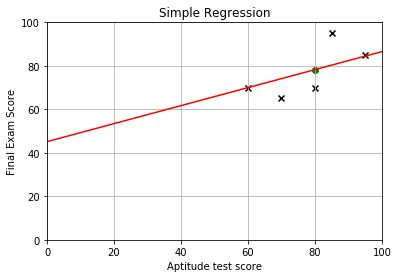

*** Iteration  50000  improvement 0.00037058755481211847  updatedRss:  366.9367490398945 
  B0:  45.15035501999819  B1:  0.41384701757890524 



[366.93675334 366.93674474]
[366.93674902 366.93674912]
[366.93638276 366.93637415]
[366.93637843 366.93637854]
[366.93601218 366.93600357]
[366.93600785 366.93600796]
[366.9356416  366.93563299]
[366.93563728 366.93563738]
[366.93527103 366.93526242]
[366.9352667  366.93526681]
[366.93490046 366.93489185]
[366.93489613 366.93489624]
[366.93452989 366.93452128]
[366.93452556 366.93452567]
[366.93415933 366.93415072]
[366.934155   366.93415511]
[366.93378877 366.93378016]
[366.93378444 366.93378455]
[366.93341821 366.9334096 ]
[366.93341389 366.93341399]
[366.93304766 366.93303905]
[366.93304333 366.93304344]
[366.93267711 366.9326685 ]
[366.93267278 366.93267289]
[366.93230656 366.93229796]
[366.93230224 366.93230235]
[366.93193602 366.93192741]
[366.9319317 366.9319318]
[366.93156548 366.93155687]
[366.93156116 366.93156126]
[366.93119495 366

[366.74673031 366.74672172]
[366.74672599 366.7467261 ]
[366.7463615  366.74635292]
[366.74635719 366.7463573 ]
[366.7459927  366.74598412]
[366.74598839 366.7459885 ]
[366.74562391 366.74561532]
[366.74561959 366.7456197 ]
[366.74525512 366.74524653]
[366.7452508  366.74525091]
[366.74488633 366.74487774]
[366.74488201 366.74488212]
[366.74451754 366.74450895]
[366.74451322 366.74451333]
[366.74414876 366.74414017]
[366.74414444 366.74414455]
[366.74377998 366.74377139]
[366.74377566 366.74377577]
[366.7434112  366.74340262]
[366.74340689 366.743407  ]
[366.74304243 366.74303384]
[366.74303812 366.74303822]
[366.74267366 366.74266508]
[366.74266935 366.74266945]
[366.7423049  366.74229631]
[366.74230058 366.74230069]
[366.74193614 366.74192755]
[366.74193182 366.74193193]
[366.74156738 366.74155879]
[366.74156306 366.74156317]
[366.74119862 366.74119004]
[366.74119431 366.74119442]
[366.74082987 366.74082129]
[366.74082556 366.74082566]
[366.74046112 366.74045254]
[366.74045681 366.74

[366.57377326 366.57376469]
[366.57376895 366.57376906]
[366.57340608 366.57339751]
[366.57340177 366.57340188]
[366.5730389  366.57303033]
[366.57303459 366.5730347 ]
[366.57267172 366.57266316]
[366.57266742 366.57266752]
[366.57230455 366.57229598]
[366.57230025 366.57230035]
[366.57193738 366.57192882]
[366.57193308 366.57193318]
[366.57157022 366.57156165]
[366.57156591 366.57156602]
[366.57120306 366.57119449]
[366.57119875 366.57119886]
[366.5708359  366.57082733]
[366.57083159 366.5708317 ]
[366.57046875 366.57046018]
[366.57046444 366.57046455]
[366.57010159 366.57009303]
[366.57009729 366.57009739]
[366.56973445 366.56972588]
[366.56973014 366.56973025]
[366.5693673  366.56935873]
[366.569363  366.5693631]
[366.56900016 366.56899159]
[366.56899585 366.56899596]
[366.56863302 366.56862446]
[366.56862872 366.56862882]
[366.56826589 366.56825732]
[366.56826158 366.56826169]
[366.56789876 366.56789019]
[366.56789445 366.56789456]
[366.56753163 366.56752306]
[366.56752733 366.5675

[366.40632913 366.40632058]
[366.40632483 366.40632494]
[366.40596351 366.40595496]
[366.40595922 366.40595932]
[366.40559791 366.40558935]
[366.40559361 366.40559371]
[366.4052323  366.40522375]
[366.405228   366.40522811]
[366.4048667  366.40485815]
[366.4048624  366.40486251]
[366.4045011  366.40449255]
[366.4044968  366.40449691]
[366.4041355  366.40412695]
[366.4041312  366.40413131]
[366.40376991 366.40376136]
[366.40376561 366.40376572]
[366.40340432 366.40339577]
[366.40340002 366.40340013]
[366.40303874 366.40303019]
[366.40303444 366.40303455]
[366.40267315 366.4026646 ]
[366.40266886 366.40266896]
[366.40230758 366.40229903]
[366.40230328 366.40230339]
[366.401942   366.40193345]
[366.4019377  366.40193781]
[366.40157643 366.40156788]
[366.40157213 366.40157224]
[366.40121086 366.40120231]
[366.40120656 366.40120667]
[366.4008453  366.40083675]
[366.400841   366.40084111]
[366.40047974 366.40047119]
[366.40047544 366.40047554]
[366.40011418 366.40010563]
[366.40010988 366.40

[366.22140234 366.22139381]
[366.22139806 366.22139816]
[366.22103846 366.22102993]
[366.22103418 366.22103428]
[366.22067459 366.22066606]
[366.2206703  366.22067041]
[366.22031072 366.22030219]
[366.22030643 366.22030654]
[366.21994685 366.21993832]
[366.21994256 366.21994267]
[366.21958298 366.21957445]
[366.21957869 366.2195788 ]
[366.21921912 366.21921059]
[366.21921483 366.21921494]
[366.21885526 366.21884673]
[366.21885097 366.21885108]
[366.2184914  366.21848287]
[366.21848712 366.21848722]
[366.21812755 366.21811902]
[366.21812326 366.21812337]
[366.2177637  366.21775517]
[366.21775942 366.21775952]
[366.21739986 366.21739133]
[366.21739557 366.21739568]
[366.21703602 366.21702749]
[366.21703173 366.21703183]
[366.21667218 366.21666365]
[366.21666789 366.216668  ]
[366.21630834 366.21629981]
[366.21630405 366.21630416]
[366.21594451 366.21593598]
[366.21594022 366.21594033]
[366.21558068 366.21557215]
[366.21557639 366.2155765 ]
[366.21521686 366.21520833]
[366.21521257 366.21

[366.04097396 366.04096545]
[366.04096968 366.04096979]
[366.04061177 366.04060326]
[366.04060749 366.0406076 ]
[366.04024958 366.04024107]
[366.04024531 366.04024541]
[366.0398874  366.03987889]
[366.03988313 366.03988323]
[366.03952522 366.03951671]
[366.03952095 366.03952105]
[366.03916305 366.03915454]
[366.03915877 366.03915888]
[366.03880088 366.03879237]
[366.0387966  366.03879671]
[366.03843871 366.0384302 ]
[366.03843443 366.03843454]
[366.03807655 366.03806804]
[366.03807227 366.03807237]
[366.03771438 366.03770587]
[366.03771011 366.03771021]
[366.03735223 366.03734372]
[366.03734795 366.03734806]
[366.03699007 366.03698156]
[366.03698579 366.0369859 ]
[366.03662792 366.03661941]
[366.03662364 366.03662375]
[366.03626577 366.03625726]
[366.0362615 366.0362616]
[366.03590363 366.03589512]
[366.03589935 366.03589946]
[366.03554149 366.03553298]
[366.03553721 366.03553732]
[366.03517935 366.03517084]
[366.03517507 366.03517518]
[366.03481722 366.03480871]
[366.03481294 366.0348

[365.83903915 365.83903066]
[365.83903488 365.83903499]
[365.83867885 365.83867036]
[365.83867458 365.83867469]
[365.83831856 365.83831007]
[365.83831429 365.8383144 ]
[365.83795827 365.83794978]
[365.837954   365.83795411]
[365.83759798 365.8375895 ]
[365.83759372 365.83759382]
[365.8372377  365.83722921]
[365.83723344 365.83723354]
[365.83687742 365.83686893]
[365.83687316 365.83687326]
[365.83651715 365.83650866]
[365.83651288 365.83651299]
[365.83615687 365.83614839]
[365.83615261 365.83615272]
[365.83579661 365.83578812]
[365.83579234 365.83579245]
[365.83543634 365.83542785]
[365.83543207 365.83543218]
[365.83507608 365.83506759]
[365.83507181 365.83507192]
[365.83471582 365.83470733]
[365.83471155 365.83471166]
[365.83435556 365.83434708]
[365.8343513  365.83435141]
[365.83399531 365.83398683]
[365.83399105 365.83399115]
[365.83363506 365.83362658]
[365.8336308 365.8336309]
[365.83327482 365.83326633]
[365.83327055 365.83327066]
[365.83291458 365.83290609]
[365.83291031 365.8329

[365.66612612 365.66611766]
[365.66612187 365.66612197]
[365.66576745 365.66575898]
[365.66576319 365.6657633 ]
[365.66540878 365.66540031]
[365.66540452 365.66540463]
[365.66505011 365.66504164]
[365.66504585 365.66504596]
[365.66469144 365.66468298]
[365.66468719 365.66468729]
[365.66433278 365.66432431]
[365.66432853 365.66432863]
[365.66397412 365.66396566]
[365.66396987 365.66396997]
[365.66361547 365.663607  ]
[365.66361121 365.66361132]
[365.66325682 365.66324835]
[365.66325256 365.66325267]
[365.66289817 365.6628897 ]
[365.66289391 365.66289402]
[365.66253952 365.66253106]
[365.66253527 365.66253537]
[365.66218088 365.66217241]
[365.66217663 365.66217673]
[365.66182225 365.66181378]
[365.66181799 365.66181809]
[365.66146361 365.66145514]
[365.66145935 365.66145946]
[365.66110498 365.66109651]
[365.66110072 365.66110083]
[365.66074635 365.66073788]
[365.66074209 365.6607422 ]
[365.66038773 365.66037926]
[365.66038347 365.66038358]
[365.6600291  365.66002064]
[365.66002485 365.66

[365.52363867 365.52363022]
[365.52363443 365.52363453]
[365.52328133 365.52327288]
[365.52327709 365.52327719]
[365.522924   365.52291554]
[365.52291975 365.52291986]
[365.52256666 365.52255821]
[365.52256242 365.52256252]
[365.52220933 365.52220088]
[365.52220509 365.52220519]
[365.52185201 365.52184356]
[365.52184776 365.52184787]
[365.52149469 365.52148623]
[365.52149044 365.52149054]
[365.52113737 365.52112891]
[365.52113312 365.52113322]
[365.52078005 365.5207716 ]
[365.5207758  365.52077591]
[365.52042274 365.52041428]
[365.52041849 365.52041859]
[365.52006543 365.52005697]
[365.52006118 365.52006129]
[365.51970812 365.51969967]
[365.51970387 365.51970398]
[365.51935082 365.51934237]
[365.51934657 365.51934668]
[365.51899352 365.51898507]
[365.51898927 365.51898938]
[365.51863622 365.51862777]
[365.51863197 365.51863208]
[365.51827893 365.51827048]
[365.51827468 365.51827479]
[365.51792164 365.51791319]
[365.51791739 365.5179175 ]
[365.51756435 365.5175559 ]
[365.51756011 365.51

[365.38416967 365.38416977]
[365.38381787 365.38380944]
[365.38381363 365.38381374]
[365.38346185 365.38345341]
[365.3834576  365.38345771]
[365.38310582 365.38309738]
[365.38310158 365.38310168]
[365.3827498  365.38274136]
[365.38274556 365.38274566]
[365.38239378 365.38238534]
[365.38238954 365.38238964]
[365.38203776 365.38202932]
[365.38203352 365.38203363]
[365.38168175 365.38167331]
[365.38167751 365.38167761]
[365.38132574 365.3813173 ]
[365.3813215  365.38132161]
[365.38096973 365.3809613 ]
[365.38096549 365.3809656 ]
[365.38061373 365.38060529]
[365.38060949 365.3806096 ]
[365.38025773 365.3802493 ]
[365.38025349 365.3802536 ]
[365.37990174 365.3798933 ]
[365.3798975 365.3798976]
[365.37954574 365.37953731]
[365.3795415  365.37954161]
[365.37918976 365.37918132]
[365.37918552 365.37918562]
[365.37883377 365.37882533]
[365.37882953 365.37882963]
[365.37847779 365.37846935]
[365.37847355 365.37847365]
[365.37812181 365.37811337]
[365.37811757 365.37811767]
[365.37776583 365.3777

[365.21720585 365.21719743]
[365.21720162 365.21720173]
[365.21685139 365.21684297]
[365.21684715 365.21684726]
[365.21649692 365.2164885 ]
[365.21649269 365.2164928 ]
[365.21614246 365.21613404]
[365.21613823 365.21613833]
[365.215788   365.21577958]
[365.21578377 365.21578388]
[365.21543355 365.21542513]
[365.21542932 365.21542942]
[365.2150791  365.21507068]
[365.21507487 365.21507497]
[365.21472465 365.21471623]
[365.21472042 365.21472052]
[365.21437021 365.21436179]
[365.21436597 365.21436608]
[365.21401576 365.21400735]
[365.21401153 365.21401164]
[365.21366133 365.21365291]
[365.2136571 365.2136572]
[365.21330689 365.21329847]
[365.21330266 365.21330277]
[365.21295246 365.21294404]
[365.21294823 365.21294834]
[365.21259803 365.21258961]
[365.2125938  365.21259391]
[365.21224361 365.21223519]
[365.21223938 365.21223948]
[365.21188919 365.21188077]
[365.21188496 365.21188506]
[365.21153477 365.21152635]
[365.21153054 365.21153064]
[365.21118036 365.21117194]
[365.21117612 365.2111

[365.06226655 365.06225814]
[365.06226232 365.06226243]
[365.06191353 365.06190513]
[365.06190931 365.06190941]
[365.06156052 365.06155212]
[365.0615563 365.0615564]
[365.06120751 365.06119911]
[365.06120329 365.06120339]
[365.0608545 365.0608461]
[365.06085028 365.06085039]
[365.0605015 365.0604931]
[365.06049728 365.06049739]
[365.0601485 365.0601401]
[365.06014428 365.06014439]
[365.05979551 365.05978711]
[365.05979129 365.05979139]
[365.05944252 365.05943411]
[365.05943829 365.0594384 ]
[365.05908953 365.05908112]
[365.0590853  365.05908541]
[365.05873654 365.05872814]
[365.05873232 365.05873242]
[365.05838356 365.05837516]
[365.05837934 365.05837944]
[365.05803058 365.05802218]
[365.05802636 365.05802646]
[365.0576776 365.0576692]
[365.05767338 365.05767349]
[365.05732463 365.05731623]
[365.05732041 365.05732051]
[365.05697166 365.05696326]
[365.05696744 365.05696754]
[365.0566187  365.05661029]
[365.05661447 365.05661458]
[365.05626573 365.05625733]
[365.05626151 365.05626162]
[3

[364.90093123 364.90092285]
[364.90092702 364.90092712]
[364.90057973 364.90057134]
[364.90057551 364.90057562]
[364.90022823 364.90021984]
[364.90022401 364.90022412]
[364.89987673 364.89986835]
[364.89987252 364.89987262]
[364.89952524 364.89951685]
[364.89952102 364.89952113]
[364.89917375 364.89916536]
[364.89916953 364.89916964]
[364.89882226 364.89881388]
[364.89881805 364.89881815]
[364.89847078 364.89846239]
[364.89846656 364.89846667]
[364.8981193  364.89811091]
[364.89811508 364.89811519]
[364.89776782 364.89775944]
[364.89776361 364.89776371]
[364.89741635 364.89740796]
[364.89741213 364.89741224]
[364.89706487 364.89705649]
[364.89706066 364.89706077]
[364.89671341 364.89670502]
[364.89670919 364.8967093 ]
[364.89636194 364.89635356]
[364.89635773 364.89635784]
[364.89601048 364.8960021 ]
[364.89600627 364.89600638]
[364.89565903 364.89565064]
[364.89565481 364.89565492]
[364.89530757 364.89529919]
[364.89530336 364.89530346]
[364.89495612 364.89494774]
[364.89495191 364.89

[364.76654196 364.76654206]
[364.76619592 364.76618755]
[364.76619171 364.76619182]
[364.76584568 364.76583731]
[364.76584147 364.76584158]
[364.76549544 364.76548707]
[364.76549123 364.76549134]
[364.76514521 364.76513684]
[364.765141   364.76514111]
[364.76479498 364.76478661]
[364.76479077 364.76479087]
[364.76444475 364.76443638]
[364.76444054 364.76444065]
[364.76409452 364.76408616]
[364.76409032 364.76409042]
[364.7637443  364.76373593]
[364.7637401 364.7637402]
[364.76339409 364.76338572]
[364.76338988 364.76338998]
[364.76304387 364.7630355 ]
[364.76303967 364.76303977]
[364.76269366 364.76268529]
[364.76268945 364.76268956]
[364.76234345 364.76233508]
[364.76233925 364.76233935]
[364.76199325 364.76198488]
[364.76198904 364.76198915]
[364.76164305 364.76163468]
[364.76163884 364.76163895]
[364.76129285 364.76128448]
[364.76128864 364.76128875]
[364.76094265 364.76093429]
[364.76093845 364.76093855]
[364.76059246 364.76058409]
[364.76058826 364.76058836]
[364.76024227 364.7602

[364.64555751 364.64554916]
[364.64555332 364.64555342]
[364.6452084  364.64520005]
[364.64520421 364.64520431]
[364.6448593  364.64485094]
[364.6448551 364.6448552]
[364.64451019 364.64450184]
[364.644506  364.6445061]
[364.64416109 364.64415274]
[364.6441569 364.644157 ]
[364.643812   364.64380364]
[364.6438078 364.6438079]
[364.6434629  364.64345455]
[364.64345871 364.64345881]
[364.64311381 364.64310546]
[364.64310962 364.64310972]
[364.64276473 364.64275637]
[364.64276053 364.64276063]
[364.64241564 364.64240729]
[364.64241144 364.64241155]
[364.64206656 364.64205821]
[364.64206236 364.64206247]
[364.64171749 364.64170913]
[364.64171329 364.64171339]
[364.64136841 364.64136006]
[364.64136421 364.64136432]
[364.64101934 364.64101099]
[364.64101514 364.64101525]
[364.64067027 364.64066192]
[364.64066608 364.64066618]
[364.64032121 364.64031285]
[364.64031701 364.64031712]
[364.63997215 364.63996379]
[364.63996795 364.63996806]
[364.63962309 364.63961474]
[364.63961889 364.639619  ]


[364.50478316 364.50477482]
[364.50477897 364.50477907]
[364.50443537 364.50442703]
[364.50443118 364.50443128]
[364.50408758 364.50407924]
[364.50408339 364.5040835 ]
[364.5037398  364.50373146]
[364.50373561 364.50373571]
[364.50339202 364.50338368]
[364.50338783 364.50338793]
[364.50304424 364.5030359 ]
[364.50304005 364.50304016]
[364.50269647 364.50268813]
[364.50269228 364.50269238]
[364.5023487  364.50234036]
[364.50234451 364.50234461]
[364.50200093 364.50199259]
[364.50199674 364.50199684]
[364.50165316 364.50164483]
[364.50164897 364.50164908]
[364.5013054  364.50129706]
[364.50130121 364.50130132]
[364.50095765 364.50094931]
[364.50095345 364.50095356]
[364.50060989 364.50060155]
[364.5006057 364.5006058]
[364.50026214 364.5002538 ]
[364.50025795 364.50025805]
[364.49991439 364.49990605]
[364.4999102  364.49991031]
[364.49956665 364.49955831]
[364.49956246 364.49956256]
[364.49921891 364.49921057]
[364.49921471 364.49921482]
[364.49887117 364.49886283]
[364.49886698 364.4988

[364.33163594 364.33163604]
[364.33129395 364.33128563]
[364.33128977 364.33128987]
[364.33094778 364.33093946]
[364.3309436  364.33094371]
[364.33060162 364.3305933 ]
[364.33059744 364.33059755]
[364.33025547 364.33024715]
[364.33025128 364.33025139]
[364.32990931 364.32990099]
[364.32990513 364.32990523]
[364.32956316 364.32955484]
[364.32955898 364.32955908]
[364.32921701 364.32920869]
[364.32921283 364.32921293]
[364.32887087 364.32886255]
[364.32886669 364.32886679]
[364.32852472 364.3285164 ]
[364.32852054 364.32852065]
[364.32817859 364.32817027]
[364.32817441 364.32817451]
[364.32783245 364.32782413]
[364.32782827 364.32782837]
[364.32748632 364.327478  ]
[364.32748214 364.32748224]
[364.32714019 364.32713187]
[364.32713601 364.32713611]
[364.32679406 364.32678574]
[364.32678988 364.32678999]
[364.32644794 364.32643962]
[364.32644376 364.32644387]
[364.32610182 364.3260935 ]
[364.32609764 364.32609775]
[364.32575571 364.32574739]
[364.32575153 364.32575163]
[364.32540959 364.32

[364.16757518 364.16756688]
[364.16757101 364.16757111]
[364.16723055 364.16722225]
[364.16722638 364.16722648]
[364.16688593 364.16687762]
[364.16688175 364.16688186]
[364.1665413 364.166533 ]
[364.16653713 364.16653723]
[364.16619668 364.16618838]
[364.16619251 364.16619261]
[364.16585206 364.16584376]
[364.16584789 364.165848  ]
[364.16550745 364.16549915]
[364.16550328 364.16550338]
[364.16516284 364.16515454]
[364.16515867 364.16515877]
[364.16481823 364.16480993]
[364.16481406 364.16481417]
[364.16447363 364.16446533]
[364.16446946 364.16446956]
[364.16412903 364.16412073]
[364.16412486 364.16412496]
[364.16378443 364.16377613]
[364.16378026 364.16378036]
[364.16343984 364.16343153]
[364.16343566 364.16343577]
[364.16309524 364.16308694]
[364.16309107 364.16309118]
[364.16275066 364.16274236]
[364.16274649 364.16274659]
[364.16240607 364.16239777]
[364.1624019 364.162402 ]
[364.16206149 364.16205319]
[364.16205732 364.16205742]
[364.16171691 364.16170861]
[364.16171274 364.161712

[364.01624953 364.01624124]
[364.01624537 364.01624547]
[364.01590632 364.01589803]
[364.01590215 364.01590226]
[364.01556311 364.01555482]
[364.01555895 364.01555905]
[364.0152199  364.01521162]
[364.01521574 364.01521584]
[364.0148767  364.01486842]
[364.01487254 364.01487264]
[364.0145335  364.01452522]
[364.01452934 364.01452944]
[364.01419031 364.01418202]
[364.01418614 364.01418625]
[364.01384711 364.01383883]
[364.01384295 364.01384306]
[364.01350393 364.01349564]
[364.01349976 364.01349987]
[364.01316074 364.01315246]
[364.01315658 364.01315668]
[364.01281756 364.01280927]
[364.01281339 364.0128135 ]
[364.01247438 364.01246609]
[364.01247021 364.01247032]
[364.0121312  364.01212292]
[364.01212704 364.01212714]
[364.01178803 364.01177974]
[364.01178387 364.01178397]
[364.01144486 364.01143657]
[364.0114407 364.0114408]
[364.01110169 364.01109341]
[364.01109753 364.01109763]
[364.01075853 364.01075024]
[364.01075437 364.01075447]
[364.01041537 364.01040708]
[364.01041121 364.0104

[363.89905851 363.89905024]
[363.89905436 363.89905446]
[363.8987164  363.89870813]
[363.89871224 363.89871235]
[363.89837429 363.89836602]
[363.89837013 363.89837024]
[363.89803218 363.89802391]
[363.89802803 363.89802813]
[363.89769008 363.89768181]
[363.89768592 363.89768603]
[363.89734798 363.89733971]
[363.89734382 363.89734393]
[363.89700588 363.89699761]
[363.89700173 363.89700183]
[363.89666379 363.89665552]
[363.89665963 363.89665973]
[363.8963217  363.89631343]
[363.89631754 363.89631764]
[363.89597961 363.89597134]
[363.89597545 363.89597556]
[363.89563752 363.89562925]
[363.89563337 363.89563347]
[363.89529544 363.89528717]
[363.89529129 363.89529139]
[363.89495337 363.89494509]
[363.89494921 363.89494931]
[363.89461129 363.89460302]
[363.89460713 363.89460724]
[363.89426922 363.89426095]
[363.89426506 363.89426517]
[363.89392715 363.89391888]
[363.89392299 363.8939231 ]
[363.89358509 363.89357681]
[363.89358093 363.89358103]
[363.89324302 363.89323475]
[363.89323887 363.89

[363.73112133 363.73112143]
[363.73078494 363.73077669]
[363.73078079 363.73078089]
[363.7304444  363.73043615]
[363.73044026 363.73044036]
[363.73010387 363.73009562]
[363.73009972 363.73009983]
[363.72976334 363.72975509]
[363.72975919 363.7297593 ]
[363.72942281 363.72941456]
[363.72941867 363.72941877]
[363.72908229 363.72907404]
[363.72907814 363.72907825]
[363.72874177 363.72873352]
[363.72873762 363.72873773]
[363.72840125 363.728393  ]
[363.72839711 363.72839721]
[363.72806074 363.72805249]
[363.72805659 363.72805669]
[363.72772023 363.72771198]
[363.72771608 363.72771618]
[363.72737972 363.72737147]
[363.72737557 363.72737568]
[363.72703922 363.72703096]
[363.72703507 363.72703517]
[363.72669871 363.72669046]
[363.72669457 363.72669467]
[363.72635822 363.72634997]
[363.72635407 363.72635417]
[363.72601772 363.72600947]
[363.72601358 363.72601368]
[363.72567723 363.72566898]
[363.72567308 363.72567319]
[363.72533674 363.72532849]
[363.7253326 363.7253327]
[363.72499626 363.7249

[363.56124922 363.56124932]
[363.56091441 363.56090618]
[363.56091027 363.56091037]
[363.56057546 363.56056723]
[363.56057133 363.56057143]
[363.56023652 363.56022829]
[363.56023239 363.56023249]
[363.55989759 363.55988935]
[363.55989345 363.55989355]
[363.55955865 363.55955042]
[363.55955451 363.55955462]
[363.55921972 363.55921149]
[363.55921558 363.55921569]
[363.55888079 363.55887256]
[363.55887665 363.55887676]
[363.55854187 363.55853363]
[363.55853773 363.55853783]
[363.55820294 363.55819471]
[363.55819881 363.55819891]
[363.55786403 363.55785579]
[363.55785989 363.55785999]
[363.55752511 363.55751688]
[363.55752097 363.55752108]
[363.5571862  363.55717797]
[363.55718206 363.55718216]
[363.55684729 363.55683906]
[363.55684315 363.55684326]
[363.55650838 363.55650015]
[363.55650425 363.55650435]
[363.55616948 363.55616125]
[363.55616534 363.55616545]
[363.55583058 363.55582235]
[363.55582644 363.55582655]
[363.55549168 363.55548345]
[363.55548755 363.55548765]
[363.55515279 363.55

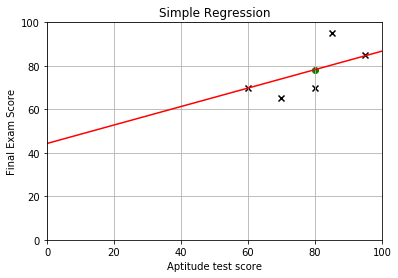

*** Iteration  60000  improvement 0.00033743207302450173  updatedRss:  363.3992566745287 
  B0:  44.30936761634882  B1:  0.4243762734696929 



[363.39926078 363.39925257]
[363.39925665 363.39925676]
[363.39892335 363.39891514]
[363.39891923 363.39891933]
[363.39858593 363.39857771]
[363.3985818 363.3985819]
[363.3982485  363.39824029]
[363.39824438 363.39824448]
[363.39791108 363.39790287]
[363.39790696 363.39790706]
[363.39757367 363.39756545]
[363.39756954 363.39756964]
[363.39723626 363.39722804]
[363.39723213 363.39723223]
[363.39689885 363.39689063]
[363.39689472 363.39689482]
[363.39656144 363.39655322]
[363.39655731 363.39655741]
[363.39622404 363.39621582]
[363.39621991 363.39622001]
[363.39588663 363.39587842]
[363.39588251 363.39588261]
[363.39554924 363.39554102]
[363.39554511 363.39554521]
[363.39521184 363.39520363]
[363.39520772 363.39520782]
[363.39487445 363.39486624]
[363.39487033 363.39487043]
[363.39453706 363.39452885]
[363.39453294 363.39453304]
[363.39419968 363.

[363.22657029 363.22657039]
[363.2262386 363.2262304]
[363.22623448 363.22623458]
[363.22590279 363.2258946 ]
[363.22589867 363.22589878]
[363.22556699 363.22555879]
[363.22556287 363.22556297]
[363.22523119 363.22522299]
[363.22522707 363.22522717]
[363.22489539 363.22488719]
[363.22489127 363.22489137]
[363.22455959 363.2245514 ]
[363.22455548 363.22455558]
[363.2242238  363.22421561]
[363.22421968 363.22421979]
[363.22388801 363.22387982]
[363.2238839 363.223884 ]
[363.22355223 363.22354403]
[363.22354811 363.22354821]
[363.22321645 363.22320825]
[363.22321233 363.22321243]
[363.22288067 363.22287247]
[363.22287655 363.22287665]
[363.22254489 363.2225367 ]
[363.22254077 363.22254088]
[363.22220912 363.22220092]
[363.222205  363.2222051]
[363.22187335 363.22186515]
[363.22186923 363.22186933]
[363.22153758 363.22152939]
[363.22153347 363.22153357]
[363.22120182 363.22119363]
[363.2211977 363.2211978]
[363.22086606 363.22085787]
[363.22086194 363.22086204]
[363.2205303  363.22052211]


[363.05905711 363.05905721]
[363.05872698 363.0587188 ]
[363.05872287 363.05872297]
[363.05839274 363.05838457]
[363.05838863 363.05838874]
[363.05805851 363.05805033]
[363.0580544 363.0580545]
[363.05772428 363.0577161 ]
[363.05772017 363.05772027]
[363.05739005 363.05738187]
[363.05738594 363.05738604]
[363.05705582 363.05704765]
[363.05705172 363.05705182]
[363.0567216  363.05671343]
[363.0567175 363.0567176]
[363.05638738 363.05637921]
[363.05638328 363.05638338]
[363.05605317 363.05604499]
[363.05604906 363.05604916]
[363.05571896 363.05571078]
[363.05571485 363.05571495]
[363.05538475 363.05537657]
[363.05538064 363.05538074]
[363.05505054 363.05504237]
[363.05504643 363.05504654]
[363.05471634 363.05470816]
[363.05471223 363.05471233]
[363.05438214 363.05437396]
[363.05437803 363.05437813]
[363.05404794 363.05403977]
[363.05404384 363.05404394]
[363.05371375 363.05370557]
[363.05370964 363.05370974]
[363.05337956 363.05337138]
[363.05337545 363.05337555]
[363.05304537 363.053037

[362.89233121 362.89232305]
[362.89232711 362.89232721]
[362.89199853 362.89199037]
[362.89199443 362.89199453]
[362.89166586 362.8916577 ]
[362.89166176 362.89166186]
[362.89133318 362.89132503]
[362.89132909 362.89132919]
[362.89100052 362.89099236]
[362.89099642 362.89099652]
[362.89066785 362.89065969]
[362.89066375 362.89066385]
[362.89033519 362.89032703]
[362.89033109 362.89033119]
[362.89000253 362.88999437]
[362.88999843 362.88999853]
[362.88966987 362.88966172]
[362.88966577 362.88966588]
[362.88933722 362.88932906]
[362.88933312 362.88933322]
[362.88900457 362.88899641]
[362.88900047 362.88900057]
[362.88867192 362.88866377]
[362.88866783 362.88866793]
[362.88833928 362.88833112]
[362.88833518 362.88833528]
[362.88800664 362.88799848]
[362.88800254 362.88800264]
[362.887674   362.88766585]
[362.88766991 362.88767001]
[362.88734137 362.88733321]
[362.88733727 362.88733737]
[362.88700874 362.88700058]
[362.88700464 362.88700474]
[362.88667611 362.88666795]
[362.88667201 362.88

[362.72638071 362.72637257]
[362.72637662 362.72637672]
[362.72604959 362.72604145]
[362.7260455 362.7260456]
[362.72571847 362.72571033]
[362.72571438 362.72571448]
[362.72538735 362.72537921]
[362.72538326 362.72538337]
[362.72505624 362.7250481 ]
[362.72505215 362.72505225]
[362.72472513 362.72471699]
[362.72472104 362.72472114]
[362.72439402 362.72438588]
[362.72438993 362.72439004]
[362.72406292 362.72405478]
[362.72405883 362.72405893]
[362.72373182 362.72372368]
[362.72372773 362.72372783]
[362.72340072 362.72339258]
[362.72339663 362.72339673]
[362.72306963 362.72306149]
[362.72306554 362.72306564]
[362.72273853 362.7227304 ]
[362.72273445 362.72273455]
[362.72240745 362.72239931]
[362.72240336 362.72240346]
[362.72207636 362.72206822]
[362.72207227 362.72207237]
[362.72174528 362.72173714]
[362.72174119 362.72174129]
[362.7214142  362.72140606]
[362.72141011 362.72141021]
[362.72108312 362.72107499]
[362.72107904 362.72107914]
[362.72075205 362.72074391]
[362.72074796 362.7207

[362.56153158 362.56153168]
[362.56120608 362.56119796]
[362.561202  362.5612021]
[362.56087651 362.56086839]
[362.56087243 362.56087253]
[362.56054694 362.56053882]
[362.56054286 362.56054296]
[362.56021737 362.56020925]
[362.56021329 362.56021339]
[362.5598878  362.55987969]
[362.55988372 362.55988383]
[362.55955824 362.55955012]
[362.55955416 362.55955426]
[362.55922868 362.55922056]
[362.5592246  362.55922471]
[362.55889913 362.55889101]
[362.55889505 362.55889515]
[362.55856957 362.55856146]
[362.5585655 362.5585656]
[362.55824002 362.55823191]
[362.55823595 362.55823605]
[362.55791048 362.55790236]
[362.5579064 362.5579065]
[362.55758094 362.55757282]
[362.55757686 362.55757696]
[362.55725139 362.55724328]
[362.55724732 362.55724742]
[362.55692186 362.55691374]
[362.55691778 362.55691788]
[362.55659232 362.55658421]
[362.55658825 362.55658835]
[362.55626279 362.55625467]
[362.55625871 362.55625882]
[362.55593326 362.55592515]
[362.55592919 362.55592929]
[362.55560374 362.55559562

[362.39712766 362.39712777]
[362.3968037 362.3967956]
[362.39679963 362.39679973]
[362.39647566 362.39646756]
[362.39647159 362.3964717 ]
[362.39614763 362.39613953]
[362.39614356 362.39614367]
[362.39581961 362.39581151]
[362.39581554 362.39581564]
[362.39549158 362.39548348]
[362.39548751 362.39548761]
[362.39516356 362.39515546]
[362.39515949 362.39515959]
[362.39483554 362.39482744]
[362.39483147 362.39483158]
[362.39450753 362.39449943]
[362.39450346 362.39450356]
[362.39417952 362.39417142]
[362.39417545 362.39417555]
[362.39385151 362.39384341]
[362.39384744 362.39384754]
[362.3935235 362.3935154]
[362.39351943 362.39351953]
[362.3931955 362.3931874]
[362.39319143 362.39319153]
[362.3928675 362.3928594]
[362.39286343 362.39286353]
[362.3925395 362.3925314]
[362.39253543 362.39253554]
[362.39221151 362.39220341]
[362.39220744 362.39220754]
[362.39188352 362.39187542]
[362.39187945 362.39187955]
[362.39155553 362.39154743]
[362.39155146 362.39155156]
[362.39122755 362.39121945]
[3

[362.23349645 362.23348837]
[362.23349239 362.23349249]
[362.23316994 362.23316186]
[362.23316589 362.23316599]
[362.23284345 362.23283536]
[362.23283939 362.23283949]
[362.23251695 362.23250887]
[362.23251289 362.23251299]
[362.23219045 362.23218237]
[362.2321864 362.2321865]
[362.23186396 362.23185588]
[362.2318599  362.23186001]
[362.23153748 362.2315294 ]
[362.23153342 362.23153352]
[362.23121099 362.23120291]
[362.23120693 362.23120703]
[362.23088451 362.23087643]
[362.23088045 362.23088055]
[362.23055803 362.23054995]
[362.23055397 362.23055407]
[362.23023156 362.23022348]
[362.2302275 362.2302276]
[362.22990509 362.22989701]
[362.22990103 362.22990113]
[362.22957862 362.22957054]
[362.22957456 362.22957466]
[362.22925215 362.22924407]
[362.22924809 362.22924819]
[362.22892569 362.22891761]
[362.22892163 362.22892173]
[362.22859923 362.22859115]
[362.22859517 362.22859527]
[362.22827277 362.22826469]
[362.22826871 362.22826881]
[362.22794632 362.22793824]
[362.22794226 362.227942

[362.07062621 362.07061815]
[362.07062216 362.07062226]
[362.07030123 362.07029317]
[362.07029718 362.07029728]
[362.06997626 362.0699682 ]
[362.06997221 362.06997231]
[362.06965129 362.06964323]
[362.06964724 362.06964734]
[362.06932632 362.06931826]
[362.06932227 362.06932237]
[362.06900136 362.0689933 ]
[362.06899731 362.06899741]
[362.0686764  362.06866833]
[362.06867235 362.06867245]
[362.06835144 362.06834338]
[362.06834739 362.06834749]
[362.06802648 362.06801842]
[362.06802243 362.06802253]
[362.06770153 362.06769347]
[362.06769748 362.06769758]
[362.06737658 362.06736852]
[362.06737253 362.06737263]
[362.06705164 362.06704357]
[362.06704759 362.06704769]
[362.06672669 362.06671863]
[362.06672264 362.06672274]
[362.06640175 362.06639369]
[362.0663977 362.0663978]
[362.06607682 362.06606876]
[362.06607277 362.06607287]
[362.06575188 362.06574382]
[362.06574783 362.06574793]
[362.06542695 362.06541889]
[362.0654229 362.065423 ]
[362.06510202 362.06509396]
[362.06509798 362.065098

[361.90883686 361.90883696]
[361.90851744 361.90850939]
[361.9085134 361.9085135]
[361.90819398 361.90818594]
[361.90818994 361.90819004]
[361.90787053 361.90786248]
[361.90786649 361.90786659]
[361.90754707 361.90753903]
[361.90754303 361.90754314]
[361.90722363 361.90721558]
[361.90721959 361.90721969]
[361.90690018 361.90689214]
[361.90689614 361.90689624]
[361.90657674 361.9065687 ]
[361.9065727 361.9065728]
[361.9062533  361.90624526]
[361.90624926 361.90624936]
[361.90592987 361.90592182]
[361.90592583 361.90592593]
[361.90560643 361.90559839]
[361.90560239 361.90560249]
[361.905283   361.90527496]
[361.90527896 361.90527906]
[361.90495958 361.90495153]
[361.90495554 361.90495564]
[361.90463615 361.90462811]
[361.90463211 361.90463221]
[361.90431273 361.90430469]
[361.90430869 361.90430879]
[361.90398932 361.90398127]
[361.90398528 361.90398538]
[361.9036659  361.90365786]
[361.90366186 361.90366196]
[361.90334249 361.90333445]
[361.90333845 361.90333855]
[361.90301908 361.903011

[361.74748449 361.74748459]
[361.74716657 361.74715855]
[361.74716254 361.74716264]
[361.74684463 361.74683661]
[361.7468406 361.7468407]
[361.74652269 361.74651466]
[361.74651866 361.74651876]
[361.74620075 361.74619273]
[361.74619672 361.74619682]
[361.74587881 361.74587079]
[361.74587478 361.74587488]
[361.74555688 361.74554886]
[361.74555285 361.74555295]
[361.74523495 361.74522693]
[361.74523092 361.74523102]
[361.74491302 361.744905  ]
[361.74490899 361.74490909]
[361.7445911  361.74458308]
[361.74458707 361.74458717]
[361.74426918 361.74426116]
[361.74426515 361.74426525]
[361.74394726 361.74393924]
[361.74394323 361.74394333]
[361.74362535 361.74361733]
[361.74362132 361.74362142]
[361.74330344 361.74329541]
[361.74329941 361.74329951]
[361.74298153 361.74297351]
[361.7429775 361.7429776]
[361.74265962 361.7426516 ]
[361.74265559 361.74265569]
[361.74233772 361.7423297 ]
[361.74233369 361.74233379]
[361.74201582 361.7420078 ]
[361.74201179 361.74201189]
[361.74169393 361.741685

[361.60259588 361.60258787]
[361.60259186 361.60259196]
[361.60227529 361.60226728]
[361.60227127 361.60227137]
[361.6019547 361.6019467]
[361.60195068 361.60195078]
[361.60163412 361.60162611]
[361.6016301 361.6016302]
[361.60131354 361.60130553]
[361.60130952 361.60130962]
[361.60099296 361.60098496]
[361.60098894 361.60098904]
[361.60067239 361.60066438]
[361.60066837 361.60066847]
[361.60035182 361.60034381]
[361.60034779 361.60034789]
[361.60003125 361.60002324]
[361.60002723 361.60002733]
[361.59971068 361.59970268]
[361.59970666 361.59970676]
[361.59939012 361.59938211]
[361.5993861 361.5993862]
[361.59906956 361.59906155]
[361.59906554 361.59906564]
[361.598749 361.598741]
[361.59874498 361.59874508]
[361.59842845 361.59842044]
[361.59842443 361.59842453]
[361.5981079  361.59809989]
[361.59810388 361.59810398]
[361.59778735 361.59777935]
[361.59778333 361.59778343]
[361.59746681 361.5974588 ]
[361.59746278 361.59746289]
[361.59714627 361.59713826]
[361.59714224 361.59714234]
[3

[361.43948452 361.43947654]
[361.43948051 361.43948061]
[361.43916546 361.43915748]
[361.43916145 361.43916155]
[361.43884641 361.43883842]
[361.43884239 361.43884249]
[361.43852735 361.43851936]
[361.43852334 361.43852344]
[361.4382083  361.43820031]
[361.43820429 361.43820439]
[361.43788925 361.43788126]
[361.43788524 361.43788534]
[361.4375702  361.43756222]
[361.43756619 361.43756629]
[361.43725116 361.43724317]
[361.43724715 361.43724725]
[361.43693212 361.43692413]
[361.43692811 361.43692821]
[361.43661308 361.4366051 ]
[361.43660907 361.43660917]
[361.43629405 361.43628606]
[361.43629004 361.43629014]
[361.43597502 361.43596703]
[361.43597101 361.43597111]
[361.43565599 361.435648  ]
[361.43565198 361.43565208]
[361.43533697 361.43532898]
[361.43533295 361.43533305]
[361.43501794 361.43500996]
[361.43501393 361.43501403]
[361.43469892 361.43469094]
[361.43469491 361.43469501]
[361.43437991 361.43437192]
[361.4343759 361.434376 ]
[361.43406089 361.43405291]
[361.43405688 361.4340

[361.28890203 361.28889406]
[361.28889803 361.28889813]
[361.28858438 361.28857641]
[361.28858038 361.28858048]
[361.28826673 361.28825876]
[361.28826273 361.28826283]
[361.28794909 361.28794112]
[361.28794509 361.28794519]
[361.28763145 361.28762348]
[361.28762745 361.28762755]
[361.28731381 361.28730584]
[361.28730981 361.28730991]
[361.28699618 361.28698821]
[361.28699217 361.28699227]
[361.28667855 361.28667058]
[361.28667454 361.28667464]
[361.28636092 361.28635295]
[361.28635691 361.28635701]
[361.28604329 361.28603532]
[361.28603929 361.28603939]
[361.28572567 361.2857177 ]
[361.28572167 361.28572176]
[361.28540805 361.28540008]
[361.28540405 361.28540414]
[361.28509043 361.28508246]
[361.28508643 361.28508653]
[361.28477282 361.28476485]
[361.28476881 361.28476891]
[361.28445521 361.28444724]
[361.2844512 361.2844513]
[361.2841376  361.28412963]
[361.2841336 361.2841337]
[361.28381999 361.28381202]
[361.28381599 361.28381609]
[361.28350239 361.28349442]
[361.28349839 361.283498

[361.10989954 361.10989964]
[361.10958756 361.10957961]
[361.10958357 361.10958367]
[361.10927159 361.10926364]
[361.1092676 361.1092677]
[361.10895563 361.10894768]
[361.10895163 361.10895173]
[361.10863966 361.10863172]
[361.10863567 361.10863577]
[361.1083237  361.10831576]
[361.10831971 361.10831981]
[361.10800775 361.1079998 ]
[361.10800375 361.10800385]
[361.10769179 361.10768384]
[361.1076878 361.1076879]
[361.10737584 361.10736789]
[361.10737185 361.10737195]
[361.10705989 361.10705195]
[361.1070559 361.107056 ]
[361.10674395 361.106736  ]
[361.10673996 361.10674006]
[361.10642801 361.10642006]
[361.10642401 361.10642411]
[361.10611207 361.10610412]
[361.10610807 361.10610817]
[361.10579613 361.10578818]
[361.10579214 361.10579224]
[361.1054802  361.10547225]
[361.1054762 361.1054763]
[361.10516427 361.10515632]
[361.10516027 361.10516037]
[361.10484834 361.10484039]
[361.10484435 361.10484445]
[361.10453241 361.10452447]
[361.10452842 361.10452852]
[361.10421649 361.10420854]


[360.95228644 360.95227851]
[360.95228246 360.95228256]
[360.95197195 360.95196402]
[360.95196796 360.95196806]
[360.95165745 360.95164952]
[360.95165347 360.95165357]
[360.95134297 360.95133504]
[360.95133898 360.95133908]
[360.95102848 360.95102055]
[360.9510245 360.9510246]
[360.950714   360.95070607]
[360.95071001 360.95071011]
[360.95039952 360.95039159]
[360.95039553 360.95039563]
[360.95008504 360.95007711]
[360.95008106 360.95008116]
[360.94977057 360.94976264]
[360.94976658 360.94976668]
[360.9494561  360.94944817]
[360.94945211 360.94945221]
[360.94914163 360.9491337 ]
[360.94913764 360.94913774]
[360.94882716 360.94881923]
[360.94882318 360.94882328]
[360.9485127  360.94850477]
[360.94850872 360.94850882]
[360.94819824 360.94819031]
[360.94819426 360.94819436]
[360.94788378 360.94787585]
[360.9478798 360.9478799]
[360.94756933 360.9475614 ]
[360.94756535 360.94756545]
[360.94725488 360.94724695]
[360.9472509 360.947251 ]
[360.94694043 360.9469325 ]
[360.94693645 360.94693655

[360.79540626 360.79539834]
[360.79540228 360.79540238]
[360.79509323 360.79508532]
[360.79508926 360.79508936]
[360.79478021 360.7947723 ]
[360.79477624 360.79477634]
[360.79446719 360.79445928]
[360.79446322 360.79446332]
[360.79415418 360.79414627]
[360.7941502 360.7941503]
[360.79384116 360.79383325]
[360.79383719 360.79383729]
[360.79352815 360.79352024]
[360.79352418 360.79352428]
[360.79321515 360.79320724]
[360.79321117 360.79321127]
[360.79290214 360.79289423]
[360.79289817 360.79289827]
[360.79258914 360.79258123]
[360.79258517 360.79258527]
[360.79227615 360.79226823]
[360.79227217 360.79227227]
[360.79196315 360.79195524]
[360.79195918 360.79195928]
[360.79165016 360.79164225]
[360.79164618 360.79164628]
[360.79133717 360.79132926]
[360.7913332  360.79133329]
[360.79102418 360.79101627]
[360.79102021 360.79102031]
[360.7907112  360.79070329]
[360.79070723 360.79070732]
[360.79039822 360.79039031]
[360.79039425 360.79039434]
[360.79008524 360.79007733]
[360.79008127 360.7900

[360.63956713 360.63956723]
[360.63925954 360.63925164]
[360.63925557 360.63925567]
[360.63894797 360.63894008]
[360.63894401 360.63894411]
[360.63863642 360.63862852]
[360.63863245 360.63863255]
[360.63832486 360.63831697]
[360.6383209 360.638321 ]
[360.63801331 360.63800542]
[360.63800934 360.63800944]
[360.63770176 360.63769387]
[360.6376978  360.63769789]
[360.63739021 360.63738232]
[360.63738625 360.63738635]
[360.63707867 360.63707078]
[360.63707471 360.63707481]
[360.63676713 360.63675924]
[360.63676317 360.63676326]
[360.63645559 360.6364477 ]
[360.63645163 360.63645173]
[360.63614406 360.63613617]
[360.63614009 360.63614019]
[360.63583253 360.63582463]
[360.63582856 360.63582866]
[360.635521   360.63551311]
[360.63551703 360.63551713]
[360.63520947 360.63520158]
[360.63520551 360.63520561]
[360.63489795 360.63489006]
[360.63489399 360.63489408]
[360.63458643 360.63457854]
[360.63458247 360.63458256]
[360.63427491 360.63426702]
[360.63427095 360.63427105]
[360.6339634  360.6339

[360.484149  360.4841491]
[360.48384285 360.48383497]
[360.48383889 360.48383899]
[360.48353274 360.48352487]
[360.48352879 360.48352889]
[360.48322264 360.48321477]
[360.48321869 360.48321879]
[360.48291255 360.48290467]
[360.48290859 360.48290869]
[360.48260245 360.48259457]
[360.48259849 360.48259859]
[360.48229236 360.48228448]
[360.4822884 360.4822885]
[360.48198227 360.48197439]
[360.48197831 360.48197841]
[360.48167218 360.48166431]
[360.48166823 360.48166832]
[360.4813621  360.48135422]
[360.48135814 360.48135824]
[360.48105202 360.48104414]
[360.48104806 360.48104816]
[360.48074194 360.48073406]
[360.48073798 360.48073808]
[360.48043186 360.48042399]
[360.48042791 360.48042801]
[360.48012179 360.48011392]
[360.48011784 360.48011793]
[360.47981172 360.47980385]
[360.47980777 360.47980786]
[360.47950165 360.47949378]
[360.4794977 360.4794978]
[360.47919159 360.47918372]
[360.47918764 360.47918773]
[360.47888153 360.47887366]
[360.47887758 360.47887767]
[360.47857147 360.4785636 

[360.32946144 360.32945358]
[360.32945749 360.32945759]
[360.32915278 360.32914493]
[360.32914884 360.32914894]
[360.32884413 360.32883627]
[360.32884018 360.32884028]
[360.32853548 360.32852762]
[360.32853153 360.32853163]
[360.32822683 360.32821897]
[360.32822288 360.32822298]
[360.32791818 360.32791033]
[360.32791424 360.32791434]
[360.32760954 360.32760168]
[360.32760559 360.32760569]
[360.3273009  360.32729305]
[360.32729696 360.32729705]
[360.32699226 360.32698441]
[360.32698832 360.32698842]
[360.32668363 360.32667577]
[360.32667968 360.32667978]
[360.326375   360.32636714]
[360.32637105 360.32637115]
[360.32606637 360.32605851]
[360.32606242 360.32606252]
[360.32575775 360.32574989]
[360.3257538 360.3257539]
[360.32544912 360.32544127]
[360.32544518 360.32544528]
[360.3251405  360.32513265]
[360.32513656 360.32513666]
[360.32483189 360.32482403]
[360.32482794 360.32482804]
[360.32452327 360.32451542]
[360.32451933 360.32451942]
[360.32421466 360.32420681]
[360.32421072 360.3242

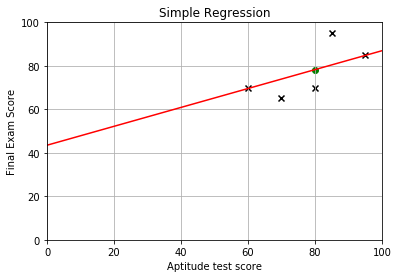

*** Iteration  70000  improvement 0.0003072429335020388  updatedRss:  360.1782542946858 
  B0:  43.50688199759645  B1:  0.4344234827280388 



[360.17825821 360.17825038]
[360.17825428 360.17825437]
[360.17795097 360.17794314]
[360.17794704 360.17794713]
[360.17764374 360.1776359 ]
[360.1776398 360.1776399]
[360.1773365  360.17732866]
[360.17733257 360.17733266]
[360.17702927 360.17702143]
[360.17702533 360.17702543]
[360.17672204 360.1767142 ]
[360.17671811 360.1767182 ]
[360.17641482 360.17640698]
[360.17641088 360.17641098]
[360.17610759 360.17609976]
[360.17610366 360.17610376]
[360.17580037 360.17579254]
[360.17579644 360.17579654]
[360.17549316 360.17548532]
[360.17548922 360.17548932]
[360.17518594 360.1751781 ]
[360.17518201 360.1751821 ]
[360.17487873 360.17487089]
[360.17487479 360.17487489]
[360.17457152 360.17456369]
[360.17456759 360.17456768]
[360.17426432 360.17425648]
[360.17426038 360.17426048]
[360.17395711 360.17394928]
[360.17395318 360.17395328]
[360.17364992 360.1

[360.02468712 360.02468722]
[360.02438525 360.02437743]
[360.02438132 360.02438142]
[360.02407945 360.02407163]
[360.02407552 360.02407562]
[360.02377365 360.02376583]
[360.02376973 360.02376982]
[360.02346786 360.02346004]
[360.02346393 360.02346403]
[360.02316207 360.02315425]
[360.02315815 360.02315824]
[360.02285629 360.02284847]
[360.02285236 360.02285246]
[360.0225505  360.02254268]
[360.02254658 360.02254667]
[360.02224472 360.0222369 ]
[360.02224079 360.02224089]
[360.02193894 360.02193113]
[360.02193502 360.02193512]
[360.02163317 360.02162535]
[360.02162924 360.02162934]
[360.0213274  360.02131958]
[360.02132347 360.02132357]
[360.02102163 360.02101381]
[360.0210177 360.0210178]
[360.02071586 360.02070804]
[360.02071193 360.02071203]
[360.0204101  360.02040228]
[360.02040617 360.02040627]
[360.02010434 360.02009652]
[360.02010041 360.02010051]
[360.01979858 360.01979076]
[360.01979465 360.01979475]
[360.01949283 360.01948501]
[360.0194889 360.019489 ]
[360.01918707 360.019179

[359.87275249 359.87275259]
[359.87245203 359.87244423]
[359.87244812 359.87244821]
[359.87214766 359.87213986]
[359.87214374 359.87214384]
[359.87184329 359.87183549]
[359.87183937 359.87183947]
[359.87153892 359.87153112]
[359.871535  359.8715351]
[359.87123456 359.87122675]
[359.87123064 359.87123074]
[359.87093019 359.87092239]
[359.87092628 359.87092637]
[359.87062583 359.87061803]
[359.87062192 359.87062201]
[359.87032148 359.87031368]
[359.87031756 359.87031766]
[359.87001712 359.87000932]
[359.8700132 359.8700133]
[359.86971277 359.86970497]
[359.86970885 359.86970895]
[359.86940842 359.86940062]
[359.86940451 359.8694046 ]
[359.86910408 359.86909628]
[359.86910016 359.86910026]
[359.86879974 359.86879193]
[359.86879582 359.86879592]
[359.8684954 359.8684876]
[359.86849148 359.86849158]
[359.86819106 359.86818326]
[359.86818714 359.86818724]
[359.86788673 359.86787892]
[359.86788281 359.86788291]
[359.86758239 359.86757459]
[359.86757848 359.86757857]
[359.86727807 359.86727027

[359.72031746 359.72030968]
[359.72031355 359.72031365]
[359.72001451 359.72000673]
[359.7200106 359.7200107]
[359.71971157 359.71970378]
[359.71970766 359.71970776]
[359.71940863 359.71940084]
[359.71940472 359.71940481]
[359.71910569 359.7190979 ]
[359.71910178 359.71910187]
[359.71880275 359.71879497]
[359.71879884 359.71879894]
[359.71849982 359.71849203]
[359.71849591 359.718496  ]
[359.71819688 359.7181891 ]
[359.71819298 359.71819307]
[359.71789396 359.71788617]
[359.71789005 359.71789014]
[359.71759103 359.71758325]
[359.71758712 359.71758722]
[359.71728811 359.71728033]
[359.7172842 359.7172843]
[359.71698519 359.71697741]
[359.71698128 359.71698138]
[359.71668227 359.71667449]
[359.71667836 359.71667846]
[359.71637936 359.71637158]
[359.71637545 359.71637555]
[359.71607645 359.71606866]
[359.71607254 359.71607264]
[359.71577354 359.71576576]
[359.71576963 359.71576973]
[359.71547063 359.71546285]
[359.71546672 359.71546682]
[359.71516773 359.71515995]
[359.71516382 359.715163

[359.57009783 359.57009792]
[359.56980019 359.56979242]
[359.56979629 359.56979638]
[359.56949865 359.56949088]
[359.56949475 359.56949485]
[359.56919711 359.56918935]
[359.56919321 359.56919331]
[359.56889558 359.56888782]
[359.56889168 359.56889178]
[359.56859405 359.56858629]
[359.56859015 359.56859025]
[359.56829253 359.56828476]
[359.56828863 359.56828873]
[359.56799101 359.56798324]
[359.56798711 359.5679872 ]
[359.56768948 359.56768172]
[359.56768558 359.56768568]
[359.56738797 359.5673802 ]
[359.56738407 359.56738416]
[359.56708645 359.56707869]
[359.56708255 359.56708265]
[359.56678494 359.56677718]
[359.56678104 359.56678114]
[359.56648343 359.56647567]
[359.56647953 359.56647963]
[359.56618193 359.56617416]
[359.56617803 359.56617812]
[359.56588042 359.56587266]
[359.56587652 359.56587662]
[359.56557892 359.56557116]
[359.56557502 359.56557512]
[359.56527742 359.56526966]
[359.56527352 359.56527362]
[359.56497593 359.56496816]
[359.56497203 359.56497213]
[359.56467444 359.56

[359.42808848 359.42808073]
[359.42808459 359.42808468]
[359.42778827 359.42778052]
[359.42778438 359.42778447]
[359.42748806 359.42748031]
[359.42748417 359.42748427]
[359.42718786 359.42718011]
[359.42718397 359.42718406]
[359.42688766 359.42687991]
[359.42688377 359.42688386]
[359.42658746 359.42657971]
[359.42658357 359.42658367]
[359.42628726 359.42627952]
[359.42628337 359.42628347]
[359.42598707 359.42597932]
[359.42598318 359.42598328]
[359.42568688 359.42567914]
[359.42568299 359.42568309]
[359.4253867  359.42537895]
[359.4253828 359.4253829]
[359.42508651 359.42507876]
[359.42508262 359.42508272]
[359.42478633 359.42477858]
[359.42478244 359.42478254]
[359.42448615 359.42447841]
[359.42448226 359.42448236]
[359.42418598 359.42417823]
[359.42418209 359.42418218]
[359.42388581 359.42387806]
[359.42388191 359.42388201]
[359.42358564 359.42357789]
[359.42358174 359.42358184]
[359.42328547 359.42327772]
[359.42328158 359.42328167]
[359.4229853  359.42297756]
[359.42298141 359.4229

[359.2786332  359.27862547]
[359.27862932 359.27862941]
[359.27833439 359.27832666]
[359.27833051 359.27833061]
[359.27803559 359.27802786]
[359.2780317 359.2780318]
[359.27773678 359.27772905]
[359.2777329 359.277733 ]
[359.27743798 359.27743025]
[359.2774341 359.2774342]
[359.27713919 359.27713146]
[359.2771353 359.2771354]
[359.27684039 359.27683266]
[359.27683651 359.27683661]
[359.2765416  359.27653387]
[359.27653772 359.27653782]
[359.27624281 359.27623508]
[359.27623893 359.27623903]
[359.27594403 359.2759363 ]
[359.27594014 359.27594024]
[359.27564524 359.27563751]
[359.27564136 359.27564146]
[359.27534646 359.27533873]
[359.27534258 359.27534268]
[359.27504769 359.27503996]
[359.2750438 359.2750439]
[359.27474891 359.27474118]
[359.27474503 359.27474513]
[359.27445014 359.27444241]
[359.27444626 359.27444635]
[359.27415137 359.27414364]
[359.27414749 359.27414758]
[359.2738526  359.27384487]
[359.27384872 359.27384882]
[359.27355384 359.27354611]
[359.27354996 359.27355005]
[3

[359.12035941 359.1203517 ]
[359.12035554 359.12035563]
[359.12006209 359.12005438]
[359.12005821 359.12005831]
[359.11976476 359.11975705]
[359.11976089 359.11976099]
[359.11946744 359.11945973]
[359.11946357 359.11946367]
[359.11917013 359.11916242]
[359.11916626 359.11916635]
[359.11887281 359.1188651 ]
[359.11886894 359.11886904]
[359.1185755  359.11856779]
[359.11857163 359.11857173]
[359.11827819 359.11827048]
[359.11827432 359.11827442]
[359.11798089 359.11797318]
[359.11797702 359.11797711]
[359.11768359 359.11767588]
[359.11767971 359.11767981]
[359.11738629 359.11737858]
[359.11738241 359.11738251]
[359.11708899 359.11708128]
[359.11708512 359.11708521]
[359.1167917  359.11678399]
[359.11678782 359.11678792]
[359.1164944  359.11648669]
[359.11649053 359.11649063]
[359.11619712 359.11618941]
[359.11619324 359.11619334]
[359.11589983 359.11589212]
[359.11589596 359.11589605]
[359.11560255 359.11559484]
[359.11559867 359.11559877]
[359.11530527 359.11529756]
[359.11530139 359.11

[358.97885132 358.97884363]
[358.97884746 358.97884755]
[358.97855532 358.97854763]
[358.97855146 358.97855156]
[358.97825933 358.97825163]
[358.97825546 358.97825556]
[358.97796333 358.97795564]
[358.97795947 358.97795957]
[358.97766734 358.97765965]
[358.97766348 358.97766358]
[358.97737136 358.97736366]
[358.97736749 358.97736759]
[358.97707537 358.97706768]
[358.97707151 358.9770716 ]
[358.97677939 358.9767717 ]
[358.97677553 358.97677562]
[358.97648341 358.97647572]
[358.97647955 358.97647964]
[358.97618743 358.97617974]
[358.97618357 358.97618367]
[358.97589146 358.97588377]
[358.9758876  358.97588769]
[358.97559549 358.9755878 ]
[358.97559163 358.97559172]
[358.97529952 358.97529183]
[358.97529566 358.97529575]
[358.97500356 358.97499586]
[358.97499969 358.97499979]
[358.97470759 358.9746999 ]
[358.97470373 358.97470383]
[358.97441163 358.97440394]
[358.97440777 358.97440787]
[358.97411568 358.97410798]
[358.97411181 358.97411191]
[358.97381972 358.97381203]
[358.97381586 358.97

[358.82618949 358.82618181]
[358.82618563 358.82618573]
[358.82589492 358.82588724]
[358.82589106 358.82589116]
[358.82560035 358.82559268]
[358.8255965  358.82559659]
[358.82530579 358.82529812]
[358.82530194 358.82530203]
[358.82501123 358.82500356]
[358.82500738 358.82500747]
[358.82471667 358.824709  ]
[358.82471282 358.82471292]
[358.82442212 358.82441445]
[358.82441827 358.82441836]
[358.82412757 358.82411989]
[358.82412371 358.82412381]
[358.82383302 358.82382535]
[358.82382917 358.82382926]
[358.82353847 358.8235308 ]
[358.82353462 358.82353472]
[358.82324393 358.82323626]
[358.82324008 358.82324017]
[358.82294939 358.82294172]
[358.82294554 358.82294563]
[358.82265485 358.82264718]
[358.822651  358.8226511]
[358.82236032 358.82235264]
[358.82235646 358.82235656]
[358.82206579 358.82205811]
[358.82206193 358.82206203]
[358.82177126 358.82176358]
[358.8217674 358.8217675]
[358.82147673 358.82146906]
[358.82147288 358.82147297]
[358.82118221 358.82117453]
[358.82117835 358.821178

[358.67778354 358.67777588]
[358.67777969 358.67777979]
[358.67749036 358.67748271]
[358.67748652 358.67748661]
[358.67719719 358.67718953]
[358.67719334 358.67719344]
[358.67690402 358.67689636]
[358.67690017 358.67690027]
[358.67661085 358.67660319]
[358.676607  358.6766071]
[358.67631768 358.67631003]
[358.67631384 358.67631393]
[358.67602452 358.67601686]
[358.67602067 358.67602077]
[358.67573136 358.6757237 ]
[358.67572751 358.67572761]
[358.6754382  358.67543055]
[358.67543436 358.67543445]
[358.67514505 358.67513739]
[358.6751412 358.6751413]
[358.67485189 358.67484424]
[358.67484805 358.67484815]
[358.67455875 358.67455109]
[358.6745549 358.674555 ]
[358.6742656  358.67425794]
[358.67426175 358.67426185]
[358.67397245 358.6739648 ]
[358.67396861 358.67396871]
[358.67367931 358.67367166]
[358.67367547 358.67367556]
[358.67338618 358.67337852]
[358.67338233 358.67338243]
[358.67309304 358.67308538]
[358.67308919 358.67308929]
[358.67279991 358.67279225]
[358.67279606 358.67279616

[358.53153736 358.53152973]
[358.53153353 358.53153362]
[358.53124556 358.53123792]
[358.53124172 358.53124182]
[358.53095375 358.53094612]
[358.53094992 358.53095001]
[358.53066195 358.53065431]
[358.53065812 358.53065821]
[358.53037016 358.53036252]
[358.53036632 358.53036642]
[358.53007836 358.53007072]
[358.53007452 358.53007462]
[358.52978657 358.52977893]
[358.52978273 358.52978283]
[358.52949478 358.52948714]
[358.52949094 358.52949104]
[358.52920299 358.52919535]
[358.52919916 358.52919925]
[358.52891121 358.52890357]
[358.52890737 358.52890747]
[358.52861943 358.52861179]
[358.52861559 358.52861568]
[358.52832765 358.52832001]
[358.52832381 358.52832391]
[358.52803587 358.52802823]
[358.52803203 358.52803213]
[358.5277441  358.52773646]
[358.52774026 358.52774036]
[358.52745233 358.52744469]
[358.52744849 358.52744859]
[358.52716056 358.52715292]
[358.52715672 358.52715682]
[358.52686879 358.52686116]
[358.52686496 358.52686505]
[358.52657703 358.52656939]
[358.5265732  358.52

[358.38626155 358.38626165]
[358.38597493 358.38596731]
[358.38597111 358.3859712 ]
[358.38568449 358.38567687]
[358.38568067 358.38568076]
[358.38539405 358.38538643]
[358.38539023 358.38539032]
[358.38510362 358.385096  ]
[358.38509979 358.38509989]
[358.38481318 358.38480556]
[358.38480936 358.38480945]
[358.38452275 358.38451513]
[358.38451893 358.38451902]
[358.38423232 358.3842247 ]
[358.3842285  358.38422859]
[358.3839419  358.38393428]
[358.38393807 358.38393817]
[358.38365148 358.38364385]
[358.38364765 358.38364774]
[358.38336106 358.38335343]
[358.38335723 358.38335732]
[358.38307064 358.38306302]
[358.38306681 358.38306691]
[358.38278022 358.3827726 ]
[358.3827764  358.38277649]
[358.38248981 358.38248219]
[358.38248598 358.38248608]
[358.3821994  358.38219178]
[358.38219558 358.38219567]
[358.381909   358.38190138]
[358.38190517 358.38190526]
[358.38161859 358.38161097]
[358.38161477 358.38161486]
[358.38132819 358.38132057]
[358.38132436 358.38132446]
[358.38103779 358.38

[358.24137832 358.24137842]
[358.24109305 358.24108545]
[358.24108924 358.24108933]
[358.24080397 358.24079637]
[358.24080015 358.24080025]
[358.24051489 358.24050729]
[358.24051107 358.24051117]
[358.24022581 358.24021821]
[358.24022199 358.24022209]
[358.23993673 358.23992913]
[358.23993292 358.23993301]
[358.23964766 358.23964006]
[358.23964384 358.23964394]
[358.23935859 358.23935099]
[358.23935477 358.23935487]
[358.23906952 358.23906192]
[358.23906571 358.2390658 ]
[358.23878046 358.23877286]
[358.23877664 358.23877674]
[358.2384914  358.23848379]
[358.23848758 358.23848767]
[358.23820234 358.23819473]
[358.23819852 358.23819861]
[358.23791328 358.23790568]
[358.23790946 358.23790956]
[358.23762423 358.23761662]
[358.23762041 358.2376205 ]
[358.23733517 358.23732757]
[358.23733136 358.23733145]
[358.23704613 358.23703852]
[358.23704231 358.2370424 ]
[358.23675708 358.23674948]
[358.23675326 358.23675336]
[358.23646804 358.23646043]
[358.23646422 358.23646431]
[358.236179   358.23

[358.10465834 358.10465075]
[358.10465453 358.10465462]
[358.10437053 358.10436295]
[358.10436672 358.10436682]
[358.10408273 358.10407514]
[358.10407892 358.10407902]
[358.10379493 358.10378734]
[358.10379112 358.10379122]
[358.10350713 358.10349955]
[358.10350332 358.10350342]
[358.10321934 358.10321175]
[358.10321553 358.10321562]
[358.10293155 358.10292396]
[358.10292774 358.10292783]
[358.10264376 358.10263617]
[358.10263995 358.10264004]
[358.10235597 358.10234839]
[358.10235216 358.10235226]
[358.10206819 358.1020606 ]
[358.10206438 358.10206447]
[358.10178041 358.10177282]
[358.1017766  358.10177669]
[358.10149263 358.10148504]
[358.10148882 358.10148891]
[358.10120485 358.10119727]
[358.10120104 358.10120114]
[358.10091708 358.10090949]
[358.10091327 358.10091337]
[358.10062931 358.10062172]
[358.1006255 358.1006256]
[358.10034154 358.10033396]
[358.10033773 358.10033783]
[358.10005378 358.10004619]
[358.10004997 358.10005006]
[358.09976602 358.09975843]
[358.09976221 358.0997

[357.95450381 357.95449624]
[357.95450001 357.9545001 ]
[357.95421741 357.95420984]
[357.95421361 357.9542137 ]
[357.95393101 357.95392345]
[357.95392721 357.95392731]
[357.95364462 357.95363705]
[357.95364082 357.95364092]
[357.95335823 357.95335066]
[357.95335443 357.95335453]
[357.95307184 357.95306428]
[357.95306804 357.95306814]
[357.95278546 357.95277789]
[357.95278166 357.95278175]
[357.95249908 357.95249151]
[357.95249528 357.95249537]
[357.9522127  357.95220513]
[357.9522089  357.95220899]
[357.95192632 357.95191876]
[357.95192252 357.95192262]
[357.95163995 357.95163238]
[357.95163615 357.95163624]
[357.95135358 357.95134601]
[357.95134978 357.95134987]
[357.95106721 357.95105964]
[357.95106341 357.9510635 ]
[357.95078084 357.95077328]
[357.95077704 357.95077714]
[357.95049448 357.95048691]
[357.95049068 357.95049078]
[357.95020812 357.95020055]
[357.95020432 357.95020442]
[357.94992176 357.9499142 ]
[357.94991796 357.94991806]
[357.94963541 357.94962784]
[357.94963161 357.94

[357.82332891 357.82332135]
[357.82332511 357.82332521]
[357.82304374 357.82303619]
[357.82303995 357.82304004]
[357.82275857 357.82275102]
[357.82275478 357.82275487]
[357.82247341 357.82246586]
[357.82246962 357.82246971]
[357.82218825 357.8221807 ]
[357.82218446 357.82218455]
[357.82190309 357.82189554]
[357.8218993  357.82189939]
[357.82161793 357.82161038]
[357.82161414 357.82161424]
[357.82133278 357.82132523]
[357.82132899 357.82132909]
[357.82104763 357.82104008]
[357.82104384 357.82104394]
[357.82076249 357.82075493]
[357.82075869 357.82075879]
[357.82047734 357.82046979]
[357.82047355 357.82047364]
[357.8201922  357.82018465]
[357.82018841 357.8201885 ]
[357.81990706 357.81989951]
[357.81990327 357.81990336]
[357.81962192 357.81961437]
[357.81961813 357.81961823]
[357.81933679 357.81932924]
[357.819333   357.81933309]
[357.81905166 357.81904411]
[357.81904787 357.81904796]
[357.81876653 357.81875898]
[357.81876274 357.81876283]
[357.8184814  357.81847385]
[357.81847761 357.81

[357.68419993 357.6841924 ]
[357.68419615 357.68419625]
[357.68391607 357.68390854]
[357.68391229 357.68391238]
[357.68363221 357.68362467]
[357.68362842 357.68362852]
[357.68334835 357.68334081]
[357.68334457 357.68334466]
[357.68306449 357.68305696]
[357.68306071 357.6830608 ]
[357.68278064 357.6827731 ]
[357.68277686 357.68277695]
[357.68249679 357.68248925]
[357.682493  357.6824931]
[357.68221294 357.6822054 ]
[357.68220916 357.68220925]
[357.68192909 357.68192156]
[357.68192531 357.6819254 ]
[357.68164525 357.68163772]
[357.68164147 357.68164156]
[357.68136141 357.68135388]
[357.68135763 357.68135772]
[357.68107757 357.68107004]
[357.68107379 357.68107388]
[357.68079374 357.6807862 ]
[357.68078995 357.68079005]
[357.6805099  357.68050237]
[357.68050612 357.68050621]
[357.68022607 357.68021854]
[357.68022229 357.68022238]
[357.67994225 357.67993471]
[357.67993846 357.67993856]
[357.67965842 357.67965089]
[357.67965464 357.67965473]
[357.6793746  357.67936707]
[357.67937082 357.6793

[357.54033885 357.54033133]
[357.54033507 357.54033517]
[357.54005633 357.54004881]
[357.54005256 357.54005265]
[357.53977382 357.5397663 ]
[357.53977004 357.53977014]
[357.53949131 357.53948379]
[357.53948753 357.53948763]
[357.5392088  357.53920128]
[357.53920502 357.53920512]
[357.53892629 357.53891878]
[357.53892252 357.53892261]
[357.53864379 357.53863627]
[357.53864002 357.53864011]
[357.53836129 357.53835377]
[357.53835752 357.53835761]
[357.53807879 357.53807128]
[357.53807502 357.53807511]
[357.5377963  357.53778878]
[357.53779252 357.53779262]
[357.5375138  357.53750629]
[357.53751003 357.53751012]
[357.53723131 357.5372238 ]
[357.53722754 357.53722763]
[357.53694883 357.53694131]
[357.53694505 357.53694515]
[357.53666634 357.53665883]
[357.53666257 357.53666266]
[357.53638386 357.53637635]
[357.53638009 357.53638018]
[357.53610138 357.53609387]
[357.53609761 357.5360977 ]
[357.53581891 357.53581139]
[357.53581513 357.53581523]
[357.53553643 357.53552892]
[357.53553266 357.53

[357.40447254 357.40446505]
[357.40446878 357.40446887]
[357.4041913 357.4041838]
[357.40418754 357.40418763]
[357.40391006 357.40390256]
[357.4039063  357.40390639]
[357.40362882 357.40362133]
[357.40362506 357.40362515]
[357.40334759 357.40334009]
[357.40334382 357.40334392]
[357.40306636 357.40305886]
[357.40306259 357.40306269]
[357.40278513 357.40277763]
[357.40278136 357.40278146]
[357.4025039 357.4024964]
[357.40250014 357.40250023]
[357.40222268 357.40221518]
[357.40221891 357.40221901]
[357.40194145 357.40193396]
[357.40193769 357.40193778]
[357.40166024 357.40165274]
[357.40165647 357.40165656]
[357.40137902 357.40137152]
[357.40137525 357.40137535]
[357.40109781 357.40109031]
[357.40109404 357.40109413]
[357.40081659 357.4008091 ]
[357.40081283 357.40081292]
[357.40053539 357.40052789]
[357.40053162 357.40053171]
[357.40025418 357.40024668]
[357.40025042 357.40025051]
[357.39997298 357.39996548]
[357.39996921 357.39996931]
[357.39969178 357.39968428]
[357.39968801 357.399688

[357.24794801 357.24794053]
[357.24794426 357.24794435]
[357.24766824 357.24766076]
[357.24766448 357.24766458]
[357.24738847 357.24738099]
[357.24738471 357.2473848 ]
[357.2471087  357.24710122]
[357.24710494 357.24710503]
[357.24682893 357.24682145]
[357.24682517 357.24682527]
[357.24654916 357.24654168]
[357.24654541 357.2465455 ]
[357.2462694  357.24626192]
[357.24626564 357.24626574]
[357.24598964 357.24598216]
[357.24598588 357.24598598]
[357.24570988 357.2457024 ]
[357.24570613 357.24570622]


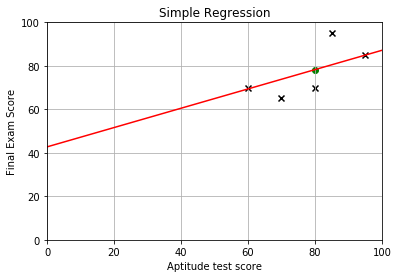

*** Iteration  80000  improvement 0.00027975472795560563  updatedRss:  357.24542638789165 
  B0:  42.74113548890739  B1:  0.4440107142400393 



[357.24543013 357.24542265]
[357.24542637 357.24542647]
[357.24515038 357.2451429 ]
[357.24514662 357.24514671]
[357.24487063 357.24486315]
[357.24486687 357.24486696]
[357.24459088 357.2445834 ]
[357.24458712 357.24458722]
[357.24431113 357.24430366]
[357.24430738 357.24430747]
[357.24403139 357.24402391]
[357.24402764 357.24402773]
[357.24375165 357.24374417]
[357.2437479  357.24374799]
[357.24347192 357.24346444]
[357.24346816 357.24346826]
[357.24319218 357.2431847 ]
[357.24318843 357.24318852]
[357.24291245 357.24290497]
[357.2429087  357.24290879]
[357.24263272 357.24262525]
[357.24262897 357.24262906]
[357.242353   357.24234552]
[357.24234924 357.24234934]
[357.24207328 357.2420658 ]
[357.24206952 357.24206961]
[357.24179355 357.24178608]
[357.2417898  357.24178989]
[357.24151384 357.24150636]
[357.24151008 357.24151017]
[357.24123412 3

[357.18980733 357.18980742]
[357.18953185 357.18952438]
[357.1895281  357.18952819]
[357.18925262 357.18924515]
[357.18924887 357.18924896]
[357.18897339 357.18896592]
[357.18896964 357.18896974]
[357.18869417 357.1886867 ]
[357.18869042 357.18869051]
[357.18841495 357.18840748]
[357.1884112  357.18841129]
[357.18813573 357.18812826]
[357.18813198 357.18813208]
[357.18785652 357.18784905]
[357.18785277 357.18785286]
[357.18757731 357.18756983]
[357.18757355 357.18757365]
[357.1872981  357.18729062]
[357.18729434 357.18729444]
[357.18701889 357.18701142]
[357.18701514 357.18701523]
[357.18673968 357.18673221]
[357.18673593 357.18673603]
[357.18646048 357.18645301]
[357.18645673 357.18645682]
[357.18618128 357.18617381]
[357.18617753 357.18617762]
[357.18590209 357.18589461]
[357.18589833 357.18589843]
[357.18562289 357.18561542]
[357.18561914 357.18561923]
[357.1853437  357.18533623]
[357.18533995 357.18534004]
[357.18506451 357.18505704]
[357.18506076 357.18506085]
[357.18478532 357.18

[357.10727291 357.10726545]
[357.10726916 357.10726926]
[357.10699445 357.10698699]
[357.10699071 357.1069908 ]
[357.106716   357.10670854]
[357.10671225 357.10671234]
[357.10643755 357.10643008]
[357.1064338  357.10643389]
[357.1061591  357.10615163]
[357.10615535 357.10615544]
[357.10588065 357.10587319]
[357.1058769 357.105877 ]
[357.10560221 357.10559474]
[357.10559846 357.10559855]
[357.10532376 357.1053163 ]
[357.10532002 357.10532011]
[357.10504532 357.10503786]
[357.10504158 357.10504167]
[357.10476689 357.10475943]
[357.10476314 357.10476324]
[357.10448845 357.10448099]
[357.10448471 357.1044848 ]
[357.10421002 357.10420256]
[357.10420628 357.10420637]
[357.1039316  357.10392413]
[357.10392785 357.10392794]
[357.10365317 357.10364571]
[357.10364942 357.10364952]
[357.10337475 357.10336728]
[357.103371   357.10337109]
[357.10309633 357.10308886]
[357.10309258 357.10309267]
[357.10281791 357.10281045]
[357.10281416 357.10281425]
[357.10253949 357.10253203]
[357.10253575 357.1025

[357.03968074 357.03968083]
[357.03940666 357.0393992 ]
[357.03940291 357.03940301]
[357.03912883 357.03912138]
[357.03912509 357.03912519]
[357.03885102 357.03884356]
[357.03884727 357.03884737]
[357.0385732  357.03856575]
[357.03856946 357.03856955]
[357.03829539 357.03828793]
[357.03829164 357.03829174]
[357.03801758 357.03801012]
[357.03801383 357.03801393]
[357.03773977 357.03773231]
[357.03773603 357.03773612]
[357.03746196 357.03745451]
[357.03745822 357.03745831]
[357.03718416 357.03717671]
[357.03718042 357.03718051]
[357.03690636 357.03689891]
[357.03690262 357.03690271]
[357.03662856 357.03662111]
[357.03662482 357.03662491]
[357.03635077 357.03634331]
[357.03634702 357.03634712]
[357.03607297 357.03606552]
[357.03606923 357.03606932]
[357.03579518 357.03578773]
[357.03579144 357.03579153]
[357.0355174  357.03550994]
[357.03551365 357.03551375]
[357.03523961 357.03523216]
[357.03523587 357.03523596]
[357.03496183 357.03495438]
[357.03495809 357.03495818]
[357.03468405 357.03

[356.97030952 356.97030208]
[356.97030578 356.97030588]
[356.97003235 356.9700249 ]
[356.97002861 356.9700287 ]
[356.96975518 356.96974773]
[356.96975144 356.96975153]
[356.96947801 356.96947056]
[356.96947427 356.96947436]
[356.96920084 356.9691934 ]
[356.9691971 356.9691972]
[356.96892368 356.96891623]
[356.96891994 356.96892003]
[356.96864652 356.96863907]
[356.96864278 356.96864287]
[356.96836936 356.96836192]
[356.96836562 356.96836572]
[356.9680922  356.96808476]
[356.96808847 356.96808856]
[356.96781505 356.96780761]
[356.96781131 356.96781141]
[356.9675379  356.96753046]
[356.96753416 356.96753426]
[356.96726075 356.96725331]
[356.96725702 356.96725711]
[356.96698361 356.96697616]
[356.96697987 356.96697996]
[356.96670647 356.96669902]
[356.96670273 356.96670282]
[356.96642933 356.96642188]
[356.96642559 356.96642568]
[356.96615219 356.96614475]
[356.96614845 356.96614855]
[356.96587506 356.96586761]
[356.96587132 356.96587141]
[356.96559792 356.96559048]
[356.96559419 356.9655

[356.90109693 356.90108949]
[356.90109319 356.90109329]
[356.9008204  356.90081297]
[356.90081667 356.90081676]
[356.90054388 356.90053644]
[356.90054015 356.90054024]
[356.90026736 356.90025992]
[356.90026363 356.90026372]
[356.89999084 356.89998341]
[356.89998711 356.8999872 ]
[356.89971433 356.89970689]
[356.89971059 356.89971069]
[356.89943782 356.89943038]
[356.89943408 356.89943418]
[356.89916131 356.89915387]
[356.89915757 356.89915767]
[356.8988848  356.89887736]
[356.89888107 356.89888116]
[356.8986083  356.89860086]
[356.89860456 356.89860466]
[356.89833179 356.89832436]
[356.89832806 356.89832815]
[356.8980553  356.89804786]
[356.89805156 356.89805166]
[356.8977788  356.89777136]
[356.89777507 356.89777516]
[356.89750231 356.89749487]
[356.89749857 356.89749866]
[356.89722581 356.89721838]
[356.89722208 356.89722217]
[356.89694933 356.89694189]
[356.89694559 356.89694569]
[356.89667284 356.8966654 ]
[356.89666911 356.8966692 ]
[356.89639636 356.89638892]
[356.89639262 356.89

[356.83231847 356.83231856]
[356.83204632 356.83203889]
[356.83204259 356.83204268]
[356.83177044 356.83176301]
[356.83176671 356.8317668 ]
[356.83149456 356.83148714]
[356.83149083 356.83149093]
[356.83121869 356.83121126]
[356.83121496 356.83121506]
[356.83094282 356.83093539]
[356.83093909 356.83093919]
[356.83066695 356.83065953]
[356.83066323 356.83066332]
[356.83039109 356.83038366]
[356.83038736 356.83038745]
[356.83011523 356.8301078 ]
[356.8301115  356.83011159]
[356.82983937 356.82983194]
[356.82983564 356.82983573]
[356.82956351 356.82955608]
[356.82955978 356.82955987]
[356.82928766 356.82928023]
[356.82928393 356.82928402]
[356.8290118  356.82900438]
[356.82900808 356.82900817]
[356.82873596 356.82872853]
[356.82873223 356.82873232]
[356.82846011 356.82845268]
[356.82845638 356.82845647]
[356.82818426 356.82817684]
[356.82818054 356.82818063]
[356.82790842 356.827901  ]
[356.82790469 356.82790479]
[356.82763258 356.82762516]
[356.82762886 356.82762895]
[356.82735675 356.82

[356.76342882 356.76342892]
[356.76315731 356.76314989]
[356.76315359 356.76315368]
[356.76288208 356.76287466]
[356.76287836 356.76287845]
[356.76260685 356.76259943]
[356.76260313 356.76260322]
[356.76233162 356.76232421]
[356.7623279  356.76232799]
[356.7620564  356.76204898]
[356.76205268 356.76205277]
[356.76178118 356.76177376]
[356.76177745 356.76177755]
[356.76150596 356.76149854]
[356.76150224 356.76150233]
[356.76123074 356.76122332]
[356.76122702 356.76122711]
[356.76095553 356.76094811]
[356.7609518 356.7609519]
[356.76068032 356.7606729 ]
[356.76067659 356.76067669]
[356.76040511 356.76039769]
[356.76040138 356.76040148]
[356.7601299  356.76012248]
[356.76012618 356.76012627]
[356.7598547  356.75984728]
[356.75985097 356.75985107]
[356.7595795  356.75957208]
[356.75957577 356.75957587]
[356.7593043  356.75929688]
[356.75930058 356.75930067]
[356.7590291  356.75902169]
[356.75902538 356.75902547]
[356.75875391 356.75874649]
[356.75875019 356.75875028]
[356.75847872 356.7584

[356.69470413 356.69469672]
[356.69470041 356.6947005 ]
[356.69442954 356.69442213]
[356.69442582 356.69442591]
[356.69415495 356.69414754]
[356.69415123 356.69415132]
[356.69388036 356.69387295]
[356.69387664 356.69387674]
[356.69360578 356.69359837]
[356.69360206 356.69360215]
[356.6933312  356.69332379]
[356.69332748 356.69332757]
[356.69305662 356.69304921]
[356.6930529 356.693053 ]
[356.69278205 356.69277464]
[356.69277833 356.69277842]
[356.69250748 356.69250007]
[356.69250376 356.69250385]
[356.69223291 356.6922255 ]
[356.69222919 356.69222928]
[356.69195834 356.69195093]
[356.69195462 356.69195471]
[356.69168377 356.69167636]
[356.69168005 356.69168015]
[356.69140921 356.6914018 ]
[356.69140549 356.69140558]
[356.69113465 356.69112724]
[356.69113093 356.69113102]
[356.6908601  356.69085269]
[356.69085638 356.69085647]
[356.69058554 356.69057813]
[356.69058182 356.69058191]
[356.69031099 356.69030358]
[356.69030727 356.69030736]
[356.69003644 356.69002903]
[356.69003272 356.6900

[356.62613656 356.62612916]
[356.62613284 356.62613294]
[356.62586261 356.62585521]
[356.62585889 356.62585899]
[356.62558867 356.62558126]
[356.62558495 356.62558504]
[356.62531472 356.62530732]
[356.62531101 356.6253111 ]
[356.62504078 356.62503338]
[356.62503707 356.62503716]
[356.62476685 356.62475944]
[356.62476313 356.62476322]
[356.62449291 356.62448551]
[356.62448919 356.62448929]
[356.62421898 356.62421158]
[356.62421526 356.62421535]
[356.62394505 356.62393765]
[356.62394133 356.62394142]
[356.62367112 356.62366372]
[356.6236674 356.6236675]
[356.6233972  356.62338979]
[356.62339348 356.62339357]
[356.62312327 356.62311587]
[356.62311956 356.62311965]
[356.62284935 356.62284195]
[356.62284564 356.62284573]
[356.62257544 356.62256804]
[356.62257172 356.62257181]
[356.62230152 356.62229412]
[356.62229781 356.6222979 ]
[356.62202761 356.62202021]
[356.6220239  356.62202399]
[356.6217537 356.6217463]
[356.62174999 356.62175008]
[356.6214798  356.62147239]
[356.62147608 356.621476

[356.55799906 356.55799915]
[356.55772946 356.55772207]
[356.55772575 356.55772585]
[356.55745616 356.55744877]
[356.55745245 356.55745254]
[356.55718285 356.55717546]
[356.55717914 356.55717924]
[356.55690955 356.55690216]
[356.55690584 356.55690593]
[356.55663625 356.55662886]
[356.55663254 356.55663263]
[356.55636296 356.55635556]
[356.55635925 356.55635934]
[356.55608966 356.55608227]
[356.55608595 356.55608604]
[356.55581637 356.55580898]
[356.55581266 356.55581275]
[356.55554308 356.55553569]
[356.55553937 356.55553946]
[356.5552698 356.5552624]
[356.55526609 356.55526618]
[356.55499651 356.55498912]
[356.5549928  356.55499289]
[356.55472323 356.55471584]
[356.55471952 356.55471961]
[356.55444995 356.55444256]
[356.55444624 356.55444634]
[356.55417668 356.55416929]
[356.55417297 356.55417306]
[356.5539034  356.55389601]
[356.55389969 356.55389979]
[356.55363013 356.55362274]
[356.55362642 356.55362652]
[356.55335687 356.55334947]
[356.55335315 356.55335325]
[356.5530836  356.5530

[356.48975143 356.48975153]
[356.48948247 356.48947509]
[356.48947876 356.48947886]
[356.4892098  356.48920242]
[356.4892061  356.48920619]
[356.48893714 356.48892976]
[356.48893343 356.48893352]
[356.48866448 356.48865709]
[356.48866077 356.48866086]
[356.48839182 356.48838443]
[356.48838811 356.4883882 ]
[356.48811916 356.48811178]
[356.48811545 356.48811555]
[356.48784651 356.48783912]
[356.4878428  356.48784289]
[356.48757386 356.48756647]
[356.48757015 356.48757024]
[356.48730121 356.48729382]
[356.4872975  356.48729759]
[356.48702856 356.48702118]
[356.48702485 356.48702495]
[356.48675592 356.48674853]
[356.48675221 356.4867523 ]
[356.48648327 356.48647589]
[356.48647957 356.48647966]
[356.48621064 356.48620325]
[356.48620693 356.48620702]
[356.485938   356.48593062]
[356.48593429 356.48593438]
[356.48566537 356.48565798]
[356.48566166 356.48566175]
[356.48539273 356.48538535]
[356.48538903 356.48538912]
[356.48512011 356.48511272]
[356.4851164  356.48511649]
[356.48484748 356.48

[356.42629216 356.42628478]
[356.42628845 356.42628855]
[356.42602008 356.42601271]
[356.42601638 356.42601647]
[356.42574801 356.42574063]
[356.42574431 356.4257444 ]
[356.42547594 356.42546856]
[356.42547224 356.42547233]
[356.42520387 356.4251965 ]
[356.42520017 356.42520026]
[356.42493181 356.42492443]
[356.42492811 356.4249282 ]
[356.42465975 356.42465237]
[356.42465604 356.42465614]
[356.42438769 356.42438031]
[356.42438398 356.42438408]
[356.42411563 356.42410825]
[356.42411193 356.42411202]
[356.42384358 356.4238362 ]
[356.42383987 356.42383997]
[356.42357152 356.42356415]
[356.42356782 356.42356791]
[356.42329947 356.4232921 ]
[356.42329577 356.42329586]
[356.42302743 356.42302005]
[356.42302373 356.42302382]
[356.42275538 356.42274801]
[356.42275168 356.42275177]
[356.42248334 356.42247597]
[356.42247964 356.42247973]
[356.4222113  356.42220393]
[356.4222076  356.42220769]
[356.42193927 356.42193189]
[356.42193556 356.42193566]
[356.42166723 356.42165986]
[356.42166353 356.42

[356.35373868 356.35373131]
[356.35373498 356.35373507]
[356.35346728 356.35345992]
[356.35346358 356.35346368]
[356.35319589 356.35318852]
[356.35319219 356.35319228]
[356.3529245  356.35291713]
[356.3529208 356.3529209]
[356.35265311 356.35264575]
[356.35264942 356.35264951]
[356.35238173 356.35237436]
[356.35237803 356.35237812]
[356.35211035 356.35210298]
[356.35210665 356.35210674]
[356.35183897 356.3518316 ]
[356.35183527 356.35183536]
[356.35156759 356.35156022]
[356.35156389 356.35156399]
[356.35129622 356.35128885]
[356.35129252 356.35129261]
[356.35102485 356.35101748]
[356.35102115 356.35102124]
[356.35075348 356.35074611]
[356.35074978 356.35074987]
[356.35048211 356.35047474]
[356.35047841 356.3504785 ]
[356.35021074 356.35020338]
[356.35020705 356.35020714]
[356.34993938 356.34993202]
[356.34993568 356.34993578]
[356.34966802 356.34966066]
[356.34966433 356.34966442]
[356.34939667 356.3493893 ]
[356.34939297 356.34939306]
[356.34912531 356.34911795]
[356.34912162 356.3491

[356.28623617 356.28623626]
[356.2859691  356.28596174]
[356.28596541 356.2859655 ]
[356.28569834 356.28569099]
[356.28569465 356.28569474]
[356.28542759 356.28542023]
[356.28542389 356.28542398]
[356.28515683 356.28514947]
[356.28515314 356.28515323]
[356.28488608 356.28487872]
[356.28488239 356.28488248]
[356.28461533 356.28460797]
[356.28461164 356.28461173]
[356.28434458 356.28433723]
[356.28434089 356.28434098]
[356.28407384 356.28406648]
[356.28407015 356.28407024]
[356.2838031  356.28379574]
[356.2837994 356.2837995]
[356.28353236 356.283525  ]
[356.28352866 356.28352876]
[356.28326162 356.28325426]
[356.28325793 356.28325802]
[356.28299089 356.28298353]
[356.28298719 356.28298729]
[356.28272016 356.2827128 ]
[356.28271646 356.28271655]
[356.28244943 356.28244207]
[356.28244573 356.28244582]
[356.2821787  356.28217134]
[356.28217501 356.2821751 ]
[356.28190798 356.28190062]
[356.28190428 356.28190437]
[356.28163725 356.2816299 ]
[356.28163356 356.28163365]
[356.28136654 356.2813

[356.21862457 356.21862467]
[356.21835814 356.21835079]
[356.21835445 356.21835454]
[356.21808801 356.21808066]
[356.21808432 356.21808441]
[356.21781789 356.21781054]
[356.2178142  356.21781429]
[356.21754777 356.21754042]
[356.21754408 356.21754417]
[356.21727765 356.2172703 ]
[356.21727396 356.21727405]
[356.21700753 356.21700018]
[356.21700384 356.21700393]
[356.21673742 356.21673007]
[356.21673373 356.21673382]
[356.21646731 356.21645996]
[356.21646362 356.21646371]
[356.2161972  356.21618985]
[356.21619351 356.2161936 ]
[356.21592709 356.21591974]
[356.2159234 356.2159235]
[356.21565699 356.21564964]
[356.2156533  356.21565339]
[356.21538689 356.21537954]
[356.2153832  356.21538329]
[356.21511679 356.21510944]
[356.2151131  356.21511319]
[356.2148467  356.21483935]
[356.21484301 356.2148431 ]
[356.2145766  356.21456925]
[356.21457291 356.21457301]
[356.21430651 356.21429916]
[356.21430282 356.21430292]
[356.21403642 356.21402908]
[356.21403274 356.21403283]
[356.21376634 356.2137

[356.15629581 356.15628847]
[356.15629212 356.15629221]
[356.15602626 356.15601892]
[356.15602258 356.15602267]
[356.15575672 356.15574938]
[356.15575304 356.15575313]
[356.15548718 356.15547984]
[356.1554835  356.15548359]
[356.15521765 356.1552103 ]
[356.15521396 356.15521405]
[356.15494811 356.15494077]
[356.15494443 356.15494452]
[356.15467858 356.15467124]
[356.15467489 356.15467499]
[356.15440905 356.15440171]
[356.15440537 356.15440546]
[356.15413952 356.15413218]
[356.15413584 356.15413593]
[356.15387    356.15386266]
[356.15386632 356.15386641]
[356.15360048 356.15359314]
[356.15359679 356.15359689]
[356.15333096 356.15332362]
[356.15332728 356.15332737]
[356.15306144 356.1530541 ]
[356.15305776 356.15305785]
[356.15279193 356.15278459]
[356.15278824 356.15278834]
[356.15252242 356.15251508]
[356.15251873 356.15251883]
[356.15225291 356.15224557]
[356.15224922 356.15224932]
[356.1519834  356.15197606]
[356.15197972 356.15197981]
[356.1517139  356.15170656]
[356.15171021 356.15

[356.0838794  356.08387207]
[356.08387572 356.08387581]
[356.08361054 356.08360321]
[356.08360686 356.08360695]
[356.08334168 356.08333434]
[356.08333799 356.08333809]
[356.08307281 356.08306548]
[356.08306913 356.08306923]
[356.08280396 356.08279662]
[356.08280028 356.08280037]
[356.0825351  356.08252777]
[356.08253142 356.08253151]
[356.08226625 356.08225892]
[356.08226257 356.08226266]
[356.0819974  356.08199007]
[356.08199372 356.08199381]
[356.08172855 356.08172122]
[356.08172487 356.08172496]
[356.08145971 356.08145237]
[356.08145602 356.08145612]
[356.08119086 356.08118353]
[356.08118718 356.08118727]
[356.08092202 356.08091469]
[356.08091834 356.08091843]
[356.08065318 356.08064585]
[356.0806495 356.0806496]
[356.08038435 356.08037702]
[356.08038067 356.08038076]
[356.08011552 356.08010818]
[356.08011184 356.08011193]
[356.07984669 356.07983935]
[356.07984301 356.0798431 ]
[356.07957786 356.07957053]
[356.07957418 356.07957427]
[356.07930903 356.0793017 ]
[356.07930535 356.0793

[356.01700597 356.01700606]
[356.01674141 356.01673408]
[356.01673773 356.01673782]
[356.01647317 356.01646585]
[356.01646949 356.01646958]
[356.01620494 356.01619761]
[356.01620126 356.01620135]
[356.0159367  356.01592938]
[356.01593303 356.01593312]
[356.01566848 356.01566115]
[356.0156648  356.01566489]
[356.01540025 356.01539293]
[356.01539657 356.01539666]
[356.01513203 356.0151247 ]
[356.01512835 356.01512844]
[356.0148638  356.01485648]
[356.01486013 356.01486022]
[356.01459559 356.01458826]
[356.01459191 356.014592  ]
[356.01432737 356.01432005]
[356.01432369 356.01432379]
[356.01405916 356.01405183]
[356.01405548 356.01405557]
[356.01379095 356.01378362]
[356.01378727 356.01378736]
[356.01352274 356.01351541]
[356.01351906 356.01351915]
[356.01325453 356.01324721]
[356.01325085 356.01325095]
[356.01298633 356.012979  ]
[356.01298265 356.01298274]
[356.01271813 356.0127108 ]
[356.01271445 356.01271454]
[356.01244993 356.0124426 ]
[356.01244625 356.01244634]
[356.01218173 356.01

[355.95484557 355.95483826]
[355.9548419  355.95484199]
[355.95457792 355.9545706 ]
[355.95457425 355.95457434]
[355.95431026 355.95430295]
[355.95430659 355.95430668]
[355.95404261 355.9540353 ]
[355.95403894 355.95403903]
[355.95377496 355.95376765]
[355.95377129 355.95377138]
[355.95350732 355.9535    ]
[355.95350365 355.95350374]
[355.95323968 355.95323236]
[355.953236   355.95323609]
[355.95297203 355.95296472]
[355.95296836 355.95296845]
[355.9527044  355.95269708]
[355.95270072 355.95270081]
[355.95243676 355.95242944]
[355.95243309 355.95243318]
[355.95216913 355.95216181]
[355.95216545 355.95216555]
[355.95190149 355.95189418]
[355.95189782 355.95189791]
[355.95163387 355.95162655]
[355.95163019 355.95163029]
[355.95136624 355.95135892]
[355.95136257 355.95136266]
[355.95109862 355.9510913 ]
[355.95109494 355.95109504]
[355.950831   355.95082368]
[355.95082732 355.95082742]
[355.95056338 355.95055606]
[355.9505597 355.9505598]
[355.95029576 355.95028845]
[355.95029209 355.9502

[355.88320341 355.88319611]
[355.88319975 355.88319984]
[355.88293643 355.88292912]
[355.88293276 355.88293285]
[355.88266945 355.88266214]
[355.88266578 355.88266587]
[355.88240247 355.88239516]
[355.8823988  355.88239889]
[355.88213549 355.88212818]
[355.88213182 355.88213191]
[355.88186852 355.88186121]
[355.88186485 355.88186494]
[355.88160154 355.88159424]
[355.88159788 355.88159797]
[355.88133457 355.88132727]
[355.88133091 355.881331  ]
[355.88106761 355.8810603 ]
[355.88106394 355.88106403]
[355.88080064 355.88079334]
[355.88079697 355.88079707]
[355.88053368 355.88052637]
[355.88053001 355.8805301 ]
[355.88026672 355.88025941]
[355.88026305 355.88026314]
[355.87999976 355.87999246]
[355.8799961  355.87999619]
[355.87973281 355.8797255 ]
[355.87972914 355.87972923]
[355.87946586 355.87945855]
[355.87946219 355.87946228]
[355.87919891 355.8791916 ]
[355.87919524 355.87919533]
[355.87893196 355.87892465]
[355.87892829 355.87892838]
[355.87866502 355.87865771]
[355.87866135 355.87

[355.82319488 355.82318758]
[355.82319122 355.82319131]
[355.82292846 355.82292116]
[355.8229248  355.82292489]
[355.82266204 355.82265474]
[355.82265838 355.82265847]
[355.82239562 355.82238833]
[355.82239196 355.82239205]
[355.82212921 355.82212191]
[355.82212555 355.82212564]
[355.8218628 355.8218555]
[355.82185913 355.82185922]
[355.82159639 355.82158909]
[355.82159272 355.82159282]
[355.82132998 355.82132268]
[355.82132632 355.82132641]
[355.82106358 355.82105628]
[355.82105991 355.82106   ]
[355.82079717 355.82078987]
[355.82079351 355.8207936 ]
[355.82053077 355.82052348]
[355.82052711 355.8205272 ]
[355.82026438 355.82025708]
[355.82026071 355.8202608 ]
[355.81999798 355.81999068]
[355.81999432 355.81999441]
[355.81973159 355.81972429]
[355.81972793 355.81972802]
[355.8194652 355.8194579]
[355.81946154 355.81946163]
[355.81919881 355.81919151]
[355.81919515 355.81919524]
[355.81893243 355.81892513]
[355.81892876 355.81892886]
[355.81866605 355.81865875]
[355.81866238 355.818662

[355.75055425 355.75054696]
[355.75055059 355.75055068]
[355.75028851 355.75028122]
[355.75028485 355.75028494]
[355.75002277 355.75001548]
[355.75001911 355.7500192 ]
[355.74975703 355.74974974]
[355.74975337 355.74975347]
[355.7494913  355.74948401]
[355.74948764 355.74948773]
[355.74922557 355.74921828]
[355.74922191 355.749222  ]
[355.74895984 355.74895255]
[355.74895618 355.74895627]
[355.74869411 355.74868682]
[355.74869045 355.74869055]
[355.74842839 355.7484211 ]
[355.74842473 355.74842482]
[355.74816267 355.74815538]
[355.74815901 355.7481591 ]
[355.74789695 355.74788966]
[355.74789329 355.74789338]
[355.74763123 355.74762394]
[355.74762757 355.74762766]
[355.74736552 355.74735823]
[355.74736186 355.74736195]
[355.74709981 355.74709252]
[355.74709615 355.74709624]
[355.7468341  355.74682681]
[355.74683044 355.74683053]
[355.74656839 355.7465611 ]
[355.74656473 355.74656482]
[355.74630269 355.7462954 ]
[355.74629903 355.74629912]
[355.74603699 355.7460297 ]
[355.74603333 355.74

[355.68949928 355.68949199]
[355.68949562 355.68949571]
[355.68923411 355.68922682]
[355.68923045 355.68923054]
[355.68896894 355.68896166]
[355.68896528 355.68896538]
[355.68870378 355.68869649]
[355.68870012 355.68870021]
[355.68843861 355.68843133]
[355.68843496 355.68843505]
[355.68817345 355.68816617]
[355.6881698  355.68816989]
[355.6879083  355.68790102]
[355.68790464 355.68790473]
[355.68764314 355.68763586]
[355.68763949 355.68763958]
[355.68737799 355.68737071]
[355.68737434 355.68737443]
[355.68711284 355.68710556]
[355.68710919 355.68710928]
[355.6868477  355.68684041]
[355.68684404 355.68684413]
[355.68658255 355.68657527]
[355.6865789  355.68657899]
[355.68631741 355.68631013]
[355.68631375 355.68631385]
[355.68605227 355.68604499]
[355.68604862 355.68604871]
[355.68578713 355.68577985]
[355.68578348 355.68578357]
[355.685522   355.68551472]
[355.68551834 355.68551844]
[355.68525687 355.68524959]
[355.68525321 355.6852533 ]
[355.68499174 355.68498446]
[355.68498808 355.68

[355.62196156 355.62195429]
[355.62195791 355.621958  ]
[355.62169703 355.62168976]
[355.62169338 355.62169347]
[355.62143249 355.62142522]
[355.62142884 355.62142893]
[355.62116796 355.62116069]
[355.62116431 355.6211644 ]
[355.62090343 355.62089616]
[355.62089978 355.62089988]
[355.62063891 355.62063164]
[355.62063526 355.62063535]
[355.62037438 355.62036711]
[355.62037073 355.62037083]
[355.62010986 355.62010259]
[355.62010621 355.6201063 ]
[355.61984534 355.61983807]
[355.61984169 355.61984179]
[355.61958083 355.61957356]
[355.61957718 355.61957727]
[355.61931631 355.61930904]
[355.61931266 355.61931275]
[355.6190518  355.61904453]
[355.61904815 355.61904824]
[355.61878729 355.61878002]
[355.61878364 355.61878373]
[355.61852279 355.61851552]
[355.61851914 355.61851923]
[355.61825828 355.61825101]
[355.61825463 355.61825472]
[355.61799378 355.61798651]
[355.61799013 355.61799022]
[355.61772928 355.61772201]
[355.61772563 355.61772572]
[355.61746479 355.61745751]
[355.61746114 355.61

[355.55352947 355.55352221]
[355.55352583 355.55352592]
[355.55326558 355.55325831]
[355.55326193 355.55326202]
[355.55300169 355.55299442]
[355.55299804 355.55299813]
[355.5527378  355.55273053]
[355.55273415 355.55273424]
[355.55247391 355.55246664]
[355.55247026 355.55247035]
[355.55221002 355.55220276]
[355.55220638 355.55220647]
[355.55194614 355.55193888]
[355.55194249 355.55194259]
[355.55168226 355.551675  ]
[355.55167861 355.55167871]
[355.55141838 355.55141112]
[355.55141474 355.55141483]
[355.55115451 355.55114724]
[355.55115086 355.55115095]
[355.55089064 355.55088337]
[355.55088699 355.55088708]
[355.55062677 355.5506195 ]
[355.55062312 355.55062321]
[355.5503629  355.55035563]
[355.55035925 355.55035934]
[355.55009903 355.55009177]
[355.55009539 355.55009548]
[355.54983517 355.54982791]
[355.54983152 355.54983162]
[355.54957131 355.54956405]
[355.54956766 355.54956775]
[355.54930745 355.54930019]
[355.54930381 355.5493039 ]
[355.5490436  355.54903633]
[355.54903995 355.54

[355.49184547 355.49183822]
[355.49184183 355.49184192]
[355.49158216 355.4915749 ]
[355.49157851 355.4915786 ]
[355.49131884 355.49131158]
[355.4913152  355.49131529]
[355.49105553 355.49104827]
[355.49105189 355.49105198]
[355.49079222 355.49078496]
[355.49078858 355.49078867]
[355.49052891 355.49052166]
[355.49052527 355.49052536]
[355.49026561 355.49025835]
[355.49026197 355.49026206]
[355.49000231 355.48999505]
[355.48999867 355.48999876]
[355.48973901 355.48973175]
[355.48973537 355.48973546]
[355.48947571 355.48946846]
[355.48947207 355.48947216]
[355.48921242 355.48920516]
[355.48920877 355.48920887]
[355.48894912 355.48894187]
[355.48894548 355.48894557]
[355.48868584 355.48867858]
[355.48868219 355.48868228]
[355.48842255 355.48841529]
[355.48841891 355.488419  ]
[355.48815926 355.48815201]
[355.48815562 355.48815571]
[355.48789598 355.48788873]
[355.48789234 355.48789243]
[355.4876327  355.48762545]
[355.48762906 355.48762915]
[355.48736942 355.48736217]
[355.48736578 355.48

[355.42031059 355.42031068]
[355.42005158 355.42004433]
[355.42004794 355.42004803]
[355.41978894 355.41978169]
[355.4197853  355.41978539]
[355.4195263  355.41951905]
[355.41952266 355.41952275]
[355.41926366 355.41925641]
[355.41926002 355.41926011]
[355.41900102 355.41899377]
[355.41899738 355.41899747]
[355.41873839 355.41873114]
[355.41873475 355.41873484]
[355.41847576 355.41846851]
[355.41847212 355.41847221]
[355.41821313 355.41820588]
[355.41820949 355.41820958]
[355.4179505  355.41794325]
[355.41794686 355.41794695]
[355.41768788 355.41768063]
[355.41768424 355.41768433]
[355.41742525 355.41741801]
[355.41742162 355.41742171]
[355.41716264 355.41715539]
[355.417159   355.41715909]
[355.41690002 355.41689277]
[355.41689638 355.41689647]
[355.4166374  355.41663016]
[355.41663377 355.41663386]
[355.41637479 355.41636755]
[355.41637116 355.41637125]
[355.41611218 355.41610494]
[355.41610855 355.41610864]
[355.41584958 355.41584233]
[355.41584594 355.41584603]
[355.41558697 355.41

[355.35472923 355.35472199]
[355.3547256  355.35472569]
[355.3544672  355.35445996]
[355.35446357 355.35446366]
[355.35420517 355.35419793]
[355.35420154 355.35420163]
[355.35394315 355.35393591]
[355.35393951 355.3539396 ]
[355.35368112 355.35367388]
[355.35367749 355.35367758]
[355.3534191  355.35341186]
[355.35341547 355.35341556]
[355.35315708 355.35314984]
[355.35315345 355.35315354]
[355.35289506 355.35288783]
[355.35289143 355.35289152]
[355.35263305 355.35262581]
[355.35262942 355.35262951]
[355.35237104 355.3523638 ]
[355.3523674 355.3523675]
[355.35210903 355.35210179]
[355.3521054  355.35210549]
[355.35184702 355.35183978]
[355.35184339 355.35184348]
[355.35158502 355.35157778]
[355.35158138 355.35158147]
[355.35132302 355.35131578]
[355.35131938 355.35131947]
[355.35106102 355.35105378]
[355.35105738 355.35105747]
[355.35079902 355.35079178]
[355.35079539 355.35079548]
[355.35053702 355.35052979]
[355.35053339 355.35053348]
[355.35027503 355.35026779]
[355.3502714  355.3502

[355.28929773 355.2892905 ]
[355.2892941 355.2892942]
[355.28903632 355.28902909]
[355.28903269 355.28903278]
[355.2887749  355.28876767]
[355.28877127 355.28877136]
[355.28851349 355.28850626]
[355.28850986 355.28850995]
[355.28825208 355.28824485]
[355.28824845 355.28824854]
[355.28799067 355.28798344]
[355.28798704 355.28798713]
[355.28772926 355.28772203]
[355.28772563 355.28772572]
[355.28746786 355.28746063]
[355.28746423 355.28746432]
[355.28720646 355.28719923]
[355.28720283 355.28720292]
[355.28694506 355.28693783]
[355.28694143 355.28694152]
[355.28668366 355.28667643]
[355.28668003 355.28668012]
[355.28642227 355.28641504]
[355.28641864 355.28641873]
[355.28616088 355.28615365]
[355.28615725 355.28615734]
[355.28589949 355.28589226]
[355.28589586 355.28589595]
[355.2856381  355.28563087]
[355.28563447 355.28563456]
[355.28537672 355.28536949]
[355.28537309 355.28537318]
[355.28511534 355.28510811]
[355.28511171 355.2851118 ]
[355.28485396 355.28484673]
[355.28485033 355.2848

[355.22427655 355.22427664]
[355.22401937 355.22401215]
[355.22401575 355.22401584]
[355.22375856 355.22375134]
[355.22375494 355.22375503]
[355.22349776 355.22349054]
[355.22349414 355.22349423]
[355.22323696 355.22322974]
[355.22323333 355.22323342]
[355.22297616 355.22296894]
[355.22297253 355.22297262]
[355.22271536 355.22270814]
[355.22271174 355.22271183]
[355.22245457 355.22244735]
[355.22245094 355.22245103]
[355.22219378 355.22218656]
[355.22219015 355.22219024]
[355.22193299 355.22192577]
[355.22192936 355.22192945]
[355.2216722  355.22166498]
[355.22166858 355.22166867]
[355.22141142 355.22140419]
[355.22140779 355.22140788]
[355.22115063 355.22114341]
[355.22114701 355.2211471 ]
[355.22088985 355.22088263]
[355.22088623 355.22088632]
[355.22062908 355.22062186]
[355.22062545 355.22062554]
[355.2203683  355.22036108]
[355.22036468 355.22036477]
[355.22010753 355.22010031]
[355.22010391 355.220104  ]
[355.21984676 355.21983954]
[355.21984314 355.21984323]
[355.21958599 355.21

[355.15915036 355.15915045]
[355.15889378 355.15888657]
[355.15889016 355.15889025]
[355.15863359 355.15862637]
[355.15862997 355.15863006]
[355.15837339 355.15836618]
[355.15836977 355.15836986]
[355.1581132  355.15810599]
[355.15810958 355.15810967]
[355.15785301 355.1578458 ]
[355.15784939 355.15784948]
[355.15759283 355.15758561]
[355.15758921 355.1575893 ]
[355.15733264 355.15732543]
[355.15732902 355.15732911]
[355.15707246 355.15706525]
[355.15706884 355.15706893]
[355.15681228 355.15680507]
[355.15680866 355.15680875]
[355.15655211 355.15654489]
[355.15654849 355.15654858]
[355.15629193 355.15628472]
[355.15628831 355.1562884 ]
[355.15603176 355.15602455]
[355.15602814 355.15602823]
[355.15577159 355.15576438]
[355.15576797 355.15576806]
[355.15551143 355.15550421]
[355.1555078 355.1555079]
[355.15525126 355.15524405]
[355.15524764 355.15524773]
[355.1549911  355.15498389]
[355.15498748 355.15498757]
[355.15473094 355.15472373]
[355.15472732 355.15472741]
[355.15447078 355.1544

[355.09418021 355.094173  ]
[355.09417659 355.09417668]
[355.09392062 355.09391341]
[355.093917   355.09391709]
[355.09366103 355.09365382]
[355.09365741 355.0936575 ]
[355.09340145 355.09339424]
[355.09339783 355.09339792]
[355.09314186 355.09313466]
[355.09313825 355.09313834]
[355.09288228 355.09287508]
[355.09287867 355.09287876]
[355.09262271 355.0926155 ]
[355.09261909 355.09261918]
[355.09236313 355.09235593]
[355.09235951 355.0923596 ]
[355.09210356 355.09209635]
[355.09209994 355.09210003]
[355.09184399 355.09183678]
[355.09184037 355.09184046]
[355.09158442 355.09157722]
[355.0915808  355.09158089]
[355.09132486 355.09131765]
[355.09132124 355.09132133]
[355.09106529 355.09105809]
[355.09106168 355.09106177]
[355.09080573 355.09079853]
[355.09080212 355.09080221]
[355.09054617 355.09053897]
[355.09054256 355.09054265]
[355.09028662 355.09027941]
[355.090283   355.09028309]
[355.09002707 355.09001986]
[355.09002345 355.09002354]
[355.08976752 355.08976031]
[355.0897639  355.08

[355.02935849 355.0293513 ]
[355.02935488 355.02935497]
[355.02909951 355.02909232]
[355.0290959  355.02909599]
[355.02884053 355.02883334]
[355.02883692 355.02883701]
[355.02858156 355.02857436]
[355.02857794 355.02857803]
[355.02832258 355.02831538]
[355.02831897 355.02831906]
[355.02806361 355.02805641]
[355.02806    355.02806009]
[355.02780464 355.02779744]
[355.02780103 355.02780112]
[355.02754567 355.02753848]
[355.02754206 355.02754215]
[355.02728671 355.02727951]
[355.02728309 355.02728318]
[355.02702774 355.02702055]
[355.02702413 355.02702422]
[355.02676878 355.02676159]
[355.02676517 355.02676526]
[355.02650983 355.02650263]
[355.02650621 355.0265063 ]
[355.02625087 355.02624368]
[355.02624726 355.02624735]
[355.02599192 355.02598472]
[355.02598831 355.0259884 ]
[355.02573297 355.02572577]
[355.02572936 355.02572945]
[355.02547402 355.02546682]
[355.02547041 355.0254705 ]
[355.02521507 355.02520788]
[355.02521146 355.02521155]
[355.02495613 355.02494894]
[355.02495252 355.02

[354.96933967 354.96933248]
[354.96933606 354.96933615]
[354.96908125 354.96907406]
[354.96907764 354.96907773]
[354.96882283 354.96881565]
[354.96881923 354.96881932]
[354.96856442 354.96855723]
[354.96856081 354.9685609 ]
[354.96830601 354.96829882]
[354.9683024  354.96830249]
[354.9680476  354.96804041]
[354.96804399 354.96804408]
[354.96778919 354.967782  ]
[354.96778558 354.96778567]
[354.96753079 354.9675236 ]
[354.96752718 354.96752727]
[354.96727238 354.96726519]
[354.96726878 354.96726887]
[354.96701398 354.96700679]
[354.96701037 354.96701046]
[354.96675559 354.9667484 ]
[354.96675198 354.96675207]
[354.96649719 354.96649   ]
[354.96649358 354.96649367]
[354.9662388  354.96623161]
[354.96623519 354.96623528]
[354.96598041 354.96597322]
[354.9659768  354.96597689]
[354.96572202 354.96571483]
[354.96571841 354.9657185 ]
[354.96546363 354.96545645]
[354.96546003 354.96546012]
[354.96520525 354.96519806]
[354.96520164 354.96520173]
[354.96494687 354.96493968]
[354.96494326 354.96

[354.90042401 354.9004241 ]
[354.90016984 354.90016266]
[354.90016624 354.90016633]
[354.89991207 354.89990489]
[354.89990847 354.89990856]
[354.8996543  354.89964712]
[354.8996507  354.89965079]
[354.89939653 354.89938936]
[354.89939293 354.89939302]
[354.89913877 354.89913159]
[354.89913517 354.89913526]
[354.89888101 354.89887383]
[354.89887741 354.8988775 ]
[354.89862325 354.89861607]
[354.89861965 354.89861974]
[354.89836549 354.89835831]
[354.89836189 354.89836198]
[354.89810774 354.89810056]
[354.89810414 354.89810423]
[354.89784999 354.89784281]
[354.89784638 354.89784647]
[354.89759224 354.89758506]
[354.89758863 354.89758872]
[354.89733449 354.89732731]
[354.89733089 354.89733098]
[354.89707675 354.89706957]
[354.89707314 354.89707323]
[354.896819   354.89681183]
[354.8968154  354.89681549]
[354.89656126 354.89655409]
[354.89655766 354.89655775]
[354.89630353 354.89629635]
[354.89629992 354.89630001]
[354.89604579 354.89603861]
[354.89604219 354.89604228]
[354.89578806 354.89

[354.83605936 354.83605219]
[354.83605576 354.83605585]
[354.83580219 354.83579502]
[354.83579859 354.83579868]
[354.83554502 354.83553785]
[354.83554142 354.83554151]
[354.83528786 354.83528069]
[354.83528426 354.83528435]
[354.83503069 354.83502352]
[354.83502709 354.83502718]
[354.83477353 354.83476636]
[354.83476993 354.83477002]
[354.83451637 354.8345092 ]
[354.83451278 354.83451287]
[354.83425922 354.83425205]
[354.83425562 354.83425571]
[354.83400207 354.83399489]
[354.83399847 354.83399856]
[354.83374491 354.83373774]
[354.83374132 354.83374141]
[354.83348777 354.8334806 ]
[354.83348417 354.83348426]
[354.83323062 354.83322345]
[354.83322702 354.83322711]
[354.83297348 354.83296631]
[354.83296988 354.83296997]
[354.83271633 354.83270916]
[354.83271274 354.83271283]
[354.8324592  354.83245203]
[354.8324556  354.83245569]
[354.83220206 354.83219489]
[354.83219846 354.83219855]
[354.83194493 354.83193775]
[354.83194133 354.83194142]
[354.83168779 354.83168062]
[354.83168419 354.83

[354.77184175 354.77183459]
[354.77183816 354.77183825]
[354.77158518 354.77157802]
[354.77158159 354.77158168]
[354.77132862 354.77132146]
[354.77132502 354.77132511]
[354.77107206 354.77106489]
[354.77106846 354.77106855]
[354.77081549 354.77080833]
[354.7708119  354.77081199]
[354.77055894 354.77055177]
[354.77055534 354.77055543]
[354.77030238 354.77029522]
[354.77029878 354.77029887]
[354.77004582 354.77003866]
[354.77004223 354.77004232]
[354.76978927 354.76978211]
[354.76978568 354.76978577]
[354.76953272 354.76952556]
[354.76952913 354.76952922]
[354.76927618 354.76926902]
[354.76927258 354.76927267]
[354.76901963 354.76901247]
[354.76901604 354.76901613]
[354.76876309 354.76875593]
[354.7687595  354.76875959]
[354.76850655 354.76849939]
[354.76850296 354.76850305]
[354.76825001 354.76824285]
[354.76824642 354.76824651]
[354.76799348 354.76798632]
[354.76798988 354.76798997]
[354.76773695 354.76772979]
[354.76773335 354.76773344]
[354.76748042 354.76747326]
[354.76747682 354.76

[354.70802682 354.70802691]
[354.70777444 354.70776729]
[354.70777085 354.70777094]
[354.70751847 354.70751132]
[354.70751488 354.70751497]
[354.70726251 354.70725535]
[354.70725892 354.70725901]
[354.70700654 354.70699939]
[354.70700295 354.70700304]
[354.70675058 354.70674343]
[354.70674699 354.70674708]
[354.70649462 354.70648747]
[354.70649103 354.70649112]
[354.70623867 354.70623151]
[354.70623508 354.70623517]
[354.70598272 354.70597556]
[354.70597912 354.70597921]
[354.70572676 354.70571961]
[354.70572317 354.70572326]
[354.70547082 354.70546366]
[354.70546722 354.70546731]
[354.70521487 354.70520772]
[354.70521128 354.70521137]
[354.70495893 354.70495177]
[354.70495533 354.70495542]
[354.70470298 354.70469583]
[354.70469939 354.70469948]
[354.70444704 354.70443989]
[354.70444345 354.70444354]
[354.70419111 354.70418395]
[354.70418752 354.70418761]
[354.70393517 354.70392802]
[354.70393158 354.70393167]
[354.70367924 354.70367209]
[354.70367565 354.70367574]
[354.70342331 354.70

[354.64410886 354.64410894]
[354.64385707 354.64384992]
[354.64385348 354.64385357]
[354.6436017  354.64359456]
[354.64359812 354.6435982 ]
[354.64334634 354.64333919]
[354.64334275 354.64334284]
[354.64309097 354.64308383]
[354.64308738 354.64308747]
[354.64283561 354.64282846]
[354.64283202 354.64283211]
[354.64258025 354.6425731 ]
[354.64257666 354.64257675]
[354.64232489 354.64231775]
[354.64232131 354.6423214 ]
[354.64206954 354.64206239]
[354.64206595 354.64206604]
[354.64181419 354.64180704]
[354.6418106  354.64181069]
[354.64155884 354.64155169]
[354.64155525 354.64155534]
[354.64130349 354.64129634]
[354.6412999  354.64129999]
[354.64104814 354.641041  ]
[354.64104456 354.64104465]
[354.6407928  354.64078566]
[354.64078922 354.64078931]
[354.64053746 354.64053032]
[354.64053388 354.64053397]
[354.64028212 354.64027498]
[354.64027854 354.64027863]
[354.64002679 354.64001964]
[354.6400232  354.64002329]
[354.63977146 354.63976431]
[354.63976787 354.63976796]
[354.63951613 354.63

[354.58034407 354.58033693]
[354.58034048 354.58034057]
[354.58008929 354.58008216]
[354.58008571 354.5800858 ]
[354.57983452 354.57982738]
[354.57983094 354.57983103]
[354.57957975 354.57957262]
[354.57957617 354.57957626]
[354.57932499 354.57931785]
[354.5793214  354.57932149]
[354.57907022 354.57906308]
[354.57906664 354.57906673]
[354.57881546 354.57880832]
[354.57881188 354.57881197]
[354.5785607  354.57855356]
[354.57855712 354.57855721]
[354.57830594 354.57829881]
[354.57830236 354.57830245]
[354.57805119 354.57804405]
[354.57804761 354.5780477 ]
[354.57779644 354.5777893 ]
[354.57779286 354.57779295]
[354.57754169 354.57753455]
[354.57753811 354.5775382 ]
[354.57728694 354.5772798 ]
[354.57728336 354.57728345]
[354.5770322  354.57702506]
[354.57702861 354.5770287 ]
[354.57677745 354.57677032]
[354.57677387 354.57677396]
[354.57652271 354.57651558]
[354.57651913 354.57651922]
[354.57626798 354.57626084]
[354.57626439 354.57626448]
[354.57601324 354.5760061 ]
[354.57600966 354.57

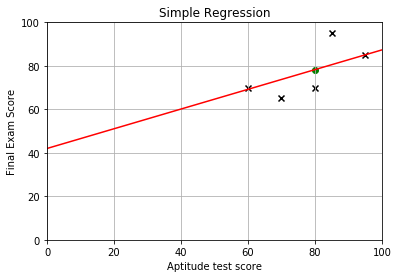

*** Iteration  90000  improvement 0.00025472581654639725  updatedRss:  354.5749907538491 
  B0:  42.010446113327475  B1:  0.45315902654378987 



[354.57499432 354.57498719]
[354.57499074 354.57499083]
[354.5747396  354.57473246]
[354.57473602 354.57473611]
[354.57448488 354.57447774]
[354.5744813  354.57448139]
[354.57423016 354.57422302]
[354.57422658 354.57422667]
[354.57397544 354.57396831]
[354.57397186 354.57397195]
[354.57372073 354.57371359]
[354.57371715 354.57371724]
[354.57346602 354.57345888]
[354.57346244 354.57346252]
[354.57321131 354.57320417]
[354.57320773 354.57320782]
[354.5729566  354.57294946]
[354.57295302 354.57295311]
[354.5727019  354.57269476]
[354.57269832 354.5726984 ]
[354.5724472  354.57244006]
[354.57244361 354.5724437 ]
[354.5721925  354.57218536]
[354.57218891 354.572189  ]
[354.5719378  354.57193066]
[354.57193422 354.57193431]
[354.5716831  354.57167597]
[354.57167952 354.57167961]
[354.57142841 354.57142127]
[354.57142483 354.57142492]
[354.57117372 

[354.49436645 354.49435932]
[354.49436287 354.49436296]
[354.49411248 354.49410535]
[354.4941089  354.49410899]
[354.49385851 354.49385139]
[354.49385494 354.49385503]
[354.49360455 354.49359742]
[354.49360097 354.49360106]
[354.49335059 354.49334346]
[354.49334701 354.4933471 ]
[354.49309663 354.49308951]
[354.49309306 354.49309314]
[354.49284268 354.49283555]
[354.4928391  354.49283919]
[354.49258872 354.4925816 ]
[354.49258515 354.49258523]
[354.49233477 354.49232765]
[354.49233119 354.49233128]
[354.49208082 354.4920737 ]
[354.49207725 354.49207734]
[354.49182688 354.49181975]
[354.4918233  354.49182339]
[354.49157293 354.49156581]
[354.49156936 354.49156944]
[354.49131899 354.49131186]
[354.49131541 354.4913155 ]
[354.49106505 354.49105793]
[354.49106147 354.49106156]
[354.49081111 354.49080399]
[354.49080754 354.49080763]
[354.49055718 354.49055005]
[354.4905536  354.49055369]
[354.49030325 354.49029612]
[354.49029967 354.49029976]
[354.49004932 354.49004219]
[354.49004574 354.49

[354.45528344 354.45527632]
[354.45527987 354.45527996]
[354.45502984 354.45502272]
[354.45502626 354.45502635]
[354.45477624 354.45476912]
[354.45477267 354.45477275]
[354.45452264 354.45451552]
[354.45451907 354.45451916]
[354.45426905 354.45426193]
[354.45426547 354.45426556]
[354.45401546 354.45400834]
[354.45401188 354.45401197]
[354.45376187 354.45375475]
[354.45375829 354.45375838]
[354.45350828 354.45350116]
[354.45350471 354.4535048 ]
[354.4532547  354.45324757]
[354.45325112 354.45325121]
[354.45300111 354.45299399]
[354.45299754 354.45299763]
[354.45274753 354.45274041]
[354.45274396 354.45274405]
[354.45249395 354.45248683]
[354.45249038 354.45249047]
[354.45224038 354.45223326]
[354.45223681 354.45223689]
[354.45198681 354.45197969]
[354.45198323 354.45198332]
[354.45173324 354.45172612]
[354.45172966 354.45172975]
[354.45147967 354.45147255]
[354.45147609 354.45147618]
[354.4512261  354.45121898]
[354.45122253 354.45122262]
[354.45097254 354.45096542]
[354.45096896 354.45

[354.39220644 354.39220653]
[354.391957   354.39194989]
[354.39195343 354.39195352]
[354.39170399 354.39169688]
[354.39170042 354.39170051]
[354.39145099 354.39144387]
[354.39144742 354.3914475 ]
[354.39119798 354.39119087]
[354.39119441 354.3911945 ]
[354.39094498 354.39093787]
[354.39094141 354.3909415 ]
[354.39069198 354.39068487]
[354.39068841 354.3906885 ]
[354.39043899 354.39043187]
[354.39043542 354.39043551]
[354.39018599 354.39017888]
[354.39018242 354.39018251]
[354.389933   354.38992589]
[354.38992943 354.38992952]
[354.38968001 354.3896729 ]
[354.38967644 354.38967653]
[354.38942703 354.38941991]
[354.38942346 354.38942355]
[354.38917404 354.38916693]
[354.38917047 354.38917056]
[354.38892106 354.38891395]
[354.38891749 354.38891758]
[354.38866808 354.38866097]
[354.38866451 354.3886646 ]
[354.3884151  354.38840799]
[354.38841153 354.38841162]
[354.38816213 354.38815502]
[354.38815856 354.38815865]
[354.38790916 354.38790204]
[354.38790559 354.38790568]
[354.38765619 354.38

[354.32903118 354.32902408]
[354.32902762 354.32902771]
[354.32877877 354.32877166]
[354.3287752  354.32877529]
[354.32852635 354.32851925]
[354.32852278 354.32852287]
[354.32827394 354.32826683]
[354.32827037 354.32827046]
[354.32802153 354.32801442]
[354.32801796 354.32801805]
[354.32776912 354.32776201]
[354.32776555 354.32776564]
[354.32751671 354.32750961]
[354.32751315 354.32751323]
[354.32726431 354.3272572 ]
[354.32726074 354.32726083]
[354.32701191 354.3270048 ]
[354.32700834 354.32700843]
[354.32675951 354.3267524 ]
[354.32675594 354.32675603]
[354.32650711 354.3265    ]
[354.32650354 354.32650363]
[354.32625471 354.32624761]
[354.32625115 354.32625124]
[354.32600232 354.32599522]
[354.32599876 354.32599885]
[354.32574993 354.32574283]
[354.32574637 354.32574646]
[354.32549755 354.32549044]
[354.32549398 354.32549407]
[354.32524516 354.32523806]
[354.3252416  354.32524168]
[354.32499278 354.32498567]
[354.32498921 354.3249893 ]
[354.3247404  354.32473329]
[354.32473683 354.32

[354.26600022 354.26599313]
[354.26599666 354.26599675]
[354.2657484 354.2657413]
[354.26574483 354.26574492]
[354.26549657 354.26548947]
[354.26549301 354.2654931 ]
[354.26524475 354.26523765]
[354.26524119 354.26524128]
[354.26499293 354.26498583]
[354.26498937 354.26498946]
[354.26474111 354.26473401]
[354.26473755 354.26473764]
[354.26448929 354.2644822 ]
[354.26448573 354.26448582]
[354.26423748 354.26423038]
[354.26423392 354.26423401]
[354.26398567 354.26397857]
[354.26398211 354.2639822 ]
[354.26373386 354.26372677]
[354.2637303  354.26373039]
[354.26348206 354.26347496]
[354.26347849 354.26347858]
[354.26323025 354.26322316]
[354.26322669 354.26322678]
[354.26297845 354.26297135]
[354.26297489 354.26297498]
[354.26272665 354.26271956]
[354.26272309 354.26272318]
[354.26247485 354.26246776]
[354.26247129 354.26247138]
[354.26222306 354.26221596]
[354.2622195  354.26221959]
[354.26197127 354.26196417]
[354.26196771 354.2619678 ]
[354.26171948 354.26171238]
[354.26171592 354.2617

[354.21266557 354.21265848]
[354.21266201 354.2126621 ]
[354.21241424 354.21240715]
[354.21241068 354.21241077]
[354.21216292 354.21215583]
[354.21215936 354.21215945]
[354.21191159 354.2119045 ]
[354.21190804 354.21190812]
[354.21166027 354.21165318]
[354.21165672 354.2116568 ]
[354.21140896 354.21140187]
[354.2114054  354.21140549]
[354.21115764 354.21115055]
[354.21115408 354.21115417]
[354.21090633 354.21089924]
[354.21090277 354.21090286]
[354.21065501 354.21064793]
[354.21065146 354.21065155]
[354.21040371 354.21039662]
[354.21040015 354.21040024]
[354.2101524  354.21014531]
[354.21014884 354.21014893]
[354.2099011  354.20989401]
[354.20989754 354.20989763]
[354.20964979 354.20964271]
[354.20964624 354.20964633]
[354.2093985  354.20939141]
[354.20939494 354.20939503]
[354.2091472  354.20914011]
[354.20914364 354.20914373]
[354.2088959  354.20888881]
[354.20889235 354.20889243]
[354.20864461 354.20863752]
[354.20864105 354.20864114]
[354.20839332 354.20838623]
[354.20838976 354.20

[354.14063116 354.14062408]
[354.14062761 354.1406277 ]
[354.14038051 354.14037343]
[354.14037695 354.14037704]
[354.14012986 354.14012278]
[354.1401263  354.14012639]
[354.13987921 354.13987213]
[354.13987566 354.13987575]
[354.13962856 354.13962148]
[354.13962501 354.1396251 ]
[354.13937792 354.13937084]
[354.13937437 354.13937446]
[354.13912728 354.1391202 ]
[354.13912373 354.13912382]
[354.13887664 354.13886956]
[354.13887309 354.13887318]
[354.13862601 354.13861893]
[354.13862245 354.13862254]
[354.13837537 354.13836829]
[354.13837182 354.13837191]
[354.13812474 354.13811766]
[354.13812119 354.13812128]
[354.13787411 354.13786703]
[354.13787056 354.13787065]
[354.13762349 354.13761641]
[354.13761993 354.13762002]
[354.13737286 354.13736578]
[354.13736931 354.1373694 ]
[354.13712224 354.13711516]
[354.13711869 354.13711878]
[354.13687162 354.13686454]
[354.13686807 354.13686816]
[354.136621   354.13661392]
[354.13661745 354.13661754]
[354.13637039 354.13636331]
[354.13636684 354.13

[354.08829584 354.08828877]
[354.08829229 354.08829238]
[354.08804568 354.08803861]
[354.08804213 354.08804222]
[354.08779552 354.08778845]
[354.08779197 354.08779206]
[354.08754536 354.08753829]
[354.08754181 354.0875419 ]
[354.08729521 354.08728814]
[354.08729166 354.08729175]
[354.08704506 354.08703798]
[354.08704151 354.0870416 ]
[354.08679491 354.08678783]
[354.08679136 354.08679145]
[354.08654476 354.08653769]
[354.08654121 354.0865413 ]
[354.08629461 354.08628754]
[354.08629106 354.08629115]
[354.08604447 354.0860374 ]
[354.08604092 354.08604101]
[354.08579433 354.08578726]
[354.08579078 354.08579087]
[354.08554419 354.08553712]
[354.08554064 354.08554073]
[354.08529405 354.08528698]
[354.08529051 354.08529059]
[354.08504392 354.08503685]
[354.08504037 354.08504046]
[354.08479379 354.08478672]
[354.08479024 354.08479033]
[354.08454366 354.08453659]
[354.08454011 354.0845402 ]
[354.08429353 354.08428646]
[354.08428998 354.08429007]
[354.08404341 354.08403634]
[354.08403986 354.08

[354.01584352 354.01584361]
[354.01559758 354.01559052]
[354.01559404 354.01559413]
[354.0153481  354.01534104]
[354.01534456 354.01534465]
[354.01509862 354.01509156]
[354.01509508 354.01509517]
[354.01484915 354.01484209]
[354.0148456  354.01484569]
[354.01459967 354.01459261]
[354.01459613 354.01459622]
[354.0143502  354.01434314]
[354.01434666 354.01434675]
[354.01410073 354.01409367]
[354.01409719 354.01409728]
[354.01385127 354.01384421]
[354.01384772 354.01384781]
[354.0136018  354.01359474]
[354.01359826 354.01359835]
[354.01335234 354.01334528]
[354.0133488  354.01334889]
[354.01310288 354.01309582]
[354.01309934 354.01309943]
[354.01285343 354.01284636]
[354.01284988 354.01284997]
[354.01260397 354.01259691]
[354.01260043 354.01260052]
[354.01235452 354.01234746]
[354.01235097 354.01235106]
[354.01210507 354.01209801]
[354.01210152 354.01210161]
[354.01185562 354.01184856]
[354.01185208 354.01185216]
[354.01160618 354.01159911]
[354.01160263 354.01160272]
[354.01135673 354.01

[353.9612661  353.96125905]
[353.96126256 353.96126265]
[353.96101713 353.96101008]
[353.96101359 353.96101368]
[353.96076816 353.96076111]
[353.96076462 353.96076471]
[353.9605192  353.96051214]
[353.96051566 353.96051574]
[353.96027023 353.96026318]
[353.96026669 353.96026678]
[353.96002127 353.96001421]
[353.96001773 353.96001782]
[353.95977231 353.95976525]
[353.95976877 353.95976886]
[353.95952335 353.9595163 ]
[353.95951981 353.9595199 ]
[353.9592744  353.95926734]
[353.95927086 353.95927095]
[353.95902545 353.95901839]
[353.95902191 353.95902199]
[353.9587765  353.95876944]
[353.95877295 353.95877304]
[353.95852755 353.95852049]
[353.95852401 353.9585241 ]
[353.9582786  353.95827155]
[353.95827506 353.95827515]
[353.95802966 353.9580226 ]
[353.95802612 353.95802621]
[353.95778072 353.95777366]
[353.95777718 353.95777727]
[353.95753178 353.95752472]
[353.95752824 353.95752833]
[353.95728284 353.95727579]
[353.9572793  353.95727939]
[353.95703391 353.95702685]
[353.95703037 353.95

[353.89139689 353.89138985]
[353.89139336 353.89139345]
[353.89114858 353.89114153]
[353.89114504 353.89114513]
[353.89090026 353.89089322]
[353.89089673 353.89089682]
[353.89065195 353.8906449 ]
[353.89064842 353.8906485 ]
[353.89040364 353.8903966 ]
[353.89040011 353.89040019]
[353.89015533 353.89014829]
[353.8901518  353.89015189]
[353.88990703 353.88989998]
[353.88990349 353.88990358]
[353.88965873 353.88965168]
[353.88965519 353.88965528]
[353.88941043 353.88940338]
[353.88940689 353.88940698]
[353.88916213 353.88915508]
[353.88915859 353.88915868]
[353.88891383 353.88890679]
[353.8889103  353.88891039]
[353.88866554 353.88865849]
[353.888662   353.88866209]
[353.88841725 353.8884102 ]
[353.88841371 353.8884138 ]
[353.88816896 353.88816192]
[353.88816543 353.88816551]
[353.88792068 353.88791363]
[353.88791714 353.88791723]
[353.88767239 353.88766535]
[353.88766886 353.88766894]
[353.88742411 353.88741706]
[353.88742057 353.88742066]
[353.88717583 353.88716878]
[353.88717229 353.88

[353.84103635 353.84102931]
[353.84103281 353.8410329 ]
[353.8407885  353.84078146]
[353.84078497 353.84078506]
[353.84054066 353.84053362]
[353.84053713 353.84053722]
[353.84029282 353.84028578]
[353.84028929 353.84028938]
[353.84004498 353.84003794]
[353.84004145 353.84004154]
[353.83979715 353.83979011]
[353.83979361 353.8397937 ]
[353.83954931 353.83954227]
[353.83954578 353.83954587]
[353.83930148 353.83929444]
[353.83929795 353.83929804]
[353.83905366 353.83904662]
[353.83905012 353.83905021]
[353.83880583 353.83879879]
[353.8388023  353.83880239]
[353.83855801 353.83855097]
[353.83855447 353.83855456]
[353.83831019 353.83830315]
[353.83830665 353.83830674]
[353.83806237 353.83805533]
[353.83805883 353.83805892]
[353.83781455 353.83780751]
[353.83781102 353.83781111]
[353.83756674 353.8375597 ]
[353.8375632  353.83756329]
[353.83731892 353.83731188]
[353.83731539 353.83731548]
[353.83707111 353.83706407]
[353.83706758 353.83706767]
[353.83682331 353.83681627]
[353.83681977 353.83

[353.77148337 353.77147634]
[353.77147984 353.77147993]
[353.77123617 353.77122914]
[353.77123265 353.77123273]
[353.77098898 353.77098195]
[353.77098546 353.77098554]
[353.7707418  353.77073477]
[353.77073827 353.77073836]
[353.77049461 353.77048758]
[353.77049108 353.77049117]
[353.77024743 353.7702404 ]
[353.7702439  353.77024399]
[353.77000025 353.76999322]
[353.76999672 353.76999681]
[353.76975307 353.76974604]
[353.76974954 353.76974963]
[353.76950589 353.76949886]
[353.76950236 353.76950245]
[353.76925872 353.76925169]
[353.76925519 353.76925528]
[353.76901155 353.76900452]
[353.76900802 353.76900811]
[353.76876438 353.76875735]
[353.76876085 353.76876094]
[353.76851721 353.76851018]
[353.76851368 353.76851377]
[353.76827005 353.76826301]
[353.76826652 353.76826661]
[353.76802288 353.76801585]
[353.76801935 353.76801944]
[353.76777572 353.76776869]
[353.76777219 353.76777228]
[353.76752856 353.76752153]
[353.76752504 353.76752512]
[353.76728141 353.76727438]
[353.76727788 353.76

[353.67648529 353.67647828]
[353.67648177 353.67648186]
[353.67623899 353.67623197]
[353.67623547 353.67623556]
[353.67599269 353.67598567]
[353.67598917 353.67598926]
[353.67574639 353.67573938]
[353.67574287 353.67574296]
[353.6755001  353.67549308]
[353.67549658 353.67549667]
[353.67525381 353.67524679]
[353.67525028 353.67525037]
[353.67500752 353.6750005 ]
[353.67500399 353.67500408]
[353.67476123 353.67475421]
[353.67475771 353.67475779]
[353.67451494 353.67450792]
[353.67451142 353.67451151]
[353.67426866 353.67426164]
[353.67426514 353.67426522]
[353.67402238 353.67401536]
[353.67401885 353.67401894]
[353.6737761  353.67376908]
[353.67377258 353.67377266]
[353.67352982 353.6735228 ]
[353.6735263  353.67352639]
[353.67328355 353.67327653]
[353.67328002 353.67328011]
[353.67303727 353.67303026]
[353.67303375 353.67303384]
[353.672791   353.67278399]
[353.67278748 353.67278757]
[353.67254474 353.67253772]
[353.67254122 353.6725413 ]
[353.67229847 353.67229145]
[353.67229495 353.67

[353.588211   353.58820399]
[353.58820748 353.58820757]
[353.58796552 353.58795851]
[353.587962   353.58796209]
[353.58772005 353.58771304]
[353.58771653 353.58771662]
[353.58747458 353.58746757]
[353.58747106 353.58747115]
[353.58722911 353.5872221 ]
[353.58722559 353.58722568]
[353.58698364 353.58697664]
[353.58698013 353.58698022]
[353.58673818 353.58673117]
[353.58673466 353.58673475]
[353.58649272 353.58648571]
[353.5864892  353.58648929]
[353.58624726 353.58624025]
[353.58624375 353.58624383]
[353.5860018 353.5859948]
[353.58599829 353.58599838]
[353.58575635 353.58574934]
[353.58575283 353.58575292]
[353.5855109  353.58550389]
[353.58550738 353.58550747]
[353.58526545 353.58525844]
[353.58526193 353.58526202]
[353.58502  353.585013]
[353.58501649 353.58501657]
[353.58477456 353.58476755]
[353.58477104 353.58477113]
[353.58452911 353.58452211]
[353.5845256  353.58452569]
[353.58428367 353.58427667]
[353.58428016 353.58428025]
[353.58403824 353.58403123]
[353.58403472 353.58403481

[353.48164633 353.48163934]
[353.48164282 353.48164291]
[353.48140186 353.48139486]
[353.48139835 353.48139843]
[353.48115738 353.48115039]
[353.48115387 353.48115396]
[353.48091291 353.48090592]
[353.4809094  353.48090949]
[353.48066844 353.48066145]
[353.48066493 353.48066502]
[353.48042397 353.48041698]
[353.48042047 353.48042055]
[353.48017951 353.48017252]
[353.480176   353.48017609]
[353.47993505 353.47992806]
[353.47993154 353.47993163]
[353.47969059 353.4796836 ]
[353.47968708 353.47968717]
[353.47944613 353.47943914]
[353.47944262 353.47944271]
[353.47920167 353.47919468]
[353.47919817 353.47919825]
[353.47895722 353.47895023]
[353.47895371 353.4789538 ]
[353.47871277 353.47870578]
[353.47870926 353.47870935]
[353.47846832 353.47846133]
[353.47846481 353.4784649 ]
[353.47822388 353.47821688]
[353.47822037 353.47822046]
[353.47797943 353.47797244]
[353.47797592 353.47797601]
[353.47773499 353.477728  ]
[353.47773148 353.47773157]
[353.47749055 353.47748356]
[353.47748704 353.47

[353.39037193 353.39036495]
[353.39036843 353.39036852]
[353.39012831 353.39012133]
[353.39012481 353.3901249 ]
[353.38988469 353.38987771]
[353.38988119 353.38988128]
[353.38964108 353.3896341 ]
[353.38963757 353.38963766]
[353.38939746 353.38939048]
[353.38939396 353.38939405]
[353.38915385 353.38914687]
[353.38915035 353.38915044]
[353.38891024 353.38890326]
[353.38890674 353.38890683]
[353.38866664 353.38865966]
[353.38866313 353.38866322]
[353.38842303 353.38841605]
[353.38841953 353.38841962]
[353.38817943 353.38817245]
[353.38817593 353.38817601]
[353.38793583 353.38792885]
[353.38793233 353.38793241]
[353.38769223 353.38768525]
[353.38768873 353.38768882]
[353.38744864 353.38744166]
[353.38744513 353.38744522]
[353.38720504 353.38719806]
[353.38720154 353.38720163]
[353.38696145 353.38695447]
[353.38695795 353.38695804]
[353.38671786 353.38671088]
[353.38671436 353.38671445]
[353.38647428 353.3864673 ]
[353.38647077 353.38647086]
[353.38623069 353.38622371]
[353.38622719 353.38

[353.30961523 353.30960827]
[353.30961174 353.30961182]
[353.30937237 353.3093654 ]
[353.30936887 353.30936896]
[353.30912951 353.30912254]
[353.30912601 353.3091261 ]
[353.30888665 353.30887968]
[353.30888315 353.30888324]
[353.30864379 353.30863682]
[353.3086403  353.30864038]
[353.30840094 353.30839397]
[353.30839744 353.30839753]
[353.30815809 353.30815112]
[353.30815459 353.30815468]
[353.30791524 353.30790827]
[353.30791174 353.30791183]
[353.30767239 353.30766542]
[353.30766889 353.30766898]
[353.30742954 353.30742257]
[353.30742605 353.30742613]
[353.3071867  353.30717973]
[353.3071832  353.30718329]
[353.30694386 353.30693689]
[353.30694036 353.30694045]
[353.30670102 353.30669405]
[353.30669752 353.30669761]
[353.30645818 353.30645122]
[353.30645469 353.30645477]
[353.30621535 353.30620838]
[353.30621185 353.30621194]
[353.30597252 353.30596555]
[353.30596902 353.30596911]
[353.30572969 353.30572272]
[353.30572619 353.30572628]
[353.30548686 353.30547989]
[353.30548336 353.30

[353.1981379  353.19813095]
[353.19813441 353.1981345 ]
[353.19789608 353.19788913]
[353.19789259 353.19789268]
[353.19765427 353.19764731]
[353.19765078 353.19765086]
[353.19741245 353.1974055 ]
[353.19740896 353.19740905]
[353.19717064 353.19716369]
[353.19716715 353.19716724]
[353.19692883 353.19692188]
[353.19692534 353.19692543]
[353.19668702 353.19668007]
[353.19668353 353.19668362]
[353.19644522 353.19643826]
[353.19644173 353.19644182]
[353.19620341 353.19619646]
[353.19619993 353.19620001]
[353.19596161 353.19595466]
[353.19595812 353.19595821]
[353.19571982 353.19571286]
[353.19571633 353.19571641]
[353.19547802 353.19547107]
[353.19547453 353.19547462]
[353.19523623 353.19522927]
[353.19523274 353.19523282]
[353.19499443 353.19498748]
[353.19499094 353.19499103]
[353.19475264 353.19474569]
[353.19474916 353.19474924]
[353.19451086 353.1945039 ]
[353.19450737 353.19450746]
[353.19426907 353.19426212]
[353.19426558 353.19426567]
[353.19402729 353.19402034]
[353.1940238  353.19

[353.09749577 353.09748883]
[353.09749229 353.09749237]
[353.09725489 353.09724795]
[353.09725141 353.0972515 ]
[353.09701402 353.09700708]
[353.09701054 353.09701062]
[353.09677315 353.09676621]
[353.09676967 353.09676975]
[353.09653228 353.09652534]
[353.0965288  353.09652888]
[353.09629141 353.09628447]
[353.09628793 353.09628802]
[353.09605055 353.09604361]
[353.09604707 353.09604715]
[353.09580969 353.09580275]
[353.0958062  353.09580629]
[353.09556883 353.09556189]
[353.09556534 353.09556543]
[353.09532797 353.09532103]
[353.09532449 353.09532457]
[353.09508711 353.09508017]
[353.09508363 353.09508372]
[353.09484626 353.09483932]
[353.09484278 353.09484286]
[353.09460541 353.09459847]
[353.09460193 353.09460201]
[353.09436456 353.09435762]
[353.09436108 353.09436117]
[353.09412371 353.09411677]
[353.09412023 353.09412032]
[353.09388287 353.09387593]
[353.09387939 353.09387948]
[353.09364203 353.09363509]
[353.09363855 353.09363863]
[353.09340119 353.09339425]
[353.09339771 353.09

[352.99196814 352.99196121]
[352.99196466 352.99196475]
[352.99172825 352.99172133]
[352.99172478 352.99172486]
[352.99148837 352.99148144]
[352.99148489 352.99148498]
[352.99124849 352.99124156]
[352.99124501 352.9912451 ]
[352.99100861 352.99100168]
[352.99100513 352.99100522]
[352.99076873 352.9907618 ]
[352.99076525 352.99076534]
[352.99052885 352.99052193]
[352.99052538 352.99052546]
[352.99028898 352.99028205]
[352.9902855  352.99028559]
[352.99004911 352.99004218]
[352.99004563 352.99004572]
[352.98980924 352.98980231]
[352.98980577 352.98980585]
[352.98956937 352.98956245]
[352.9895659  352.98956599]
[352.98932951 352.98932258]
[352.98932603 352.98932612]
[352.98908965 352.98908272]
[352.98908617 352.98908626]
[352.98884979 352.98884286]
[352.98884631 352.9888464 ]
[352.98860993 352.98860301]
[352.98860646 352.98860654]
[352.98837008 352.98836315]
[352.9883666  352.98836669]
[352.98813022 352.9881233 ]
[352.98812675 352.98812684]
[352.98789037 352.98788345]
[352.9878869  352.98

[352.88305166 352.88304475]
[352.88304819 352.88304828]
[352.88281279 352.88280588]
[352.88280933 352.88280941]
[352.88257393 352.88256702]
[352.88257046 352.88257055]
[352.88233507 352.88232816]
[352.8823316  352.88233169]
[352.88209621 352.8820893 ]
[352.88209274 352.88209283]
[352.88185735 352.88185044]
[352.88185389 352.88185397]
[352.8816185  352.88161159]
[352.88161503 352.88161512]
[352.88137965 352.88137274]
[352.88137618 352.88137627]
[352.8811408  352.88113389]
[352.88113733 352.88113742]
[352.88090195 352.88089504]
[352.88089848 352.88089857]
[352.8806631  352.88065619]
[352.88065964 352.88065972]
[352.88042426 352.88041735]
[352.88042079 352.88042088]
[352.88018542 352.88017851]
[352.88018195 352.88018204]
[352.87994658 352.87993967]
[352.87994311 352.8799432 ]
[352.87970774 352.87970083]
[352.87970428 352.87970436]
[352.87946891 352.879462  ]
[352.87946544 352.87946553]
[352.87923008 352.87922317]
[352.87922661 352.8792267 ]
[352.87899125 352.87898434]
[352.87898778 352.87

[352.79506204 352.79505514]
[352.79505858 352.79505867]
[352.794824  352.7948171]
[352.79482054 352.79482063]
[352.79458596 352.79457906]
[352.7945825  352.79458259]
[352.79434793 352.79434103]
[352.79434446 352.79434455]
[352.79410989 352.79410299]
[352.79410643 352.79410652]
[352.79387186 352.79386496]
[352.7938684  352.79386848]
[352.79363383 352.79362693]
[352.79363037 352.79363045]
[352.7933958 352.7933889]
[352.79339234 352.79339243]
[352.79315778 352.79315088]
[352.79315432 352.7931544 ]
[352.79291975 352.79291285]
[352.79291629 352.79291638]
[352.79268173 352.79267483]
[352.79267827 352.79267836]
[352.79244371 352.79243682]
[352.79244025 352.79244034]
[352.7922057 352.7921988]
[352.79220224 352.79220232]
[352.79196768 352.79196078]
[352.79196422 352.79196431]
[352.79172967 352.79172277]
[352.79172621 352.7917263 ]
[352.79149166 352.79148476]
[352.7914882  352.79148829]
[352.79125365 352.79124676]
[352.79125019 352.79125028]
[352.79101565 352.79100875]
[352.79101219 352.79101227

[352.6959922  352.69598531]
[352.69598874 352.69598883]
[352.69575508 352.6957482 ]
[352.69575163 352.69575172]
[352.69551797 352.69551109]
[352.69551452 352.6955146 ]
[352.69528087 352.69527398]
[352.69527741 352.6952775 ]
[352.69504376 352.69503687]
[352.6950403  352.69504039]
[352.69480666 352.69479977]
[352.6948032  352.69480329]
[352.69456955 352.69456267]
[352.6945661  352.69456619]
[352.69433246 352.69432557]
[352.694329   352.69432909]
[352.69409536 352.69408847]
[352.6940919  352.69409199]
[352.69385826 352.69385138]
[352.69385481 352.6938549 ]
[352.69362117 352.69361429]
[352.69361772 352.6936178 ]
[352.69338408 352.6933772 ]
[352.69338063 352.69338071]
[352.69314699 352.69314011]
[352.69314354 352.69314362]
[352.69290991 352.69290302]
[352.69290645 352.69290654]
[352.69267282 352.69266594]
[352.69266937 352.69266946]
[352.69243574 352.69242886]
[352.69243229 352.69243237]
[352.69219866 352.69219178]
[352.69219521 352.69219529]
[352.69196159 352.6919547 ]
[352.69195813 352.69

[352.59494702 352.59494015]
[352.59494357 352.59494366]
[352.59471085 352.59470398]
[352.5947074  352.59470749]
[352.59447469 352.59446782]
[352.59447124 352.59447133]
[352.59423853 352.59423166]
[352.59423508 352.59423517]
[352.59400237 352.5939955 ]
[352.59399892 352.59399901]
[352.59376621 352.59375934]
[352.59376277 352.59376285]
[352.59353006 352.59352319]
[352.59352661 352.5935267 ]
[352.59329391 352.59328703]
[352.59329046 352.59329054]
[352.59305776 352.59305088]
[352.59305431 352.59305439]
[352.59282161 352.59281474]
[352.59281816 352.59281825]
[352.59258546 352.59257859]
[352.59258202 352.5925821 ]
[352.59234932 352.59234245]
[352.59234587 352.59234596]
[352.59211318 352.59210631]
[352.59210973 352.59210982]
[352.59187704 352.59187017]
[352.59187359 352.59187368]
[352.5916409  352.59163403]
[352.59163746 352.59163754]
[352.59140477 352.5913979 ]
[352.59140132 352.59140141]
[352.59116864 352.59116177]
[352.59116519 352.59116528]
[352.59093251 352.59092564]
[352.59092906 352.59

[352.49383154 352.49383163]
[352.49359976 352.4935929 ]
[352.49359632 352.49359641]
[352.49336455 352.49335769]
[352.49336111 352.49336119]
[352.49312933 352.49312248]
[352.49312589 352.49312598]
[352.49289412 352.49288726]
[352.49289068 352.49289077]
[352.49265891 352.49265206]
[352.49265547 352.49265556]
[352.49242371 352.49241685]
[352.49242027 352.49242035]
[352.4921885  352.49218164]
[352.49218506 352.49218515]
[352.4919533  352.49194644]
[352.49194986 352.49194995]
[352.4917181  352.49171124]
[352.49171466 352.49171475]
[352.4914829  352.49147604]
[352.49147946 352.49147955]
[352.49124771 352.49124085]
[352.49124427 352.49124435]
[352.49101251 352.49100565]
[352.49100907 352.49100916]
[352.49077732 352.49077046]
[352.49077388 352.49077397]
[352.49054213 352.49053527]
[352.49053869 352.49053878]
[352.49030695 352.49030009]
[352.4903035  352.49030359]
[352.49007176 352.4900649 ]
[352.49006832 352.49006841]
[352.48983658 352.48982972]
[352.48983314 352.48983322]
[352.4896014  352.48

[352.38539537 352.38539545]
[352.3851646  352.38515776]
[352.38516117 352.38516125]
[352.3849304  352.38492356]
[352.38492697 352.38492705]
[352.3846962  352.38468936]
[352.38469277 352.38469286]
[352.38446201 352.38445516]
[352.38445857 352.38445866]
[352.38422782 352.38422097]
[352.38422438 352.38422447]
[352.38399363 352.38398678]
[352.38399019 352.38399028]
[352.38375944 352.38375259]
[352.383756   352.38375609]
[352.38352525 352.38351841]
[352.38352182 352.3835219 ]
[352.38329107 352.38328422]
[352.38328763 352.38328772]
[352.38305689 352.38305004]
[352.38305345 352.38305354]
[352.38282271 352.38281586]
[352.38281927 352.38281936]
[352.38258853 352.38258169]
[352.3825851  352.38258518]
[352.38235435 352.38234751]
[352.38235092 352.38235101]
[352.38212018 352.38211334]
[352.38211675 352.38211683]
[352.38188601 352.38187917]
[352.38188258 352.38188266]
[352.38165184 352.381645  ]
[352.38164841 352.38164849]
[352.38141767 352.38141083]
[352.38141424 352.38141433]
[352.38118351 352.38

[352.26857148 352.26856465]
[352.26856806 352.26856814]
[352.26833838 352.26833155]
[352.26833495 352.26833504]
[352.26810527 352.26809844]
[352.26810185 352.26810193]
[352.26787217 352.26786534]
[352.26786874 352.26786883]
[352.26763907 352.26763224]
[352.26763564 352.26763573]
[352.26740597 352.26739914]
[352.26740255 352.26740263]
[352.26717288 352.26716605]
[352.26716945 352.26716954]
[352.26693978 352.26693295]
[352.26693636 352.26693644]
[352.26670669 352.26669986]
[352.26670327 352.26670335]
[352.2664736  352.26646677]
[352.26647018 352.26647026]
[352.26624052 352.26623369]
[352.26623709 352.26623718]
[352.26600743 352.2660006 ]
[352.26600401 352.26600409]
[352.26577435 352.26576752]
[352.26577092 352.26577101]
[352.26554127 352.26553444]
[352.26553784 352.26553793]
[352.26530819 352.26530136]
[352.26530476 352.26530485]
[352.26507511 352.26506829]
[352.26507169 352.26507177]
[352.26484204 352.26483521]
[352.26483862 352.2648387 ]
[352.26460897 352.26460214]
[352.26460554 352.26

[352.15229037 352.15228356]
[352.15228695 352.15228703]
[352.15205835 352.15205154]
[352.15205493 352.15205502]
[352.15182634 352.15181952]
[352.15182292 352.151823  ]
[352.15159432 352.15158751]
[352.15159091 352.15159099]
[352.15136231 352.1513555 ]
[352.1513589  352.15135898]
[352.15113031 352.15112349]
[352.15112689 352.15112697]
[352.1508983  352.15089149]
[352.15089488 352.15089497]
[352.1506663  352.15065948]
[352.15066288 352.15066296]
[352.15043429 352.15042748]
[352.15043088 352.15043096]
[352.1502023  352.15019548]
[352.15019888 352.15019896]
[352.1499703  352.14996349]
[352.14996688 352.14996697]
[352.1497383  352.14973149]
[352.14973489 352.14973497]
[352.14950631 352.1494995 ]
[352.14950289 352.14950298]
[352.14927432 352.14926751]
[352.1492709  352.14927099]
[352.14904233 352.14903552]
[352.14903891 352.149039  ]
[352.14881035 352.14880353]
[352.14880693 352.14880701]
[352.14857836 352.14857155]
[352.14857494 352.14857503]
[352.14834638 352.14833957]
[352.14834296 352.14

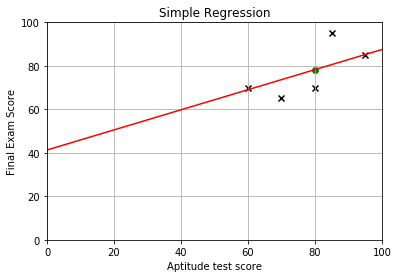

*** Iteration  100000  improvement 0.00023193618204686572  updatedRss:  352.14347185770316 
  B0:  41.313208897814775  B1:  0.461888514080033 



[352.14347526 352.14346845]
[352.14347185 352.14347193]
[352.14324333 352.14323652]
[352.14323991 352.14324   ]
[352.1430114  352.14300459]
[352.14300798 352.14300807]
[352.14277947 352.14277266]
[352.14277605 352.14277614]
[352.14254754 352.14254073]
[352.14254412 352.14254421]
[352.14231561 352.1423088 ]
[352.1423122  352.14231228]
[352.14208369 352.14207688]
[352.14208027 352.14208036]
[352.14185177 352.14184496]
[352.14184835 352.14184844]
[352.14161985 352.14161304]
[352.14161644 352.14161652]
[352.14138793 352.14138112]
[352.14138452 352.1413846 ]
[352.14115602 352.14114921]
[352.1411526  352.14115269]
[352.14092411 352.1409173 ]
[352.14092069 352.14092078]
[352.1406922  352.14068539]
[352.14068878 352.14068887]
[352.14046029 352.14045348]
[352.14045687 352.14045696]
[352.14022838 352.14022157]
[352.14022497 352.14022505]
[352.13999648 

[352.10917266 352.10916586]
[352.10916925 352.10916933]
[352.10894105 352.10893425]
[352.10893764 352.10893772]
[352.10870944 352.10870263]
[352.10870603 352.10870611]
[352.10847783 352.10847103]
[352.10847442 352.1084745 ]
[352.10824623 352.10823942]
[352.10824281 352.1082429 ]
[352.10801462 352.10800782]
[352.10801121 352.10801129]
[352.10778302 352.10777622]
[352.10777961 352.10777969]
[352.10755142 352.10754462]
[352.10754801 352.10754809]
[352.10731982 352.10731302]
[352.10731641 352.10731649]
[352.10708823 352.10708142]
[352.10708481 352.1070849 ]
[352.10685664 352.10684983]
[352.10685322 352.10685331]
[352.10662504 352.10661824]
[352.10662163 352.10662172]
[352.10639346 352.10638665]
[352.10639004 352.10639013]
[352.10616187 352.10615506]
[352.10615846 352.10615854]
[352.10593029 352.10592348]
[352.10592687 352.10592696]
[352.1056987 352.1056919]
[352.10569529 352.10569537]
[352.10546712 352.10546032]
[352.10546371 352.10546379]
[352.10523555 352.10522874]
[352.10523213 352.1052

[352.04463347 352.04463356]
[352.04440587 352.04439908]
[352.04440246 352.04440255]
[352.04417487 352.04416807]
[352.04417146 352.04417154]
[352.04394387 352.04393707]
[352.04394046 352.04394054]
[352.04371286 352.04370607]
[352.04370945 352.04370954]
[352.04348187 352.04347507]
[352.04347846 352.04347854]
[352.04325087 352.04324407]
[352.04324746 352.04324754]
[352.04301987 352.04301308]
[352.04301646 352.04301655]
[352.04278888 352.04278209]
[352.04278547 352.04278556]
[352.04255789 352.04255109]
[352.04255448 352.04255457]
[352.0423269  352.04232011]
[352.04232349 352.04232358]
[352.04209592 352.04208912]
[352.04209251 352.04209259]
[352.04186493 352.04185814]
[352.04186152 352.04186161]
[352.04163395 352.04162716]
[352.04163054 352.04163063]
[352.04140297 352.04139618]
[352.04139956 352.04139965]
[352.04117199 352.0411652 ]
[352.04116859 352.04116867]
[352.04094102 352.04093422]
[352.04093761 352.04093769]
[352.04071005 352.04070325]
[352.04070664 352.04070672]
[352.04047908 352.04

[352.00470475 352.00469796]
[352.00470135 352.00470143]
[352.00447412 352.00446733]
[352.00447071 352.0044708 ]
[352.00424349 352.0042367 ]
[352.00424008 352.00424017]
[352.00401286 352.00400607]
[352.00400945 352.00400954]
[352.00378223 352.00377544]
[352.00377882 352.00377891]
[352.00355161 352.00354482]
[352.0035482  352.00354829]
[352.00332098 352.00331419]
[352.00331758 352.00331766]
[352.00309036 352.00308357]
[352.00308696 352.00308704]
[352.00285975 352.00285295]
[352.00285634 352.00285642]
[352.00262913 352.00262234]
[352.00262572 352.00262581]
[352.00239852 352.00239172]
[352.00239511 352.00239519]
[352.0021679  352.00216111]
[352.0021645  352.00216458]
[352.00193729 352.0019305 ]
[352.00193389 352.00193397]
[352.00170669 352.0016999 ]
[352.00170328 352.00170337]
[352.00147608 352.00146929]
[352.00147267 352.00147276]
[352.00124548 352.00123869]
[352.00124207 352.00124216]
[352.00101488 352.00100809]
[352.00101147 352.00101156]
[352.00078428 352.00077749]
[352.00078087 352.00

[351.93607157 351.93606479]
[351.93606817 351.93606825]
[351.93584158 351.9358348 ]
[351.93583818 351.93583826]
[351.93561159 351.93560481]
[351.93560819 351.93560827]
[351.93538161 351.93537482]
[351.9353782  351.93537829]
[351.93515162 351.93514484]
[351.93514822 351.9351483 ]
[351.93492164 351.93491486]
[351.93491824 351.93491832]
[351.93469166 351.93468488]
[351.93468826 351.93468834]
[351.93446168 351.9344549 ]
[351.93445828 351.93445837]
[351.93423171 351.93422493]
[351.93422831 351.93422839]
[351.93400174 351.93399495]
[351.93399833 351.93399842]
[351.93377177 351.93376498]
[351.93376836 351.93376845]
[351.9335418  351.93353502]
[351.93353839 351.93353848]
[351.93331183 351.93330505]
[351.93330843 351.93330851]
[351.93308187 351.93307508]
[351.93307846 351.93307855]
[351.9328519  351.93284512]
[351.9328485  351.93284859]
[351.93262194 351.93261516]
[351.93261854 351.93261863]
[351.93239199 351.93238521]
[351.93238858 351.93238867]
[351.93216203 351.93215525]
[351.93215863 351.93

[351.90090813 351.90090136]
[351.90090473 351.90090482]
[351.90067847 351.9006717 ]
[351.90067507 351.90067516]
[351.90044881 351.90044204]
[351.90044541 351.9004455 ]
[351.90021916 351.90021238]
[351.90021576 351.90021584]
[351.8999895  351.89998273]
[351.8999861  351.89998619]
[351.89975985 351.89975307]
[351.89975645 351.89975654]
[351.8995302  351.89952343]
[351.8995268  351.89952689]
[351.89930055 351.89929378]
[351.89929715 351.89929724]
[351.89907091 351.89906413]
[351.89906751 351.89906759]
[351.89884127 351.89883449]
[351.89883787 351.89883795]
[351.89861162 351.89860485]
[351.89860822 351.89860831]
[351.89838199 351.89837521]
[351.89837859 351.89837867]
[351.89815235 351.89814557]
[351.89814895 351.89814903]
[351.89792271 351.89791594]
[351.89791931 351.8979194 ]
[351.89769308 351.8976863 ]
[351.89768968 351.89768977]
[351.89746345 351.89745667]
[351.89746005 351.89746014]
[351.89723382 351.89722705]
[351.89723042 351.89723051]
[351.8970042  351.89699742]
[351.8970008  351.89

[351.82706856 351.8270618 ]
[351.82706517 351.82706525]
[351.8268396  351.82683283]
[351.8268362  351.82683629]
[351.82661063 351.82660386]
[351.82660723 351.82660732]
[351.82638166 351.8263749 ]
[351.82637827 351.82637836]
[351.8261527  351.82614594]
[351.82614931 351.82614939]
[351.82592374 351.82591698]
[351.82592035 351.82592043]
[351.82569479 351.82568802]
[351.82569139 351.82569148]
[351.82546583 351.82545906]
[351.82546244 351.82546252]
[351.82523688 351.82523011]
[351.82523348 351.82523357]
[351.82500792 351.82500116]
[351.82500453 351.82500461]
[351.82477898 351.82477221]
[351.82477558 351.82477567]
[351.82455003 351.82454326]
[351.82454663 351.82454672]
[351.82432108 351.82431432]
[351.82431769 351.82431777]
[351.82409214 351.82408537]
[351.82408875 351.82408883]
[351.8238632  351.82385643]
[351.82385981 351.82385989]
[351.82363426 351.8236275 ]
[351.82363087 351.82363095]
[351.82340533 351.82339856]
[351.82340193 351.82340202]
[351.82317639 351.82316963]
[351.823173   351.82

[351.74500662 351.74499987]
[351.74500323 351.74500332]
[351.74477842 351.74477167]
[351.74477504 351.74477512]
[351.74455023 351.74454347]
[351.74454684 351.74454692]
[351.74432203 351.74431528]
[351.74431864 351.74431873]
[351.74409384 351.74408708]
[351.74409045 351.74409053]
[351.74386565 351.74385889]
[351.74386226 351.74386234]
[351.74363746 351.7436307 ]
[351.74363407 351.74363416]
[351.74340927 351.74340252]
[351.74340588 351.74340597]
[351.74318109 351.74317433]
[351.7431777  351.74317778]
[351.74295291 351.74294615]
[351.74294952 351.7429496 ]
[351.74272473 351.74271797]
[351.74272134 351.74272142]
[351.74249655 351.74248979]
[351.74249316 351.74249324]
[351.74226837 351.74226162]
[351.74226498 351.74226507]
[351.7420402  351.74203344]
[351.74203681 351.74203689]
[351.74181203 351.74180527]
[351.74180864 351.74180872]
[351.74158386 351.7415771 ]
[351.74158047 351.74158055]
[351.74135569 351.74134894]
[351.7413523  351.74135239]
[351.74112752 351.74112077]
[351.74112414 351.74

[351.6379883  351.63798156]
[351.63798492 351.637985  ]
[351.6377611  351.63775436]
[351.63775772 351.63775781]
[351.63753391 351.63752717]
[351.63753053 351.63753061]
[351.63730672 351.63729998]
[351.63730334 351.63730342]
[351.63707953 351.63707279]
[351.63707615 351.63707623]
[351.63685234 351.6368456 ]
[351.63684896 351.63684904]
[351.63662515 351.63661841]
[351.63662177 351.63662186]
[351.63639797 351.63639123]
[351.63639459 351.63639467]
[351.63617079 351.63616405]
[351.63616741 351.63616749]
[351.63594361 351.63593687]
[351.63594023 351.63594031]
[351.63571643 351.63570969]
[351.63571305 351.63571314]
[351.63548926 351.63548252]
[351.63548588 351.63548596]
[351.63526209 351.63525535]
[351.6352587  351.63525879]
[351.63503491 351.63502817]
[351.63503153 351.63503162]
[351.63480775 351.63480101]
[351.63480436 351.63480445]
[351.63458058 351.63457384]
[351.6345772  351.63457728]
[351.63435342 351.63434668]
[351.63435003 351.63435012]
[351.63412625 351.63411951]
[351.63412287 351.63

[351.52917849 351.52917176]
[351.52917511 351.5291752 ]
[351.52895231 351.52894558]
[351.52894894 351.52894902]
[351.52872614 351.52871941]
[351.52872276 351.52872285]
[351.52849996 351.52849324]
[351.52849659 351.52849667]
[351.52827379 351.52826707]
[351.52827042 351.5282705 ]
[351.52804762 351.5280409 ]
[351.52804425 351.52804434]
[351.52782146 351.52781473]
[351.52781809 351.52781817]
[351.5275953  351.52758857]
[351.52759192 351.52759201]
[351.52736913 351.52736241]
[351.52736576 351.52736584]
[351.52714297 351.52713625]
[351.5271396  351.52713968]
[351.52691682 351.52691009]
[351.52691344 351.52691353]
[351.52669066 351.52668394]
[351.52668729 351.52668737]
[351.52646451 351.52645778]
[351.52646113 351.52646122]
[351.52623836 351.52623163]
[351.52623498 351.52623507]
[351.52601221 351.52600548]
[351.52600883 351.52600892]
[351.52578606 351.52577934]
[351.52578269 351.52578277]
[351.52555992 351.52555319]
[351.52555654 351.52555663]
[351.52533377 351.52532705]
[351.5253304  351.52

[351.42468515 351.42467844]
[351.42468179 351.42468187]
[351.42445996 351.42445325]
[351.42445659 351.42445667]
[351.42423476 351.42422805]
[351.42423139 351.42423148]
[351.42400957 351.42400286]
[351.4240062  351.42400629]
[351.42378438 351.42377767]
[351.42378101 351.42378109]
[351.42355919 351.42355248]
[351.42355582 351.42355591]
[351.423334   351.42332729]
[351.42333064 351.42333072]
[351.42310882 351.42310211]
[351.42310545 351.42310554]
[351.42288363 351.42287692]
[351.42288027 351.42288035]
[351.42265845 351.42265174]
[351.42265509 351.42265517]
[351.42243328 351.42242657]
[351.42242991 351.42242999]
[351.4222081  351.42220139]
[351.42220473 351.42220482]
[351.42198293 351.42197622]
[351.42197956 351.42197964]
[351.42175775 351.42175104]
[351.42175439 351.42175447]
[351.42153258 351.42152587]
[351.42152922 351.4215293 ]
[351.42130742 351.42130071]
[351.42130405 351.42130414]
[351.42108225 351.42107554]
[351.42107889 351.42107897]
[351.42085709 351.42085038]
[351.42085372 351.42

[351.31728117 351.31727448]
[351.31727782 351.3172779 ]
[351.31705698 351.31705029]
[351.31705363 351.31705371]
[351.3168328 351.3168261]
[351.31682944 351.31682952]
[351.31660861 351.31660191]
[351.31660525 351.31660533]
[351.31638443 351.31637773]
[351.31638107 351.31638115]
[351.31616024 351.31615355]
[351.31615688 351.31615697]
[351.31593606 351.31592937]
[351.3159327  351.31593279]
[351.31571189 351.31570519]
[351.31570853 351.31570861]
[351.31548771 351.31548101]
[351.31548435 351.31548444]
[351.31526354 351.31525684]
[351.31526018 351.31526026]
[351.31503936 351.31503267]
[351.31503601 351.31503609]
[351.31481519 351.3148085 ]
[351.31481184 351.31481192]
[351.31459103 351.31458433]
[351.31458767 351.31458775]
[351.31436686 351.31436017]
[351.3143635  351.31436359]
[351.3141427 351.314136 ]
[351.31413934 351.31413942]
[351.31391854 351.31391184]
[351.31391518 351.31391526]
[351.31369438 351.31368768]
[351.31369102 351.3136911 ]
[351.31347022 351.31346353]
[351.31346686 351.313466

[351.21370538 351.21369869]
[351.21370202 351.21370211]
[351.21348216 351.21347547]
[351.2134788  351.21347889]
[351.21325894 351.21325226]
[351.21325559 351.21325567]
[351.21303572 351.21302904]
[351.21303237 351.21303246]
[351.21281251 351.21280583]
[351.21280916 351.21280924]
[351.2125893  351.21258262]
[351.21258595 351.21258603]
[351.21236609 351.21235941]
[351.21236274 351.21236282]
[351.21214288 351.2121362 ]
[351.21213953 351.21213961]
[351.21191968 351.211913  ]
[351.21191633 351.21191641]
[351.21169647 351.21168979]
[351.21169312 351.21169321]
[351.21147327 351.21146659]
[351.21146992 351.21147   ]
[351.21125007 351.21124339]
[351.21124672 351.21124681]
[351.21102688 351.2110202 ]
[351.21102353 351.21102361]
[351.21080368 351.210797  ]
[351.21080033 351.21080041]
[351.21058049 351.21057381]
[351.21057714 351.21057722]
[351.2103573  351.21035062]
[351.21035395 351.21035403]
[351.21013411 351.21012743]
[351.21013076 351.21013084]
[351.20991092 351.20990424]
[351.20990757 351.20

[351.11080032 351.11079366]
[351.11079698 351.11079706]
[351.11057807 351.1105714 ]
[351.11057472 351.11057481]
[351.11035582 351.11034915]
[351.11035247 351.11035256]
[351.11013356 351.1101269 ]
[351.11013022 351.1101303 ]
[351.10991132 351.10990465]
[351.10990797 351.10990805]
[351.10968907 351.1096824 ]
[351.10968572 351.10968581]
[351.10946682 351.10946016]
[351.10946348 351.10946356]
[351.10924458 351.10923791]
[351.10924124 351.10924132]
[351.10902234 351.10901567]
[351.109019   351.10901908]
[351.1088001  351.10879344]
[351.10879676 351.10879684]
[351.10857786 351.1085712 ]
[351.10857452 351.1085746 ]
[351.10835563 351.10834896]
[351.10835229 351.10835237]
[351.1081334  351.10812673]
[351.10813005 351.10813014]
[351.10791117 351.1079045 ]
[351.10790782 351.10790791]
[351.10768894 351.10768227]
[351.1076856  351.10768568]
[351.10746671 351.10746005]
[351.10746337 351.10746345]
[351.10724449 351.10723782]
[351.10724115 351.10724123]
[351.10702227 351.1070156 ]
[351.10701892 351.10

[351.07726336 351.0772567 ]
[351.07726002 351.0772601 ]
[351.07704142 351.07703475]
[351.07703808 351.07703816]
[351.07681948 351.07681282]
[351.07681614 351.07681622]
[351.07659754 351.07659088]
[351.0765942  351.07659428]
[351.07637561 351.07636894]
[351.07637227 351.07637235]
[351.07615367 351.07614701]
[351.07615033 351.07615042]
[351.07593174 351.07592508]
[351.0759284  351.07592849]
[351.07570981 351.07570315]
[351.07570647 351.07570656]
[351.07548789 351.07548123]
[351.07548455 351.07548463]
[351.07526596 351.0752593 ]
[351.07526262 351.07526271]
[351.07504404 351.07503738]
[351.0750407  351.07504078]
[351.07482212 351.07481546]
[351.07481878 351.07481886]
[351.0746002  351.07459354]
[351.07459686 351.07459695]
[351.07437829 351.07437163]
[351.07437495 351.07437503]
[351.07415637 351.07414971]
[351.07415303 351.07415312]
[351.07393446 351.0739278 ]
[351.07393112 351.0739312 ]
[351.07371255 351.07370589]
[351.07370921 351.07370929]
[351.07349064 351.07348398]
[351.0734873  351.07

[351.02184282 351.02183616]
[351.02183948 351.02183956]
[351.02162139 351.02161474]
[351.02161806 351.02161814]
[351.02139997 351.02139332]
[351.02139664 351.02139672]
[351.02117856 351.0211719 ]
[351.02117522 351.0211753 ]
[351.02095714 351.02095049]
[351.0209538  351.02095389]
[351.02073573 351.02072907]
[351.02073239 351.02073247]
[351.02051432 351.02050766]
[351.02051098 351.02051106]
[351.02029291 351.02028625]
[351.02028957 351.02028965]
[351.0200715  351.02006485]
[351.02006816 351.02006825]
[351.0198501  351.01984344]
[351.01984676 351.01984684]
[351.01962869 351.01962204]
[351.01962536 351.01962544]
[351.01940729 351.01940064]
[351.01940396 351.01940404]
[351.01918589 351.01917924]
[351.01918256 351.01918264]
[351.0189645  351.01895784]
[351.01896116 351.01896124]
[351.0187431  351.01873645]
[351.01873977 351.01873985]
[351.01852171 351.01851506]
[351.01851837 351.01851846]
[351.01830032 351.01829367]
[351.01829698 351.01829707]
[351.01807893 351.01807228]
[351.01807559 351.01

[350.97384295 350.9738363 ]
[350.97383962 350.9738397 ]
[350.97362198 350.97361533]
[350.97361864 350.97361873]
[350.97340101 350.97339436]
[350.97339767 350.97339776]
[350.97318004 350.97317339]
[350.97317671 350.97317679]
[350.97295908 350.97295243]
[350.97295574 350.97295582]
[350.97273811 350.97273146]
[350.97273478 350.97273486]
[350.97251715 350.9725105 ]
[350.97251382 350.9725139 ]
[350.97229619 350.97228954]
[350.97229286 350.97229294]
[350.97207523 350.97206859]
[350.9720719  350.97207198]
[350.97185428 350.97184763]
[350.97185095 350.97185103]
[350.97163333 350.97162668]
[350.97162999 350.97163008]
[350.97141238 350.97140573]
[350.97140904 350.97140912]
[350.97119143 350.97118478]
[350.97118809 350.97118818]
[350.97097048 350.97096383]
[350.97096715 350.97096723]
[350.97074954 350.97074289]
[350.9707462  350.97074628]
[350.97052859 350.97052195]
[350.97052526 350.97052534]
[350.97030765 350.97030101]
[350.97030432 350.9703044 ]
[350.97008671 350.97008007]
[350.97008338 350.97

[350.91910537 350.91909873]
[350.91910204 350.91910212]
[350.91888491 350.91887827]
[350.91888158 350.91888166]
[350.91866445 350.91865781]
[350.91866112 350.9186612 ]
[350.918444   350.91843736]
[350.91844067 350.91844075]
[350.91822354 350.91821691]
[350.91822021 350.9182203 ]
[350.91800309 350.91799646]
[350.91799976 350.91799985]
[350.91778265 350.91777601]
[350.91777932 350.9177794 ]
[350.9175622  350.91755556]
[350.91755887 350.91755895]
[350.91734176 350.91733512]
[350.91733843 350.91733851]
[350.91712131 350.91711467]
[350.91711798 350.91711807]
[350.91690087 350.91689423]
[350.91689754 350.91689763]
[350.91668044 350.9166738 ]
[350.91667711 350.91667719]
[350.91646    350.91645336]
[350.91645667 350.91645675]
[350.91623957 350.91623293]
[350.91623624 350.91623632]
[350.91601913 350.9160125 ]
[350.9160158  350.91601589]
[350.9157987  350.91579207]
[350.91579537 350.91579546]
[350.91557828 350.91557164]
[350.91557495 350.91557503]
[350.91535785 350.91535121]
[350.91535452 350.91

[350.85833714 350.85833051]
[350.85833381 350.85833389]
[350.85811725 350.85811062]
[350.85811392 350.85811401]
[350.85789736 350.85789073]
[350.85789404 350.85789412]
[350.85767748 350.85767085]
[350.85767415 350.85767423]
[350.85745759 350.85745096]
[350.85745427 350.85745435]
[350.85723771 350.85723108]
[350.85723439 350.85723447]
[350.85701783 350.8570112 ]
[350.85701451 350.85701459]
[350.85679796 350.85679133]
[350.85679463 350.85679471]
[350.85657808 350.85657145]
[350.85657476 350.85657484]
[350.85635821 350.85635158]
[350.85635488 350.85635497]
[350.85613834 350.85613171]
[350.85613501 350.8561351 ]
[350.85591847 350.85591184]
[350.85591515 350.85591523]
[350.8556986  350.85569197]
[350.85569528 350.85569536]
[350.85547874 350.85547211]
[350.85547541 350.8554755 ]
[350.85525888 350.85525225]
[350.85525555 350.85525564]
[350.85503902 350.85503239]
[350.85503569 350.85503578]
[350.85481916 350.85481253]
[350.85481583 350.85481592]
[350.8545993  350.85459267]
[350.85459598 350.85

[350.81220563 350.81219901]
[350.81220231 350.81220239]
[350.81198618 350.81197955]
[350.81198285 350.81198294]
[350.81176672 350.8117601 ]
[350.8117634  350.81176348]
[350.81154727 350.81154064]
[350.81154395 350.81154403]
[350.81132782 350.81132119]
[350.8113245  350.81132458]
[350.81110837 350.81110175]
[350.81110505 350.81110513]
[350.81088892 350.8108823 ]
[350.8108856  350.81088568]
[350.81066948 350.81066285]
[350.81066616 350.81066624]
[350.81045004 350.81044341]
[350.81044671 350.8104468 ]
[350.8102306  350.81022397]
[350.81022727 350.81022736]
[350.81001116 350.81000453]
[350.81000784 350.81000792]
[350.80979172 350.8097851 ]
[350.8097884  350.80978848]
[350.80957229 350.80956566]
[350.80956897 350.80956905]
[350.80935286 350.80934623]
[350.80934953 350.80934962]
[350.80913343 350.8091268 ]
[350.8091301  350.80913019]
[350.808914   350.80890737]
[350.80891068 350.80891076]
[350.80869457 350.80868795]
[350.80869125 350.80869133]
[350.80847515 350.80846852]
[350.80847183 350.80

[350.76506973 350.76506311]
[350.76506641 350.76506649]
[350.76485072 350.7648441 ]
[350.7648474  350.76484748]
[350.7646317  350.76462508]
[350.76462838 350.76462847]
[350.76441269 350.76440607]
[350.76440937 350.76440946]
[350.76419368 350.76418707]
[350.76419036 350.76419045]
[350.76397468 350.76396806]
[350.76397136 350.76397144]
[350.76375567 350.76374905]
[350.76375235 350.76375244]
[350.76353667 350.76353005]
[350.76353335 350.76353343]
[350.76331767 350.76331105]
[350.76331435 350.76331443]
[350.76309867 350.76309205]
[350.76309535 350.76309543]
[350.76287967 350.76287306]
[350.76287635 350.76287644]
[350.76266068 350.76265406]
[350.76265736 350.76265744]
[350.76244169 350.76243507]
[350.76243837 350.76243845]
[350.7622227  350.76221608]
[350.76221938 350.76221946]
[350.76200371 350.76199709]
[350.76200039 350.76200047]
[350.76178472 350.7617781 ]
[350.7617814  350.76178149]
[350.76156574 350.76155912]
[350.76156242 350.7615625 ]
[350.76134676 350.76134014]
[350.76134344 350.76

[350.72917871 350.72917209]
[350.72917539 350.72917547]
[350.72896003 350.72895342]
[350.72895671 350.7289568 ]
[350.72874135 350.72873474]
[350.72873804 350.72873812]
[350.72852268 350.72851607]
[350.72851936 350.72851944]
[350.72830401 350.72829739]
[350.72830069 350.72830077]
[350.72808534 350.72807872]
[350.72808202 350.7280821 ]
[350.72786667 350.72786005]
[350.72786335 350.72786343]
[350.727648   350.72764139]
[350.72764468 350.72764477]
[350.72742934 350.72742272]
[350.72742602 350.7274261 ]
[350.72721067 350.72720406]
[350.72720736 350.72720744]
[350.72699201 350.7269854 ]
[350.7269887  350.72698878]
[350.72677336 350.72676674]
[350.72677004 350.72677012]
[350.7265547  350.72654809]
[350.72655138 350.72655147]
[350.72633605 350.72632943]
[350.72633273 350.72633281]
[350.72611739 350.72611078]
[350.72611408 350.72611416]
[350.72589874 350.72589213]
[350.72589543 350.72589551]
[350.7256801  350.72567348]
[350.72567678 350.72567686]
[350.72546145 350.72545484]
[350.72545814 350.72

[350.63794948 350.63794288]
[350.63794617 350.63794625]
[350.63773166 350.63772506]
[350.63772835 350.63772843]
[350.63751383 350.63750723]
[350.63751052 350.63751061]
[350.63729602 350.63728942]
[350.63729271 350.63729279]
[350.6370782 350.6370716]
[350.63707489 350.63707497]
[350.63686038 350.63685378]
[350.63685707 350.63685716]
[350.63664257 350.63663597]
[350.63663926 350.63663934]
[350.63642476 350.63641816]
[350.63642145 350.63642153]
[350.63620695 350.63620035]
[350.63620364 350.63620372]
[350.63598914 350.63598254]
[350.63598583 350.63598591]
[350.63577134 350.63576474]
[350.63576803 350.63576811]
[350.63555353 350.63554693]
[350.63555022 350.63555031]
[350.63533573 350.63532913]
[350.63533242 350.63533251]
[350.63511793 350.63511133]
[350.63511462 350.63511471]
[350.63490014 350.63489354]
[350.63489683 350.63489691]
[350.63468234 350.63467574]
[350.63467903 350.63467911]
[350.63446455 350.63445795]
[350.63446124 350.63446132]
[350.63424676 350.63424016]
[350.63424345 350.6342

[350.56835006 350.56834347]
[350.56834676 350.56834684]
[350.56813289 350.5681263 ]
[350.56812959 350.56812967]
[350.56791572 350.56790913]
[350.56791242 350.5679125 ]
[350.56769856 350.56769197]
[350.56769525 350.56769533]
[350.56748139 350.5674748 ]
[350.56747809 350.56747817]
[350.56726423 350.56725764]
[350.56726092 350.56726101]
[350.56704707 350.56704048]
[350.56704376 350.56704385]
[350.56682991 350.56682332]
[350.5668266  350.56682669]
[350.56661275 350.56660616]
[350.56660945 350.56660953]
[350.5663956  350.56638901]
[350.56639229 350.56639238]
[350.56617844 350.56617186]
[350.56617514 350.56617522]
[350.56596129 350.5659547 ]
[350.56595799 350.56595807]
[350.56574415 350.56573756]
[350.56574084 350.56574092]
[350.565527   350.56552041]
[350.56552369 350.56552378]
[350.56530985 350.56530326]
[350.56530655 350.56530663]
[350.56509271 350.56508612]
[350.56508941 350.56508949]
[350.56487557 350.56486898]
[350.56487227 350.56487235]
[350.56465843 350.56465184]
[350.56465513 350.56

[350.4719097  350.47190313]
[350.47190641 350.47190649]
[350.47169344 350.47168686]
[350.47169014 350.47169022]
[350.47147717 350.4714706 ]
[350.47147387 350.47147396]
[350.47126091 350.47125433]
[350.47125761 350.47125769]
[350.47104465 350.47103807]
[350.47104135 350.47104143]
[350.47082839 350.47082181]
[350.47082509 350.47082517]
[350.47061213 350.47060555]
[350.47060883 350.47060892]
[350.47039588 350.4703893 ]
[350.47039258 350.47039266]
[350.47017962 350.47017305]
[350.47017632 350.47017641]
[350.46996337 350.4699568 ]
[350.46996007 350.46996016]
[350.46974712 350.46974055]
[350.46974382 350.46974391]
[350.46953088 350.4695243 ]
[350.46952758 350.46952766]
[350.46931463 350.46930805]
[350.46931133 350.46931141]
[350.46909839 350.46909181]
[350.46909509 350.46909517]
[350.46888215 350.46887557]
[350.46887885 350.46887893]
[350.46866591 350.46865933]
[350.46866261 350.46866269]
[350.46844967 350.4684431 ]
[350.46844637 350.46844646]
[350.46823344 350.46822686]
[350.46823014 350.46

[350.36768821 350.36768164]
[350.36768491 350.367685  ]
[350.36747291 350.36746635]
[350.36746962 350.36746971]
[350.36725763 350.36725106]
[350.36725434 350.36725442]
[350.36704234 350.36703578]
[350.36703905 350.36703913]
[350.36682706 350.36682049]
[350.36682376 350.36682385]
[350.36661177 350.36660521]
[350.36660848 350.36660856]
[350.36639649 350.36638993]
[350.3663932  350.36639328]
[350.36618121 350.36617465]
[350.36617792 350.36617801]
[350.36596594 350.36595938]
[350.36596265 350.36596273]
[350.36575066 350.3657441 ]
[350.36574737 350.36574746]
[350.36553539 350.36552883]
[350.3655321  350.36553218]
[350.36532012 350.36531356]
[350.36531683 350.36531691]
[350.36510485 350.36509829]
[350.36510156 350.36510164]
[350.36488959 350.36488303]
[350.3648863  350.36488638]
[350.36467432 350.36466776]
[350.36467103 350.36467111]
[350.36445906 350.3644525 ]
[350.36445577 350.36445585]
[350.3642438  350.36423724]
[350.36424051 350.36424059]
[350.36402854 350.36402198]
[350.36402525 350.36

[350.26865295 350.2686464 ]
[350.26864967 350.26864975]
[350.26843859 350.26843204]
[350.2684353  350.26843539]
[350.26822423 350.26821768]
[350.26822094 350.26822103]
[350.26800987 350.26800332]
[350.26800659 350.26800667]
[350.26779551 350.26778897]
[350.26779223 350.26779231]
[350.26758116 350.26757461]
[350.26757788 350.26757796]
[350.26736681 350.26736026]
[350.26736352 350.2673636 ]
[350.26715246 350.26714591]
[350.26714917 350.26714925]
[350.26693811 350.26693156]
[350.26693482 350.26693491]
[350.26672376 350.26671721]
[350.26672048 350.26672056]
[350.26650942 350.26650287]
[350.26650613 350.26650622]
[350.26629508 350.26628853]
[350.26629179 350.26629187]
[350.26608074 350.26607419]
[350.26607745 350.26607753]
[350.2658664  350.26585985]
[350.26586311 350.2658632 ]
[350.26565206 350.26564551]
[350.26564878 350.26564886]
[350.26543773 350.26543118]
[350.26543444 350.26543453]
[350.26522339 350.26521685]
[350.26522011 350.26522019]
[350.26500906 350.26500252]
[350.26500578 350.26

[350.18071913 350.1807126 ]
[350.18071585 350.18071593]
[350.18050559 350.18049906]
[350.18050231 350.1805024 ]
[350.18029206 350.18028552]
[350.18028878 350.18028886]
[350.18007852 350.18007199]
[350.18007524 350.18007533]
[350.17986499 350.17985846]
[350.17986171 350.17986179]
[350.17965146 350.17964493]
[350.17964818 350.17964826]
[350.17943793 350.1794314 ]
[350.17943465 350.17943474]
[350.17922441 350.17921787]
[350.17922113 350.17922121]
[350.17901088 350.17900435]
[350.1790076  350.17900769]
[350.17879736 350.17879082]
[350.17879408 350.17879416]
[350.17858384 350.1785773 ]
[350.17858056 350.17858064]
[350.17837032 350.17836379]
[350.17836704 350.17836713]
[350.17815681 350.17815027]
[350.17815353 350.17815361]
[350.17794329 350.17793676]
[350.17794001 350.1779401 ]
[350.17772978 350.17772324]
[350.1777265  350.17772658]
[350.17751627 350.17750973]
[350.17751299 350.17751307]
[350.17730276 350.17729623]
[350.17729948 350.17729957]
[350.17708925 350.17708272]
[350.17708598 350.17

[350.09291067 350.09290415]
[350.0929074  350.09290748]
[350.09269796 350.09269144]
[350.09269469 350.09269477]
[350.09248524 350.09247872]
[350.09248197 350.09248206]
[350.09227253 350.09226601]
[350.09226926 350.09226934]
[350.09205982 350.0920533 ]
[350.09205655 350.09205664]
[350.09184712 350.0918406 ]
[350.09184385 350.09184393]
[350.09163441 350.09162789]
[350.09163114 350.09163122]
[350.09142171 350.09141519]
[350.09141844 350.09141852]
[350.09120901 350.09120249]
[350.09120574 350.09120582]
[350.09099631 350.09098979]
[350.09099304 350.09099312]
[350.09078361 350.09077709]
[350.09078034 350.09078042]
[350.09057092 350.09056439]
[350.09056765 350.09056773]
[350.09035822 350.0903517 ]
[350.09035495 350.09035503]
[350.09014553 350.09013901]
[350.09014226 350.09014234]
[350.08993284 350.08992632]
[350.08992957 350.08992965]
[350.08972016 350.08971363]
[350.08971689 350.08971697]
[350.08950747 350.08950095]
[350.0895042  350.08950428]
[350.08929479 350.08928827]
[350.08929152 350.08

[350.00162682 350.00162031]
[350.00162356 350.00162364]
[350.00141496 350.00140845]
[350.0014117  350.00141178]
[350.00120311 350.0011966 ]
[350.00119984 350.00119992]
[350.00099125 350.00098474]
[350.00098799 350.00098807]
[350.0007794  350.00077289]
[350.00077613 350.00077621]
[350.00056754 350.00056104]
[350.00056428 350.00056436]
[350.0003557  350.00034919]
[350.00035243 350.00035251]
[350.00014385 350.00013734]
[350.00014058 350.00014066]
[349.999932   349.99992549]
[349.99992874 349.99992882]
[349.99972016 349.99971365]
[349.99971689 349.99971698]
[349.99950832 349.99950181]
[349.99950505 349.99950513]
[349.99929648 349.99928997]
[349.99929321 349.99929329]
[349.99908464 349.99907813]
[349.99908138 349.99908146]
[349.9988728  349.99886629]
[349.99886954 349.99886962]
[349.99866097 349.99865446]
[349.99865771 349.99865779]
[349.99844914 349.99844263]
[349.99844587 349.99844596]
[349.99823731 349.9982308 ]
[349.99823404 349.99823413]
[349.99802548 349.99801897]
[349.99802222 349.99

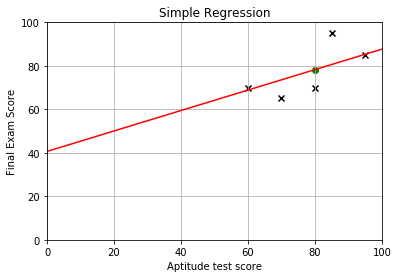

*** Iteration  110000  improvement 0.00021118547260812193  updatedRss:  349.92949445746854 
  B0:  40.64789234749753  B1:  0.4702183513361888 



[349.92949771 349.92949121]
[349.92949445 349.92949453]
[349.92928652 349.92928002]
[349.92928326 349.92928335]
[349.92907534 349.92906884]
[349.92907208 349.92907216]
[349.92886416 349.92885766]
[349.9288609  349.92886098]
[349.92865298 349.92864649]
[349.92864973 349.92864981]
[349.92844181 349.92843531]
[349.92843855 349.92843863]
[349.92823064 349.92822414]
[349.92822738 349.92822746]
[349.92801946 349.92801297]
[349.92801621 349.92801629]
[349.92780829 349.9278018 ]
[349.92780504 349.92780512]
[349.92759713 349.92759063]
[349.92759387 349.92759395]
[349.92738596 349.92737946]
[349.9273827  349.92738278]
[349.9271748 349.9271683]
[349.92717154 349.92717162]
[349.92696364 349.92695714]
[349.92696038 349.92696046]
[349.92675248 349.92674598]
[349.92674922 349.9267493 ]
[349.92654132 349.92653482]
[349.92653806 349.92653814]
[349.92633016 34

[349.82394229 349.82393581]
[349.82393904 349.82393912]
[349.8237321  349.82372562]
[349.82372885 349.82372893]
[349.82352191 349.82351542]
[349.82351866 349.82351874]
[349.82331172 349.82330523]
[349.82330847 349.82330855]
[349.82310153 349.82309505]
[349.82309828 349.82309836]
[349.82289134 349.82288486]
[349.82288809 349.82288817]
[349.82268116 349.82267467]
[349.82267791 349.82267799]
[349.82247098 349.82246449]
[349.82246772 349.82246781]
[349.82226079 349.82225431]
[349.82225754 349.82225763]
[349.82205062 349.82204413]
[349.82204737 349.82204745]
[349.82184044 349.82183396]
[349.82183719 349.82183727]
[349.82163027 349.82162378]
[349.82162701 349.8216271 ]
[349.82142009 349.82141361]
[349.82141684 349.82141692]
[349.82120992 349.82120344]
[349.82120667 349.82120675]
[349.82099975 349.82099327]
[349.8209965  349.82099658]
[349.82078959 349.8207831 ]
[349.82078634 349.82078642]
[349.82057942 349.82057294]
[349.82057617 349.82057625]
[349.82036926 349.82036278]
[349.82036601 349.82

[349.73206552 349.73205905]
[349.73206228 349.73206236]
[349.73185619 349.73184972]
[349.73185294 349.73185303]
[349.73164686 349.73164039]
[349.73164361 349.73164369]
[349.73143753 349.73143106]
[349.73143428 349.73143436]
[349.7312282  349.73122173]
[349.73122496 349.73122504]
[349.73101888 349.73101241]
[349.73101563 349.73101571]
[349.73080955 349.73080308]
[349.73080631 349.73080639]
[349.73060023 349.73059376]
[349.73059699 349.73059707]
[349.73039091 349.73038444]
[349.73038767 349.73038775]
[349.73018159 349.73017512]
[349.73017835 349.73017843]
[349.72997228 349.72996581]
[349.72996903 349.72996912]
[349.72976297 349.7297565 ]
[349.72975972 349.7297598 ]
[349.72955365 349.72954718]
[349.72955041 349.72955049]
[349.72934434 349.72933788]
[349.7293411  349.72934118]
[349.72913504 349.72912857]
[349.72913179 349.72913187]
[349.72892573 349.72891926]
[349.72892249 349.72892257]
[349.72871643 349.72870996]
[349.72871318 349.72871326]
[349.72850713 349.72850066]
[349.72850388 349.72

[349.66747488 349.66746841]
[349.66747164 349.66747172]
[349.66726615 349.66725969]
[349.66726291 349.66726299]
[349.66705742 349.66705096]
[349.66705418 349.66705426]
[349.6668487  349.66684224]
[349.66684546 349.66684554]
[349.66663998 349.66663352]
[349.66663674 349.66663682]
[349.66643126 349.6664248 ]
[349.66642802 349.6664281 ]
[349.66622254 349.66621608]
[349.6662193  349.66621938]
[349.66601382 349.66600736]
[349.66601058 349.66601066]
[349.66580511 349.66579865]
[349.66580187 349.66580195]
[349.6655964  349.66558994]
[349.66559316 349.66559324]
[349.66538769 349.66538123]
[349.66538445 349.66538453]
[349.66517898 349.66517252]
[349.66517574 349.66517582]
[349.66497027 349.66496381]
[349.66496703 349.66496711]
[349.66476157 349.66475511]
[349.66475833 349.66475841]
[349.66455287 349.66454641]
[349.66454963 349.66454971]
[349.66434416 349.6643377 ]
[349.66434093 349.66434101]
[349.66413547 349.66412901]
[349.66413223 349.66413231]
[349.66392677 349.66392031]
[349.66392353 349.66

[349.56439348 349.56438704]
[349.56439025 349.56439033]
[349.56418572 349.56417928]
[349.56418249 349.56418257]
[349.56397796 349.56397152]
[349.56397473 349.56397481]
[349.56377021 349.56376376]
[349.56376697 349.56376705]
[349.56356245 349.563556  ]
[349.56355922 349.5635593 ]
[349.5633547  349.56334825]
[349.56335146 349.56335154]
[349.56314694 349.5631405 ]
[349.56314371 349.56314379]
[349.56293919 349.56293275]
[349.56293596 349.56293604]
[349.56273145 349.562725  ]
[349.56272821 349.5627283 ]
[349.5625237  349.56251725]
[349.56252047 349.56252055]
[349.56231596 349.56230951]
[349.56231272 349.56231281]
[349.56210821 349.56210177]
[349.56210498 349.56210506]
[349.56190047 349.56189403]
[349.56189724 349.56189732]
[349.56169274 349.56168629]
[349.5616895  349.56168958]
[349.561485   349.56147855]
[349.56148177 349.56148185]
[349.56127727 349.56127082]
[349.56127403 349.56127411]
[349.56106953 349.56106309]
[349.5610663  349.56106638]
[349.5608618  349.56085536]
[349.56085857 349.56

[349.46840784 349.46840141]
[349.46840462 349.4684047 ]
[349.46820098 349.46819455]
[349.46819776 349.46819784]
[349.46799412 349.46798769]
[349.4679909  349.46799098]
[349.46778726 349.46778083]
[349.46778404 349.46778412]
[349.46758041 349.46757398]
[349.46757718 349.46757726]
[349.46737355 349.46736712]
[349.46737033 349.46737041]
[349.4671667  349.46716027]
[349.46716348 349.46716356]
[349.46695985 349.46695342]
[349.46695663 349.46695671]
[349.466753   349.46674657]
[349.46674978 349.46674986]
[349.46654616 349.46653972]
[349.46654293 349.46654301]
[349.46633931 349.46633288]
[349.46633609 349.46633617]
[349.46613247 349.46612604]
[349.46612924 349.46612932]
[349.46592563 349.4659192 ]
[349.4659224  349.46592248]
[349.46571879 349.46571236]
[349.46571556 349.46571565]
[349.46551195 349.46550552]
[349.46550873 349.46550881]
[349.46530512 349.46529869]
[349.46530189 349.46530197]
[349.46509829 349.46509185]
[349.46509506 349.46509514]
[349.46489145 349.46488502]
[349.46488823 349.46

[349.37386769 349.37386127]
[349.37386447 349.37386455]
[349.37366171 349.3736553 ]
[349.3736585  349.37365858]
[349.37345574 349.37344932]
[349.37345252 349.3734526 ]
[349.37324977 349.37324335]
[349.37324655 349.37324663]
[349.3730438  349.37303738]
[349.37304058 349.37304066]
[349.37283783 349.37283141]
[349.37283461 349.37283469]
[349.37263186 349.37262545]
[349.37262864 349.37262873]
[349.3724259  349.37241948]
[349.37242268 349.37242276]
[349.37221994 349.37221352]
[349.37221672 349.3722168 ]
[349.37201398 349.37200756]
[349.37201076 349.37201084]
[349.37180802 349.3718016 ]
[349.3718048  349.37180488]
[349.37160206 349.37159564]
[349.37159884 349.37159892]
[349.37139611 349.37138969]
[349.37139289 349.37139297]
[349.37119015 349.37118374]
[349.37118694 349.37118702]
[349.3709842  349.37097779]
[349.37098098 349.37098107]
[349.37077825 349.37077184]
[349.37077504 349.37077512]
[349.37057231 349.37056589]
[349.37056909 349.37056917]
[349.37036636 349.37035994]
[349.37036314 349.37

[349.26661038 349.26660397]
[349.26660717 349.26660725]
[349.26640541 349.266399  ]
[349.2664022  349.26640228]
[349.26620044 349.26619403]
[349.26619723 349.26619731]
[349.26599547 349.26598907]
[349.26599226 349.26599234]
[349.2657905 349.2657841]
[349.26578729 349.26578738]
[349.26558554 349.26557914]
[349.26558233 349.26558241]
[349.26538058 349.26537418]
[349.26537737 349.26537745]
[349.26517562 349.26516922]
[349.26517241 349.26517249]
[349.26497066 349.26496426]
[349.26496745 349.26496754]
[349.26476571 349.26475931]
[349.2647625  349.26476258]
[349.26456076 349.26455435]
[349.26455755 349.26455763]
[349.2643558 349.2643494]
[349.2643526  349.26435268]
[349.26415086 349.26414445]
[349.26414765 349.26414773]
[349.26394591 349.26393951]
[349.2639427  349.26394278]
[349.26374096 349.26373456]
[349.26373775 349.26373783]
[349.26353602 349.26352962]
[349.26353281 349.26353289]
[349.26333108 349.26332468]
[349.26332787 349.26332795]
[349.26312614 349.26311974]
[349.26312293 349.263123

[349.1876343  349.18762791]
[349.1876311  349.18763118]
[349.18743007 349.18742368]
[349.18742687 349.18742695]
[349.18722584 349.18721945]
[349.18722264 349.18722272]
[349.18702162 349.18701523]
[349.18701841 349.18701849]
[349.18681739 349.186811  ]
[349.18681419 349.18681427]
[349.18661317 349.18660678]
[349.18660997 349.18661005]
[349.18640895 349.18640256]
[349.18640574 349.18640582]
[349.18620473 349.18619834]
[349.18620153 349.18620161]
[349.18600051 349.18599412]
[349.18599731 349.18599739]
[349.1857963  349.18578991]
[349.18579309 349.18579317]
[349.18559208 349.18558569]
[349.18558888 349.18558896]
[349.18538787 349.18538148]
[349.18538467 349.18538475]
[349.18518366 349.18517727]
[349.18518046 349.18518054]
[349.18497946 349.18497307]
[349.18497625 349.18497633]
[349.18477525 349.18476886]
[349.18477205 349.18477213]
[349.18457105 349.18456466]
[349.18456784 349.18456792]
[349.18436685 349.18436046]
[349.18436364 349.18436372]
[349.18416265 349.18415626]
[349.18415944 349.18

[349.09287337 349.092867  ]
[349.09287017 349.09287025]
[349.09267003 349.09266365]
[349.09266683 349.09266691]
[349.09246669 349.09246031]
[349.09246349 349.09246357]
[349.09226335 349.09225697]
[349.09226015 349.09226023]
[349.09206001 349.09205364]
[349.09205682 349.0920569 ]
[349.09185668 349.0918503 ]
[349.09185348 349.09185356]
[349.09165335 349.09164697]
[349.09165015 349.09165023]
[349.09145002 349.09144364]
[349.09144682 349.0914469 ]
[349.09124669 349.09124031]
[349.09124349 349.09124357]
[349.09104336 349.09103698]
[349.09104016 349.09104024]
[349.09084004 349.09083366]
[349.09083684 349.09083692]
[349.09063671 349.09063034]
[349.09063352 349.0906336 ]
[349.09043339 349.09042701]
[349.09043019 349.09043027]
[349.09023007 349.0902237 ]
[349.09022687 349.09022695]
[349.09002675 349.09002038]
[349.09002356 349.09002364]
[349.08982344 349.08981706]
[349.08982024 349.08982032]
[349.08962012 349.08961375]
[349.08961693 349.08961701]
[349.08941681 349.08941044]
[349.08941362 349.08

[348.99609516 348.9960888 ]
[348.99609197 348.99609205]
[348.99589273 348.99588637]
[348.99588954 348.99588962]
[348.99569029 348.99568393]
[348.9956871  348.99568718]
[348.99548786 348.9954815 ]
[348.99548467 348.99548475]
[348.99528543 348.99527907]
[348.99528224 348.99528232]
[348.99508301 348.99507664]
[348.99507982 348.9950799 ]
[348.99488058 348.99487422]
[348.99487739 348.99487747]
[348.99467816 348.99467179]
[348.99467497 348.99467505]
[348.99447573 348.99446937]
[348.99447254 348.99447262]
[348.99427331 348.99426695]
[348.99427012 348.9942702 ]
[348.9940709  348.99406453]
[348.99406771 348.99406779]
[348.99386848 348.99386212]
[348.99386529 348.99386537]
[348.99366607 348.9936597 ]
[348.99366288 348.99366296]
[348.99346365 348.99345729]
[348.99346046 348.99346054]
[348.99326124 348.99325488]
[348.99325805 348.99325813]
[348.99305883 348.99305247]
[348.99305564 348.99305572]
[348.99285643 348.99285007]
[348.99285324 348.99285332]
[348.99265402 348.99264766]
[348.99265083 348.99

KeyboardInterrupt: 

In [22]:
#Iteratively find best betas using gradient descent

#caution:  this dataset has very few points, so local gradient estimation has very little
#           gradient to go on in some dimensions.  this will make it slow and
#           highly dependent on your starting beta.  Dont use this on real problems!
#-----------------------------------------------------------


#setup the search
epsilon = 0.000001  #amount of change to beta; used to find emperical gradients of the cost surface near current beta values
convergenceThreshold = 0.00001  #If beta changes less than this amount, finish the search
improvement = 99999999.0  #start with an unreasonbly high improvement

learning_rate = 10.0
iteration_count = 0
done = False


t = np.array([[1, 80]])


print("Starting beta search")

while not done:
    #capture current rss value
    iteration_count = iteration_count+1
    #print(iterations)
    yhatold = np.dot(X,beta)
    oldRss = np.dot((yhatold-y).T , (yhatold-y))
    
    #call the student-written code to find the gradient of the cost surface
    #at the current coefficient values (beta)
    [rss0Gradient,rss1Gradient] = compute_gradient(X,y,beta,epsilon)
    
    #compute the updates to the betas using the learning rate
    b0Update = (rss0Gradient*learning_rate)
    b1Update = (rss1Gradient*learning_rate)

    
    #compute the new betas
    b0new = np.asscalar(beta[0,0]+b0Update)
    b1new = np.asscalar(beta[1,0]+b1Update)

    #set the new betas
    beta.itemset((0,0),b0new)  
    beta.itemset((1,0),b1new)             
    
    #test for convergence    
    #if total change in beta is small then done
    done = np.sqrt(b0Update**2+b1Update**2)<convergenceThreshold
    
    
    #test for amount of improvement in RSS
    yhat = np.dot(X,beta)
    updatedRss = np.dot((yhat-y).T , (yhat-y))
    
    
    #the following code will print an update after a certain number of iterations
    displayEveryIterations=10000  #how many iterations to run before displaying an update
    if not np.mod(iteration_count,displayEveryIterations):   
        ythat = np.dot(t,beta)
        beta0 = beta[0,0]
        beta1 = beta[1,0]
        plot_regression_results(X, y, t, ythat, beta0,beta1)
        improvement = oldRss-updatedRss
        print('*** Iteration ',iteration_count,
              ' improvement',np.asscalar(improvement),  
              ' updatedRss: ',np.asscalar(updatedRss),
              '\n',
              ' B0: ', np.asscalar(beta0), ' B1: ', np.asscalar(beta1),
              '\n\n\n' )

print("Done")

print("Final Results")
plot_regression_results(X, y, t, ythat, beta0, beta1)


